In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('./train_data.csv', na_values=' ')
sample = pd.read_csv('./2024_8_3.csv', na_values=' ', encoding='ANSI')
sample.columns = data.columns
data.shape

(102165, 47)

In [8]:
# 결장선수가 있는 경기를 제외

data = data.dropna(subset=['AGE_CO', 'GEAR_MULTIP_CO', 'GRAD_MDAT_CURNT_NM'])

race_counts = data.groupby(['BASE_YEAR', 'TME_VALUE', 'DAY_ORD_VALUE', 'RACE_NO']).size()
races_to_drop = race_counts[race_counts < 7].index.tolist()

data_cleaned = data.set_index(['BASE_YEAR', 'TME_VALUE', 'DAY_ORD_VALUE', 'RACE_NO'])
data_cleaned = data_cleaned[~data_cleaned.index.isin(races_to_drop)].reset_index()

data_cleaned.shape

(102130, 47)

In [9]:
data = data_cleaned.copy()

In [10]:
cols=['WNPZ_NCNT',
      'WNPZ_TCTCS_PRECDNG_NCNT', 'WNPZ_TCTCS_EXCD_NCNT', 'WNPZ_TCTCS_OVRTK_NCNT', 'WNPZ_TCTCS_DEFNS_NCNT'
     ]

for col in cols:
    # For 'data' DataFrame
    non_zero_indices = data['RACE_PARTCPT_NCNT'] != 0
    data.loc[non_zero_indices, col] /= data.loc[non_zero_indices, 'RACE_PARTCPT_NCNT']

    # For 'sample' DataFrame
    non_zero_indices_sample = sample['RACE_PARTCPT_NCNT'] != 0
    sample.loc[non_zero_indices_sample, col] /= sample.loc[non_zero_indices_sample, 'RACE_PARTCPT_NCNT']

In [11]:
data.drop('RACE_PARTCPT_NCNT', axis=1, inplace=True)
sample.drop('RACE_PARTCPT_NCNT', axis=1, inplace=True)

In [12]:
# 200m 기록 결측치 채우기(등급별 평균으로), 신입 선수의 경우 비어있음.
# 평균과 중위값이 거의 같음

b = data.loc[data['GRAD_MDAT_CURNT_NM'].str.startswith('B'), 'RCORD_N200M_VALUE'].mean()
a = data.loc[data['GRAD_MDAT_CURNT_NM'].str.startswith('A'), 'RCORD_N200M_VALUE'].mean()
s = data.loc[data['GRAD_MDAT_CURNT_NM'].str.startswith('S'), 'RCORD_N200M_VALUE'].mean()


In [13]:
data.loc[data['GRAD_MDAT_CURNT_NM'].str.startswith('B'), 'RCORD_N200M_VALUE'] = data.loc[data['GRAD_MDAT_CURNT_NM'].str.startswith('B'), 'RCORD_N200M_VALUE'].fillna(b)
data.loc[data['GRAD_MDAT_CURNT_NM'].str.startswith('A'), 'RCORD_N200M_VALUE'] = data.loc[data['GRAD_MDAT_CURNT_NM'].str.startswith('A'), 'RCORD_N200M_VALUE'].fillna(a)
data.loc[data['GRAD_MDAT_CURNT_NM'].str.startswith('S'), 'RCORD_N200M_VALUE'] = data.loc[data['GRAD_MDAT_CURNT_NM'].str.startswith('S'), 'RCORD_N200M_VALUE'].fillna(s)

sample.loc[sample['GRAD_MDAT_CURNT_NM'].str.startswith('B'), 'RCORD_N200M_VALUE'] = sample.loc[sample['GRAD_MDAT_CURNT_NM'].str.startswith('B'), 'RCORD_N200M_VALUE'].fillna(b)
sample.loc[sample['GRAD_MDAT_CURNT_NM'].str.startswith('A'), 'RCORD_N200M_VALUE'] = sample.loc[sample['GRAD_MDAT_CURNT_NM'].str.startswith('A'), 'RCORD_N200M_VALUE'].fillna(a)
sample.loc[sample['GRAD_MDAT_CURNT_NM'].str.startswith('S'), 'RCORD_N200M_VALUE'] = sample.loc[sample['GRAD_MDAT_CURNT_NM'].str.startswith('S'), 'RCORD_N200M_VALUE'].fillna(s)

In [14]:
cols_list1 = [
    'LATST_ONE_RTATE_SCRE_ONE_DAY_ORD_VALUE',
    'LATST_ONE_RTATE_SCRE_TWO_DAY_ORD_VALUE',
    'LATST_ONE_RTATE_SCRE_THREE_DAY_ORD_VALUE',
    'LATST_TWO_RTATE_SCRE_ONE_DAY_ORD_VALUE',
    'LATST_TWO_RTATE_SCRE_TWO_DAY_ORD_VALUE',
    'LATST_TWO_RTATE_SCRE_THREE_DAY_ORD_VALUE',
    'LATST_THREE_RTATE_SCRE_ONE_DAY_ORD_VALUE',
    'LATST_THREE_RTATE_SCRE_TWO_DAY_ORD_VALUE'
]


missing_percentage, missing_sum = data[cols_list1].isnull().mean() * 100, data[cols_list1].isnull().sum()


missing_percentage, missing_sum

(LATST_ONE_RTATE_SCRE_ONE_DAY_ORD_VALUE      2.672085
 LATST_ONE_RTATE_SCRE_TWO_DAY_ORD_VALUE      3.269363
 LATST_ONE_RTATE_SCRE_THREE_DAY_ORD_VALUE    6.159796
 LATST_TWO_RTATE_SCRE_ONE_DAY_ORD_VALUE      2.904142
 LATST_TWO_RTATE_SCRE_TWO_DAY_ORD_VALUE      3.608146
 LATST_TWO_RTATE_SCRE_THREE_DAY_ORD_VALUE    6.582787
 LATST_THREE_RTATE_SCRE_ONE_DAY_ORD_VALUE    2.898267
 LATST_THREE_RTATE_SCRE_TWO_DAY_ORD_VALUE    3.676687
 dtype: float64,
 LATST_ONE_RTATE_SCRE_ONE_DAY_ORD_VALUE      2729
 LATST_ONE_RTATE_SCRE_TWO_DAY_ORD_VALUE      3339
 LATST_ONE_RTATE_SCRE_THREE_DAY_ORD_VALUE    6291
 LATST_TWO_RTATE_SCRE_ONE_DAY_ORD_VALUE      2966
 LATST_TWO_RTATE_SCRE_TWO_DAY_ORD_VALUE      3685
 LATST_TWO_RTATE_SCRE_THREE_DAY_ORD_VALUE    6723
 LATST_THREE_RTATE_SCRE_ONE_DAY_ORD_VALUE    2960
 LATST_THREE_RTATE_SCRE_TWO_DAY_ORD_VALUE    3755
 dtype: int64)

In [15]:
# 최근 3회전 등수 처리
new_data = data.copy()

cols_list1 = [
    'LATST_ONE_RTATE_SCRE_ONE_DAY_ORD_VALUE',
    'LATST_ONE_RTATE_SCRE_TWO_DAY_ORD_VALUE',
    'LATST_ONE_RTATE_SCRE_THREE_DAY_ORD_VALUE',
    'LATST_TWO_RTATE_SCRE_ONE_DAY_ORD_VALUE',
    'LATST_TWO_RTATE_SCRE_TWO_DAY_ORD_VALUE',
    'LATST_TWO_RTATE_SCRE_THREE_DAY_ORD_VALUE',
    'LATST_THREE_RTATE_SCRE_ONE_DAY_ORD_VALUE',
    'LATST_THREE_RTATE_SCRE_TWO_DAY_ORD_VALUE'
]
# 위 컬럼은 최근 3회전 경기의 순위를 나타냄

# 결측치 처리
for col in cols_list1:
    new_data[col] = new_data[col].fillna(-1)
    sample[col] = sample[col].fillna(-1)
    
# 입상하지 못한 경기를 동일하게 처리 
for col in cols_list1:
    new_data.loc[new_data[col] >= 4, col] = 7

In [16]:
# 일차 경기에 맞게 데이터 수정
# 1일차 경기에 1,2,3일차 데이터가 반영되어있는 경우, 이를 제거
day_values = {
    1: ['ONE_DAY_ORD_TCTCS_CD', 'TWO_DAY_ORD_TCTCS_CD', 'THREE_DAY_ORD_TCTCS_CD'],
    2: ['TWO_DAY_ORD_TCTCS_CD', 'THREE_DAY_ORD_TCTCS_CD'],
    3: ['THREE_DAY_ORD_TCTCS_CD']
}

for value, cols in day_values.items():
    new_data.loc[new_data['DAY_ORD_VALUE'] == value, cols] = -1
    sample.loc[sample['DAY_ORD_VALUE'] == value, cols] = -1

# NA값을 -1로 채우기
cols_list2 = [
    'ONE_DAY_ORD_TCTCS_CD', 
    'TWO_DAY_ORD_TCTCS_CD', 
    'THREE_DAY_ORD_TCTCS_CD',
    'BEF1_TME_ONE_DAY_ORD_TCTCS_CD',
    'BEF1_TME_TWO_DAY_ORD_TCTCS_CD',
    'BEF1_TME_THREE_DAY_ORD_TCTCS_CD',
    'BEF2_TME_ONE_DAY_ORD_TCTCS_CD',
    'BEF2_TME_TWO_DAY_ORD_TCTCS_CD',
    'BEF2_TME_THREE_DAY_ORD_TCTCS_CD',
    'BEF3_TME_ONE_DAY_ORD_TCTCS_CD',
    'BEF3_TME_TWO_DAY_ORD_TCTCS_CD',
    'BEF3_TME_THREE_DAY_ORD_TCTCS_CD'
]

for col in cols_list2:
    new_data[col] = new_data[col].fillna(-1)
    sample[col] = sample[col].fillna(-1)

new_data['GRAD_MDAT_BEFORE_NM'] = new_data['GRAD_MDAT_BEFORE_NM'].fillna('-1')
sample['GRAD_MDAT_BEFORE_NM'] = sample['GRAD_MDAT_BEFORE_NM'].fillna('-1')

new_data['GRAD_MDAT_CURNT_NM'] = new_data['GRAD_MDAT_CURNT_NM'].fillna('-1')
sample['GRAD_MDAT_CURNT_NM'] = sample['GRAD_MDAT_CURNT_NM'].fillna('-1')

# new_data['GRAD_MDAT_BEFORE_NM'] = new_data['GRAD_MDAT_BEFORE_NM'].fillna(new_data['GRAD_MDAT_CURNT_NM'])

In [17]:
cols_to_drop = [
#     'BASE_YEAR',
#     'TME_VALUE',
#     'DAY_ORD_VALUE',
#     'RACE_NO', 
#     'BACK_NO', 
#    'TRAING_PLACE_NM', 
#    'PLAYER_GRAD_NM',
    'LATST_TWO_RTATE_SCRE_RACE_MT',
    'LATST_THREE_RTATE_SCRE_RACE_MT',
    'GEAR_MULTIP_CO',
#    'PLAYER_NM'
]

new_data.drop(cols_to_drop, axis=1, inplace=True)
sample.drop(cols_to_drop, axis=1, inplace=True)

In [18]:
def replace_missing_values_advanced(train_data, test_data, column_name, replacement='mean', inplace_value=True):
    """
    훈련 데이터와 테스트 데이터에서 지정된 열의 결측치를 다양한 방법으로 대체합니다.

    Parameters:
    - train_data: 훈련 데이터셋 (Pandas DataFrame)
    - test_data: 테스트 데이터셋 (Pandas DataFrame)
    - columns: 결측치를 처리할 열들의 리스트 (list of str)
    - replacement: 결측치를 대체할 값 ('mean', 'median', 'zero', 'others', or any specific value)
    
    Returns:
    - train_data: 처리된 훈련 데이터셋 (Pandas DataFrame)
    - test_data: 처리된 테스트 데이터셋 (Pandas DataFrame)
    """
    
    train_ratio = train_data[column_name].isnull().mean() * 100
    test_ratio = test_data[column_name].isnull().mean() * 100
    print('학습 데이터의 결측치 비율: {:.2f}%'.format(train_ratio))
    print('테스트 데이터의 결측치 비율: {:.2f}%'.format(test_ratio))

    if (train_data[column_name].isnull().mean()==0) & (test_data[column_name].isnull().mean()==0):
        print('결측치가 존재하지 않습니다.')
        return train_data, test_data
        
    if replacement == 'mean':
        replacement_value = train_data[column_name].mean()
        print(replacement, '값으로 대체합니다.')
    elif replacement == 'median':
        replacement_value = train_data[column_name].median()
        print(replacement, '값으로 대체합니다.')
    elif (replacement == 'zero') | (replacement == 0):
        replacement_value = 0
        print('0으로 대체합니다.')
    else:
        replacement_value = replacement
        print(replacement, '로 대체합니다.')
        
    train_data[column_name].fillna(replacement_value, inplace=inplace_value)
    test_data[column_name].fillna(replacement_value, inplace=inplace_value)
    
    return train_data, test_data


def process_infrequent_categories(reference_data, target_data, column_name, threshold=10, unknown_label='-1'):
    """
    빈도가 임계값 이하인 카테고리를 'unknown_label'로 처리하는 함수
    reference_data에서 빈도를 계산하고, target_data에 적용
    """
    # reference_data에서 빈도 계산
    counts = reference_data[column_name].value_counts()
    
    # 빈도가 임계값 이하인 카테고리 찾기
    infrequent = counts[counts < threshold].index
    
    # 타겟 데이터에서 빈도가 낮은 카테고리를 "unknown"으로 처리
    target_data[f'{column_name}_processed'] = target_data[column_name].apply(lambda x: unknown_label if x in infrequent else x)

    # 기존 column 제거
    # target_data = target_data.drop([column_name], axis=1)
    
    return target_data


def process_and_align_categories(train_data, test_data, column_name, threshold=10, unknown_label='others'):
    """
    빈도가 낮은 카테고리를 처리하고, 훈련 데이터와 테스트 데이터 간의 카테고리 일관성을 보장하는 함수.
    
    Parameters:
    - train_data: 훈련 데이터셋 (Pandas DataFrame)
    - test_data: 테스트 데이터셋 (Pandas DataFrame)
    - column_name: 처리할 열의 이름 (str)
    - threshold: 빈도 임계값, 이 값 이하인 경우 'unknown_label'로 처리 (int)
    - unknown_label: 빈도가 낮은 카테고리를 대체할 레이블 (str, int)
    
    Returns:
    - train_data, test_data: 처리된 훈련 데이터와 테스트 데이터 (Pandas DataFrame)
    """
    # 빈도가 낮은 카테고리를 'others'로 처리
    train_data = process_infrequent_categories(train_data, train_data, column_name, threshold, unknown_label)
    test_data = process_infrequent_categories(train_data, test_data, column_name, threshold, unknown_label)
    
    # 훈련 데이터와 테스트 데이터 간의 일관성 보장
    train_unique_values = train_data[f'{column_name}_processed'].unique().tolist()
    test_unique_values = test_data[f'{column_name}_processed'].unique().tolist()

    values_not_in_train = [value for value in test_unique_values if value not in train_unique_values]

    if values_not_in_train:
        print("학습 데이터에 존재하지 않는 값이 존재합니다.", unknown_label, '로 변경합니다.') 
        print("존재하지 않는 값: ", values_not_in_train)
        test_data[f'{column_name}_processed'] = test_data[f'{column_name}_processed'].apply(lambda x: unknown_label if x not in train_unique_values else x)
    else:
        print("모든 값이 학습 데이터에 존재합니다.")

    return train_data, test_data

In [19]:
def filter_data_by_race_and_grade(new_data, day_order_values, player_grad_nm):
    """
    Filters the data based on specific race day orders and player grade name.

    Parameters:
    - new_data: DataFrame containing the race data.
    - day_order_values: List of day order values to filter by.
    - player_grad_nm: String representing the player grade name to filter by.

    Returns:
    - copy_data: Filtered DataFrame based on the specified criteria.
    """
    # Create RACE_ID
    new_data['RACE_ID'] = new_data['BASE_YEAR'].astype(str) + '_' + new_data['TME_VALUE'].astype(str) + '_' + new_data['DAY_ORD_VALUE'].astype(str) + '_' + new_data['RACE_NO'].astype(str)

    # Group by RACE_ID
    grouped = new_data.groupby('RACE_ID')

    # Check if each group contains the specified player grade name
    has_specified_grade = grouped['PLAYER_GRAD_NM'].apply(lambda x: (x == player_grad_nm).any())

    # Get RACE_IDs of races containing the specified player grade name
    races_with_specified_grade = has_specified_grade[has_specified_grade].index

    # Filter data for races with the specified player grade name and specified day order values
    condition = new_data['DAY_ORD_VALUE'].isin(day_order_values)
    copy_data = new_data[new_data['RACE_ID'].isin(races_with_specified_grade) & condition].copy()
    copy_data.reset_index(drop=True, inplace=True)

    # Drop RACE_ID column
    copy_data.drop('RACE_ID', axis=1, inplace=True)
    new_data.drop('RACE_ID', axis=1, inplace=True)

    return copy_data

# Example usage
day_order_values = [1, 2, 3]  # Day order values you're interested in
player_grad_nm = '특선'  # Player grade name of interest
copy_data = filter_data_by_race_and_grade(new_data, day_order_values, player_grad_nm)
sample_filtered = filter_data_by_race_and_grade(sample, day_order_values, player_grad_nm)
print(new_data.shape, copy_data.shape, sample_filtered.shape)

(102130, 43) (28448, 43) (28, 43)


In [20]:
from sklearn.model_selection import GroupShuffleSplit

# Create a unique identifier for each race
copy_data['race_id'] = copy_data['BASE_YEAR'].astype(str) + '_' + copy_data['TME_VALUE'].astype(str) + '_' + copy_data['DAY_ORD_VALUE'].astype(str) + '_' + copy_data['RACE_NO'].astype(str)

# Use GroupShuffleSplit to create train and test sets, keeping races intact
gss = GroupShuffleSplit(n_splits=1, test_size=0.05, random_state=42)
train_idx, test_idx = next(gss.split(copy_data, groups=copy_data['race_id']))

train_data = copy_data.iloc[train_idx].drop('race_id', axis=1)
test_data = copy_data.iloc[test_idx].drop('race_id', axis=1)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

print(train_data.shape)
print(test_data.shape)

(27020, 43)
(1428, 43)


In [21]:
train_data, test_data = process_and_align_categories(train_data, test_data,
                                                     'TRAING_PLACE_NM', threshold=10, unknown_label='others')
train_data, sample_filtered = process_and_align_categories(train_data, sample_filtered,
                                                           'TRAING_PLACE_NM', threshold=10, unknown_label='others')

모든 값이 학습 데이터에 존재합니다.
학습 데이터에 존재하지 않는 값이 존재합니다. others 로 변경합니다.
존재하지 않는 값:  ['서울한남']


In [22]:
train_data, test_data = replace_missing_values_advanced(train_data, test_data,
                                                        'TRAING_PLACE_NM_processed', replacement='others')
train_data, sample_filtered = replace_missing_values_advanced(train_data, sample_filtered,
                                                              'TRAING_PLACE_NM_processed', replacement='others')

학습 데이터의 결측치 비율: 0.00%
테스트 데이터의 결측치 비율: 0.00%
결측치가 존재하지 않습니다.
학습 데이터의 결측치 비율: 0.00%
테스트 데이터의 결측치 비율: 0.00%
결측치가 존재하지 않습니다.


In [23]:
train_data = train_data.drop(['TRAING_PLACE_NM'], axis=1)
test_data = test_data.drop(['TRAING_PLACE_NM'], axis=1)
sample_filtered = sample_filtered.drop(['TRAING_PLACE_NM'], axis=1)

In [24]:
train_data, test_data = process_and_align_categories(train_data, test_data,
                                                     'PLAYER_NM', threshold=10, unknown_label='others')
train_data, sample_filtered = process_and_align_categories(train_data, sample_filtered,
                                                           'PLAYER_NM', threshold=10, unknown_label='others')

모든 값이 학습 데이터에 존재합니다.
학습 데이터에 존재하지 않는 값이 존재합니다. others 로 변경합니다.
존재하지 않는 값:  ['김홍일']


In [25]:
train_data, test_data = replace_missing_values_advanced(train_data, test_data,
                                                        'PLAYER_NM_processed', replacement='others')
train_data, sample_filtered = replace_missing_values_advanced(train_data, sample_filtered,
                                                              'PLAYER_NM_processed', replacement='others')

학습 데이터의 결측치 비율: 0.00%
테스트 데이터의 결측치 비율: 0.00%
결측치가 존재하지 않습니다.
학습 데이터의 결측치 비율: 0.00%
테스트 데이터의 결측치 비율: 0.00%
결측치가 존재하지 않습니다.


In [26]:
train_data = train_data.drop(['PLAYER_NM'], axis=1)
test_data = test_data.drop(['PLAYER_NM'], axis=1)
sample_filtered = sample_filtered.drop(['PLAYER_NM'], axis=1)

In [27]:
# 선수 등급 원-핫 인코딩
encoder = OneHotEncoder(sparse_output=False)
encoded_cols_train = encoder.fit_transform(train_data[['GRAD_MDAT_BEFORE_NM', 'GRAD_MDAT_CURNT_NM']])
encoded_cols_test = encoder.transform(test_data[['GRAD_MDAT_BEFORE_NM', 'GRAD_MDAT_CURNT_NM']])
encoded_cols_sample = encoder.transform(sample_filtered[['GRAD_MDAT_BEFORE_NM', 'GRAD_MDAT_CURNT_NM']])

encoded_df_train = pd.DataFrame(encoded_cols_train,
                                columns=encoder.get_feature_names_out(['GRAD_MDAT_BEFORE_NM', 'GRAD_MDAT_CURNT_NM']))
encoded_df_test = pd.DataFrame(encoded_cols_test,
                               columns=encoder.get_feature_names_out(['GRAD_MDAT_BEFORE_NM', 'GRAD_MDAT_CURNT_NM']))
encoded_df_sample = pd.DataFrame(encoded_cols_sample,
                                 columns=encoder.get_feature_names_out(['GRAD_MDAT_BEFORE_NM', 'GRAD_MDAT_CURNT_NM']))

train_data.drop(['GRAD_MDAT_BEFORE_NM', 'GRAD_MDAT_CURNT_NM'], axis=1, inplace=True)
test_data.drop(['GRAD_MDAT_BEFORE_NM', 'GRAD_MDAT_CURNT_NM'], axis=1, inplace=True)
sample_filtered.drop(['GRAD_MDAT_BEFORE_NM', 'GRAD_MDAT_CURNT_NM'], axis=1, inplace=True)

train_data = pd.concat([train_data, encoded_df_train], axis=1)
test_data = pd.concat([test_data, encoded_df_test], axis=1)
sample_filtered = pd.concat([sample_filtered, encoded_df_sample], axis=1)

In [28]:
train_data['three'] = 0
test_data['three'] = 0

train_data.loc[train_data['Rank']==1,'three'] = 1
test_data.loc[test_data['Rank']==1,'three'] = 1

train_data.loc[train_data['Rank']==2,'three'] = 1
test_data.loc[test_data['Rank']==2,'three'] = 1

train_data.loc[train_data['Rank']==3,'three'] = 1
test_data.loc[test_data['Rank']==3,'three'] = 1

In [29]:
from category_encoders import TargetEncoder

cols_to_target = [
    'TRAING_PLACE_NM_processed', 'PLAYER_NM_processed',
    'ONE_DAY_ORD_TCTCS_CD', 'TWO_DAY_ORD_TCTCS_CD', 'THREE_DAY_ORD_TCTCS_CD',
    'BEF1_TME_ONE_DAY_ORD_TCTCS_CD', 'BEF1_TME_TWO_DAY_ORD_TCTCS_CD', 'BEF1_TME_THREE_DAY_ORD_TCTCS_CD',
    'BEF2_TME_ONE_DAY_ORD_TCTCS_CD', 'BEF2_TME_TWO_DAY_ORD_TCTCS_CD', 'BEF2_TME_THREE_DAY_ORD_TCTCS_CD',
    'BEF3_TME_ONE_DAY_ORD_TCTCS_CD', 'BEF3_TME_TWO_DAY_ORD_TCTCS_CD', 'BEF3_TME_THREE_DAY_ORD_TCTCS_CD',
    'LATST_ONE_RTATE_SCRE_ONE_DAY_ORD_VALUE', 'LATST_ONE_RTATE_SCRE_TWO_DAY_ORD_VALUE', 'LATST_ONE_RTATE_SCRE_THREE_DAY_ORD_VALUE',
    'LATST_TWO_RTATE_SCRE_ONE_DAY_ORD_VALUE', 'LATST_TWO_RTATE_SCRE_TWO_DAY_ORD_VALUE', 'LATST_TWO_RTATE_SCRE_THREE_DAY_ORD_VALUE',
    'LATST_THREE_RTATE_SCRE_ONE_DAY_ORD_VALUE', 'LATST_THREE_RTATE_SCRE_TWO_DAY_ORD_VALUE'
]
train_data[cols_to_target] = train_data[cols_to_target].astype(str)
test_data[cols_to_target] = test_data[cols_to_target].astype(str)
sample_filtered[cols_to_target] = sample_filtered[cols_to_target].astype(str)

target_encoder = TargetEncoder(smoothing=1)
train_data[cols_to_target] = target_encoder.fit_transform(train_data[cols_to_target], train_data['three'])
test_data[cols_to_target] = target_encoder.transform(test_data[cols_to_target])
sample_filtered[cols_to_target] = target_encoder.transform(sample_filtered[cols_to_target])

display(train_data[cols_to_target].head(), test_data[cols_to_target].head(), sample_filtered[cols_to_target].head())

ModuleNotFoundError: No module named 'category_encoders'

<Figure size 1200x600 with 0 Axes>

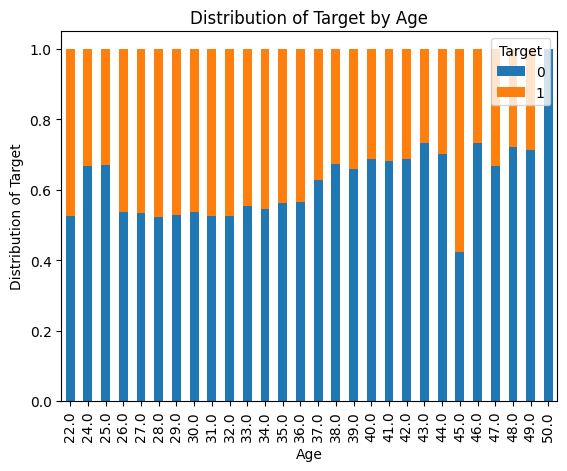

In [24]:
# Assuming 'AGE_CO' is your age column and 'Target' is the target variable
age_groups = train_data.groupby('AGE_CO')['three'].value_counts(normalize=True).unstack()

# Plotting
plt.figure(figsize=(12, 6))
age_groups.plot(kind='bar', stacked=True)
plt.title('Distribution of Target by Age')
plt.xlabel('Age')
plt.ylabel('Distribution of Target')
plt.legend(title='Target')
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

cols_to_divide = ['VICTRY_RT', 'YUNDAE_RT', 'THREE_YUNDAE_RT']
train_data[cols_to_divide] /= 50
test_data[cols_to_divide] /= 50
sample_filtered[cols_to_divide] /= 50

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler(feature_range=(0, 2))

# 스케일링을 원하는 열을 지정합니다.
cols_to_scale = [
    'AGE_CO', 
    'RCORD_N200M_VALUE',
#    'WNPZ_NCNT',
#    'RACE_PARTCPT_NCNT',
#    'WNPZ_TCTCS_PRECDNG_NCNT',
#    'WNPZ_TCTCS_EXCD_NCNT',
#    'WNPZ_TCTCS_OVRTK_NCNT',
#    'WNPZ_TCTCS_DEFNS_NCNT',
    'AVRG_GTSR_TMS3_VALUE',
    'AVRG_GTSR_GNRLZ_VALUE'    
]

train_data[cols_to_scale] = scaler_minmax.fit_transform(train_data[cols_to_scale])
test_data[cols_to_scale] = scaler_minmax.transform(test_data[cols_to_scale])
sample_filtered[cols_to_scale] = scaler_minmax.transform(sample_filtered[cols_to_scale])

# 음수인 값은 0으로
test_data[cols_to_scale] = test_data[cols_to_scale].clip(lower=0)
sample_filtered[cols_to_scale] = sample_filtered[cols_to_scale].clip(lower=0)

cols_nonlinear = [
    'AGE_CO', 
    'RCORD_N200M_VALUE',
#    'WNPZ_NCNT',
#    'RACE_PARTCPT_NCNT',
#    'WNPZ_TCTCS_PRECDNG_NCNT',
#    'WNPZ_TCTCS_EXCD_NCNT',
#    'WNPZ_TCTCS_OVRTK_NCNT',
#    'WNPZ_TCTCS_DEFNS_NCNT',
    'AVRG_GTSR_TMS3_VALUE',
    'AVRG_GTSR_GNRLZ_VALUE',
    'VICTRY_RT', 'YUNDAE_RT', 'THREE_YUNDAE_RT'
]


for col in cols_nonlinear:
    train_data[f'{col}_sqrt'] = np.sqrt(train_data[col])
    train_data[f'{col}_squared'] = train_data[col] ** 2
    
    test_data[f'{col}_sqrt'] = np.sqrt(test_data[col])
    test_data[f'{col}_squared'] = test_data[col] ** 2
    
    sample_filtered[f'{col}_sqrt'] = np.sqrt(sample_filtered[col])
    sample_filtered[f'{col}_squared'] = sample_filtered[col] ** 2

# 플레이어와 나이를 곱한 파생 변수 생성
train_data['new_col1'] = train_data['PLAYER_NM_processed'] * train_data['AGE_CO']
test_data['new_col1'] = test_data['PLAYER_NM_processed'] * test_data['AGE_CO']
sample_filtered['new_col1'] = sample_filtered['PLAYER_NM_processed'] * sample_filtered['AGE_CO']


cols_sqrt = [f'{col}_sqrt' for col in cols_nonlinear]
cols_squared = [f'{col}_squared' for col in cols_nonlinear]
columns_to_display = cols_to_scale + cols_sqrt + cols_squared + ['new_col1']

display(train_data[columns_to_display].head(),
        test_data[columns_to_display].head(),
        sample_filtered[columns_to_display].head())

,AGE_CO,RCORD_N200M_VALUE,AVRG_GTSR_TMS3_VALUE,AVRG_GTSR_GNRLZ_VALUE,AGE_CO_sqrt,RCORD_N200M_VALUE_sqrt,AVRG_GTSR_TMS3_VALUE_sqrt,AVRG_GTSR_GNRLZ_VALUE_sqrt,VICTRY_RT_sqrt,YUNDAE_RT_sqrt,THREE_YUNDAE_RT_sqrt,AGE_CO_squared,RCORD_N200M_VALUE_squared,AVRG_GTSR_TMS3_VALUE_squared,AVRG_GTSR_GNRLZ_VALUE_squared,VICTRY_RT_squared,YUNDAE_RT_squared,THREE_YUNDAE_RT_squared,new_col1
0,0.571429,0.758364,1.412796,1.211696,0.755929,0.870841,1.188611,1.100771,0.489898,0.787401,1.029563,0.326531,0.575116,1.995991,1.468208,0.0576,0.3844,1.1236,0.334495
1,0.500000,0.884758,0.927484,0.671340,0.707107,0.940616,0.963060,0.819353,0.734847,0.836660,0.969536,0.250000,0.782797,0.860227,0.450697,0.2916,0.4900,0.8836,0.119967
2,1.285714,0.446097,1.278324,0.840777,1.133893,0.667905,1.130630,0.916939,0.748331,0.979796,1.104536,1.653061,0.199002,1.634112,0.706906,0.3136,0.9216,1.4884,0.364286
3,0.285714,0.736059,0.987025,0.939582,0.534522,0.857939,0.993491,0.969320,0.836660,1.000000,1.249000,0.081633,0.541784,0.974218,0.882814,0.4900,1.0000,2.4336,0.072214
4,1.000000,1.092937,0.859855,0.521130,1.000000,1.045436,0.927284,0.721893,0.469042,0.787401,1.058301,1.000000,1.194511,0.739351,0.271576,0.0484,0.3844,1.2544,0.469636


,AGE_CO,RCORD_N200M_VALUE,AVRG_GTSR_TMS3_VALUE,AVRG_GTSR_GNRLZ_VALUE,AGE_CO_sqrt,RCORD_N200M_VALUE_sqrt,AVRG_GTSR_TMS3_VALUE_sqrt,AVRG_GTSR_GNRLZ_VALUE_sqrt,VICTRY_RT_sqrt,YUNDAE_RT_sqrt,THREE_YUNDAE_RT_sqrt,AGE_CO_squared,RCORD_N200M_VALUE_squared,AVRG_GTSR_TMS3_VALUE_squared,AVRG_GTSR_GNRLZ_VALUE_squared,VICTRY_RT_squared,YUNDAE_RT_squared,THREE_YUNDAE_RT_squared,new_col1
0,1.142857,0.966543,1.268326,1.112090,1.069045,0.983129,1.126200,1.054557,0.663325,0.905539,1.131371,1.306122,0.934205,1.608650,1.236745,0.1936,0.6724,1.6384,0.403361
1,0.357143,0.728625,1.931809,1.938047,0.597614,0.853595,1.389895,1.392137,1.272792,1.334166,1.385641,0.127551,0.530894,3.731887,3.756025,2.6244,3.1684,3.6864,0.291600
2,0.357143,0.624535,0.627647,0.709527,0.597614,0.790275,0.792242,0.842334,0.871780,0.959166,1.157584,0.127551,0.390044,0.393941,0.503428,0.5776,0.8464,1.7956,0.088365
3,0.428571,0.810409,0.803348,0.621136,0.654654,0.900227,0.896297,0.788122,0.424264,0.648074,0.871780,0.183673,0.656763,0.645368,0.385810,0.0324,0.1764,0.5776,0.072910
4,0.571429,0.840149,1.373476,1.325189,0.755929,0.916596,1.171954,1.151168,0.632456,1.048809,1.191638,0.326531,0.705850,1.886437,1.756125,0.1600,1.2100,2.0164,0.335766


,AGE_CO,RCORD_N200M_VALUE,AVRG_GTSR_TMS3_VALUE,AVRG_GTSR_GNRLZ_VALUE,AGE_CO_sqrt,RCORD_N200M_VALUE_sqrt,AVRG_GTSR_TMS3_VALUE_sqrt,AVRG_GTSR_GNRLZ_VALUE_sqrt,VICTRY_RT_sqrt,YUNDAE_RT_sqrt,THREE_YUNDAE_RT_sqrt,AGE_CO_squared,RCORD_N200M_VALUE_squared,AVRG_GTSR_TMS3_VALUE_squared,AVRG_GTSR_GNRLZ_VALUE_squared,VICTRY_RT_squared,YUNDAE_RT_squared,THREE_YUNDAE_RT_squared,new_col1
0,1.571429,0.892193,0.889962,0.662394,1.253566,0.944560,0.943378,0.813876,0.000000,0.000000,0.000000,2.469388,0.796009,0.792033,0.438766,0.0000,0.0000,0.0000,0.782584
1,0.571429,0.951673,0.856260,0.622338,0.755929,0.975537,0.925343,0.788884,0.000000,0.000000,0.583095,0.326531,0.905681,0.733181,0.387305,0.0000,0.0000,0.1156,0.058824
2,1.214286,0.788104,0.305791,0.000000,1.101946,0.887752,0.552984,0.000000,0.000000,0.000000,0.000000,1.474490,0.621108,0.093508,0.000000,0.0000,0.0000,0.0000,0.330357
3,0.571429,0.966543,0.914677,0.691768,0.755929,0.983129,0.956388,0.831726,0.469042,0.812404,0.812404,0.326531,0.934205,0.836635,0.478544,0.0484,0.4356,0.4356,0.298767
4,1.214286,0.750929,1.105656,0.918753,1.101946,0.866562,1.051502,0.958516,0.663325,0.663325,0.938083,1.474490,0.563895,1.222476,0.844107,0.1936,0.1936,0.7744,0.328708


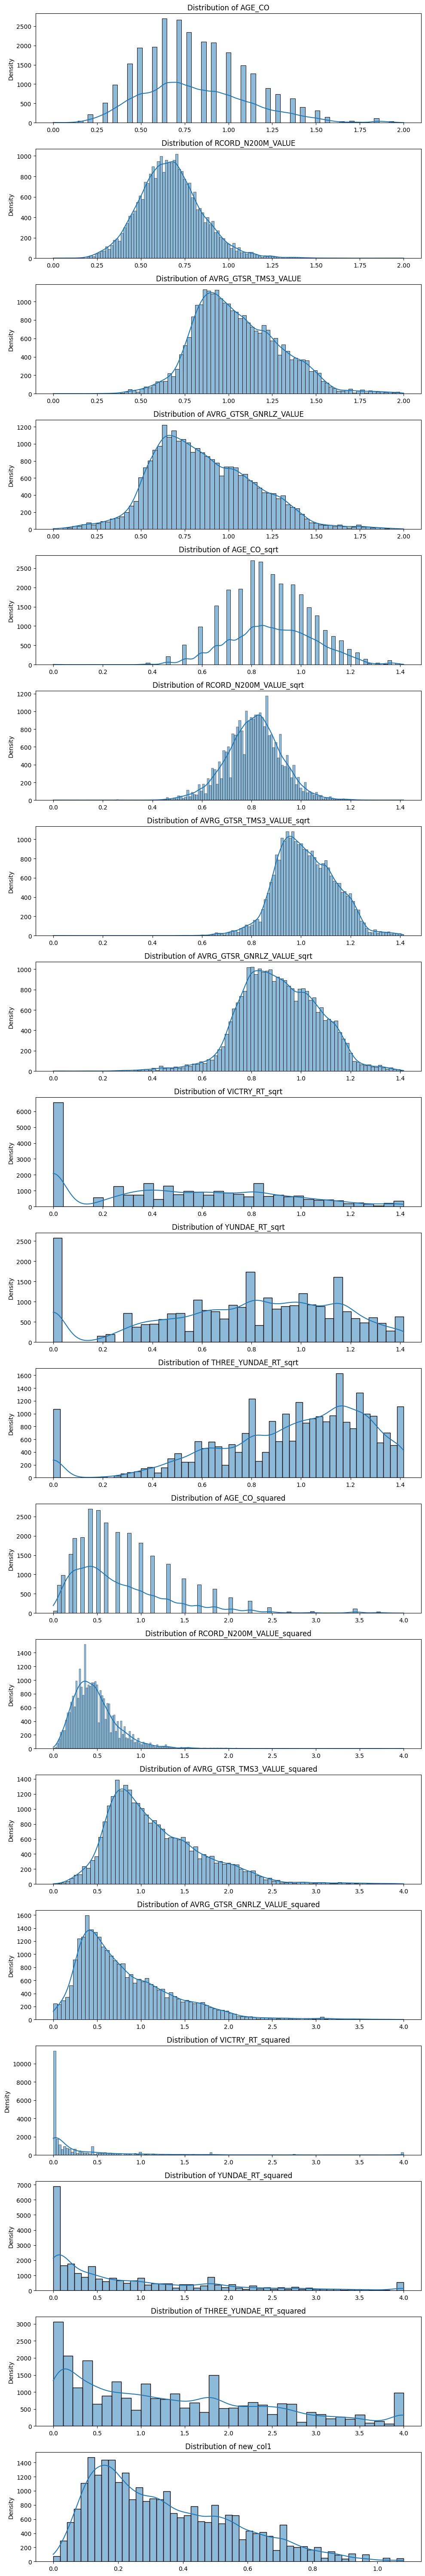

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(len(columns_to_display), 1, figsize=(10, 60))

for i, col in enumerate(columns_to_display):
    sns.histplot(train_data[col], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [27]:
row = train_data.iloc[901,:]

print(row[:100])

BASE_YEAR                      2016
TME_VALUE                        15
DAY_ORD_VALUE                     3
RACE_NO                          12
BACK_NO                           6
                             ...   
YUNDAE_RT_sqrt             1.356466
YUNDAE_RT_squared            3.3856
THREE_YUNDAE_RT_sqrt       1.356466
THREE_YUNDAE_RT_squared      3.3856
new_col1                   0.091288
Name: 901, Length: 72, dtype: object


In [28]:
# 재현성을 보장하기위해 random_seed를 추가

# 특정 라인을 제외하고 섞기(선택 가능)
def shuffle_races(data, year, ratio, exclude_back_no_list=None, random_seed=None):

    if random_seed is not None:
        np.random.seed(random_seed)

    df_year = data[data['BASE_YEAR'] == year].copy()

    # 각 경기를 구분하는 고유한 식별자 생성
    df_year['RACE_ID'] = df_year.groupby(['TME_VALUE', 'DAY_ORD_VALUE', 'RACE_NO']).ngroup()

    # 경기 ID의 리스트 생성
    race_ids = df_year['RACE_ID'].unique()

    # 경기 ID 리스트에서 주어진 비율만큼 무작위 추출 (random_state 추가)
    selected_race_ids = np.random.choice(race_ids, int(len(race_ids) * ratio), replace=False)

    # 추출된 경기만 포함하는 데이터 프레임 생성
    df_sampled = df_year[df_year['RACE_ID'].isin(selected_race_ids)]

    grouped = df_sampled.groupby(['TME_VALUE', 'DAY_ORD_VALUE', 'RACE_NO'])

    shuffled_dfs = []

    for name, group in grouped:
        if exclude_back_no_list:
            rows_exclude_list = []
            for exclude_back_no in exclude_back_no_list:
                row_exclude = group[group['BACK_NO'] == exclude_back_no]
                rows_exclude_list.append(row_exclude)
            
            # 샘플링 시 random_state 추가
            shuffled_rows_except_excluded = group[~group['BACK_NO'].isin(exclude_back_no_list)].sample(frac=1.0, random_state=random_seed)
        
            first_half_shuffled_rows_except_excluded = shuffled_rows_except_excluded[shuffled_rows_except_excluded.index < rows_exclude_list[0].index[0]]
            second_half_shuffled_rows_except_excluded = shuffled_rows_except_excluded[shuffled_rows_except_excluded.index > rows_exclude_list[-1].index[0]]
        
            shuffled_group = pd.concat([first_half_shuffled_rows_except_excluded] + rows_exclude_list + [second_half_shuffled_rows_except_excluded])
        else:
            # 샘플링 시 random_state 추가
            shuffled_group = group.sample(frac=1.0, random_state=random_seed)
       
       # 결과 리스트에 추가합니다.
        shuffled_dfs.append(shuffled_group)

    # 모든 셔플된 그룹을 합칩니다.
    df_shuffled = pd.concat(shuffled_dfs)
    df_shuffled = df_shuffled.reset_index(drop=True)
    df_shuffled.drop(['RACE_ID'], axis=1, inplace=True)
     
    return df_shuffled


# 순서를 완전히 반대로
def reverse_order(data, year, ratio, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
    
    df_year = data[data['BASE_YEAR'] == year].copy()

    # 각 경기를 구분하는 고유한 식별자 생성
    df_year['RACE_ID'] = df_year.groupby(['TME_VALUE', 'DAY_ORD_VALUE', 'RACE_NO']).ngroup()

    # 경기 ID의 리스트 생성
    race_ids = df_year['RACE_ID'].unique()

    # 경기 ID 리스트에서 주어진 비율만큼 무작위 추출
    selected_race_ids = np.random.choice(race_ids, int(len(race_ids) * ratio), replace=False)

    # 추출된 경기만 포함하는 데이터 프레임 생성
    df_sampled = df_year[df_year['RACE_ID'].isin(selected_race_ids)]

     # 그룹 생성
    grouped = df_sampled.groupby(['TME_VALUE', 'DAY_ORD_VALUE', 'RACE_NO'])

    reversed_dfs = []

    for name, group in grouped:
         # 각 그룹의 행 순서를 반대로 하고 결과 리스트에 추가합니다.
        reversed_group  = group.iloc[::-1]
        reversed_dfs.append(reversed_group)

     # 모든 뒤집힌 그룹을 합칩니다.
    df_reversed= pd.concat(reversed_dfs)
    df_reversed.drop(['RACE_ID'], axis=1,inplace=True)
     
    return df_reversed.reset_index(drop=True)


In [29]:
years = range(2016, 2024)

df_shuffled1 = {}
df_shuffled2 = {}
df_shuffled3 = {}

print('4번을 제외하고 섞기')
for year in years:
    ratio = 1.0 if year >= 2021 else 0.5
    df_shuffled1[year] = shuffle_races(data=train_data,
                                      year=year,
                                      ratio=ratio,
                                      exclude_back_no_list=[4],
                                      random_seed=42)
    print(year, df_shuffled1[year].shape)
    
print('-'*15)
print('\n무작위로 섞기')

for year in years:
    ratio = 0.4 if year >= 2021 else 0.2
    df_shuffled2[year] = shuffle_races(data=train_data,
                                      year=year,
                                      ratio=ratio,
                                      exclude_back_no_list=None,
                                      random_seed=42)
    print(year, df_shuffled2[year].shape)
    
print('-'*15)
print('\n순서를 뒤집기')

for year in years:
    ratio = 1.0 if year >= 2021 else 0.5
    df_shuffled3[year] = reverse_order(data=train_data,
                                      year=year,
                                      ratio=ratio,
                                      random_seed=42)
    print(year, df_shuffled3[year].shape)

4번을 제외하고 섞기
2016 (1680, 72)
2017 (1785, 72)
2018 (2079, 72)
2019 (2051, 72)
2020 (378, 72)
2021 (2674, 72)
2022 (4431, 72)
2023 (3955, 72)
---------------

무작위로 섞기
2016 (672, 72)
2017 (714, 72)
2018 (826, 72)
2019 (819, 72)
2020 (147, 72)
2021 (1064, 72)
2022 (1771, 72)
2023 (1582, 72)
---------------

순서를 뒤집기
2016 (1680, 72)
2017 (1785, 72)
2018 (2079, 72)
2019 (2051, 72)
2020 (378, 72)
2021 (2674, 72)
2022 (4431, 72)
2023 (3955, 72)


In [30]:
df_combined = pd.concat(list(df_shuffled1.values()) + list(df_shuffled2.values()) + list(df_shuffled3.values()))
final_train_data = pd.concat([train_data, df_combined]).copy()
final_train_data = final_train_data.reset_index(drop=True)

final_train_data.shape

(72681, 72)

In [31]:
final_train_data.drop(['BASE_YEAR', 'TME_VALUE', 'DAY_ORD_VALUE', 'RACE_NO', 'BACK_NO', 'PLAYER_GRAD_NM'], axis=1, inplace=True)
test_data.drop(['BASE_YEAR', 'TME_VALUE', 'DAY_ORD_VALUE', 'RACE_NO', 'BACK_NO', 'PLAYER_GRAD_NM'], axis=1, inplace=True)
sample_filtered.drop(['BASE_YEAR', 'TME_VALUE', 'DAY_ORD_VALUE', 'RACE_NO', 'BACK_NO', 'PLAYER_GRAD_NM'], axis=1, inplace=True)

In [32]:
input_train = final_train_data.drop(['Rank', 'three'], axis=1, inplace=False).copy()
output_train = final_train_data['three'].copy()

input_test = test_data.drop(['Rank', 'three'], axis=1, inplace=False).copy()
output_test = test_data['three'].copy()

input_sample = sample_filtered.drop(['Rank'], axis=1, inplace=False).copy()

In [33]:
# reshape 기능을 이용해 7명의 선수를 하나의 데이터로 합치기 (train data)
n_samples1 = len(input_train) // 7
n_samples2 = len(output_train) // 7
n_rows = 7
n_cols1 = input_train.shape[1]
n_cols2 = 1

reshaped_input_train = input_train.values.reshape((n_samples1, n_rows, n_cols1))
reshaped_output_train = output_train.values.reshape((n_samples2, n_rows, n_cols2))

reshaped_input_train = reshaped_input_train.reshape(-1, n_rows * n_cols1) 
reshaped_output_train = reshaped_output_train.reshape(-1, n_rows * n_cols2)

display(reshaped_input_train.shape, reshaped_output_train.shape)

(10383, 448)

(10383, 7)

In [34]:
# reshape 기능을 이용해 7명의 선수를 하나의 데이터로 합치기 (test data)
n_samples1 = len(input_test) // 7
n_samples2 = len(output_test) // 7
n_rows = 7
n_cols1 = input_test.shape[1]
n_cols2 = 1

reshaped_input_test = input_test.values.reshape((n_samples1, n_rows, n_cols1))
reshaped_output_test = output_test.values.reshape((n_samples2, n_rows, n_cols2))

reshaped_input_test = reshaped_input_test.reshape(-1, n_rows * n_cols1) 
reshaped_output_test = reshaped_output_test.reshape(-1, n_rows * n_cols2)

display(reshaped_input_test.shape, reshaped_output_test.shape)

(204, 448)

(204, 7)

In [35]:
# reshape 기능을 이용해 7명의 선수를 하나의 데이터로 합치기 (test data)
n_samples1 = len(input_sample) // 7
n_rows = 7
n_cols1 = input_sample.shape[1]

reshaped_input_sample = input_sample.values.reshape((n_samples1, n_rows, n_cols1))

reshaped_input_sample = reshaped_input_sample.reshape(-1, n_rows * n_cols1) 

display(reshaped_input_sample.shape)

(4, 448)

In [36]:
import time
import optuna
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
import xgboost as xgb
import catboost as cb


iteration = 0

def objective(trial):
    # classifier_name = trial.suggest_categorical('classifier', ['DecisionTree', 'LGBM', 'XGBoost', 'CatBoost'])
    global iteration
    start_time = time.time()
    
    classifier_name = 'XGBoost'
       
    if classifier_name == 'LGBM':
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 200, 700),
            'learning_rate': trial.suggest_float('learning_rate', 0.02, 0.3, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 15, 128),
            'max_depth': trial.suggest_int('max_depth', 3, 30),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.5),
            'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 0.5),  # L2 정규화
            'num_threads': 2,
#            'device': 'gpu',
            
        }
        model_lgbm = LGBMClassifier(**param, verbose=0)
        model = MultiOutputClassifier(model_lgbm, n_jobs=4)
        
    elif classifier_name == 'XGBoost':
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 150, 700),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'max_depth': trial.suggest_int('max_depth', 3, 50),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
            'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1),
            'colsample_bynode': trial.suggest_float('colsample_bynode', 0.5, 1),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
            'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 100),
            'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),
            'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear']),
            'tree_method': trial.suggest_categorical('tree_method', ['auto', 'hist']),
            'n_jobs': 7,
            'random_state': 42,
        }
        model = xgb.XGBClassifier(**param)
    
    elif classifier_name == 'RandomForest':
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 100),
            'max_depth': trial.suggest_int('max_depth', 3, 60),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
            'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
            'n_jobs': 7,
            'random_state': 42
        }
        model = RandomForestClassifier(**param)


    model.fit(reshaped_input_train, reshaped_output_train)   # 데이터 셋 이름에 맞게 수정

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'Trial {iteration} 완료, 경과 시간: {elapsed_time:.2f}초')
    iteration += 1

    y_pred_proba = model.predict_proba(reshaped_input_test)
#    y_pred_proba = np.array([proba[:, 1] for proba in y_pred_proba]).T
    top_3_indices = np.argsort(y_pred_proba, axis=1)[:, -3:]

    # y_pred_max 초기화 (모든 값을 0으로 설정)
    y_pred_max = np.zeros_like(y_pred_proba)

    # 상위 3개 인덱스의 위치에 1 할당
    for i, indices in enumerate(top_3_indices):
        y_pred_max[i, indices] = 1

    # perfect_match 계산
    perfect_match = []
    for true, pred in zip(reshaped_output_test, y_pred_max):
        # reshaped_output_test에서 1인 값이 y_pred_max에서도 1인 값에 포함되어 있는지 확인
        match = np.all(np.logical_or(np.logical_not(pred), true))
        perfect_match.append(match)

    perfect_match = np.array(perfect_match, dtype=int)

    accuracy = np.mean(perfect_match)
    print("accuracy for perfect match:", accuracy)
    
    return accuracy

In [ ]:
start_time = time.time()
iteration = 0

# Optuna Study 생성 및 최적화
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler)
# study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=10000)

# 최적화 결과 출력
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

end_time = time.time()
elapsed_time = end_time - start_time
print(f'경과 시간: {elapsed_time:.2f}초')

[I 2024-03-05 11:56:05,882] A new study created in memory with name: no-name-2e0fcaa1-c1d7-40fe-82c9-bb680476dee2
[I 2024-03-05 11:56:15,032] Trial 0 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 356, 'learning_rate': 0.2536999076681772, 'max_depth': 38, 'min_child_weight': 6, 'gamma': 0.7800932022121826, 'colsample_bytree': 0.5779972601681014, 'colsample_bylevel': 0.5290418060840998, 'colsample_bynode': 0.9330880728874675, 'reg_alpha': 0.6011150117432088, 'reg_lambda': 0.7080725777960455, 'scale_pos_weight': 3.0378649352844422, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 0 with value: 0.30392156862745096.


Trial 0 완료, 경과 시간: 9.14초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 11:56:36,304] Trial 1 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 317, 'learning_rate': 0.05958389350068958, 'max_depth': 23, 'min_child_weight': 3, 'gamma': 3.0592644736118975, 'colsample_bytree': 0.569746930326021, 'colsample_bylevel': 0.6460723242676091, 'colsample_bynode': 0.6831809216468459, 'reg_alpha': 0.45606998421703593, 'reg_lambda': 0.7851759613930136, 'scale_pos_weight': 20.767704433677615, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 1 완료, 경과 시간: 21.26초
accuracy for perfect match: 0.35294117647058826


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [11:56:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 11:56:38,526] Trial 2 finished with value: 0.19607843137254902 and parameters: {'n_estimators': 185, 'learning_rate': 0.2521267904777921, 'max_depth': 49, 'min_child_weight': 9, 'gamma': 1.5230688458668533, 'colsample_bytree': 0.5488360570031919, 'colsample_bylevel': 0.8421165132560784, 'colsample_bynode': 0.7200762468698007, 'reg_alpha': 0.12203823484477883, 'reg_lambda': 0.4951769101112702, 'scale_pos_weight': 4.404463590406621, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 1 with value: 0.352941176470588

Trial 2 완료, 경과 시간: 2.22초
accuracy for perfect match: 0.19607843137254902


[I 2024-03-05 11:57:19,610] Trial 3 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 451, 'learning_rate': 0.01875220945578641, 'max_depth': 49, 'min_child_weight': 8, 'gamma': 4.697494707820946, 'colsample_bytree': 0.9474136752138245, 'colsample_bylevel': 0.7989499894055425, 'colsample_bynode': 0.9609371175115584, 'reg_alpha': 0.0884925020519195, 'reg_lambda': 0.1959828624191452, 'scale_pos_weight': 5.477501602143269, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 3 완료, 경과 시간: 41.07초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 11:57:41,289] Trial 4 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 304, 'learning_rate': 0.06333268775321843, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 0.3727532183988541, 'colsample_bytree': 0.9934434683002586, 'colsample_bylevel': 0.8861223846483287, 'colsample_bynode': 0.5993578407670862, 'reg_alpha': 0.005522117123602399, 'reg_lambda': 0.8154614284548342, 'scale_pos_weight': 70.9788770409141, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 4 완료, 경과 시간: 21.67초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 11:58:09,078] Trial 5 finished with value: 0.29901960784313725 and parameters: {'n_estimators': 625, 'learning_rate': 0.08330803890301997, 'max_depth': 18, 'min_child_weight': 1, 'gamma': 1.554911608578311, 'colsample_bytree': 0.6625916610133735, 'colsample_bylevel': 0.864803089169032, 'colsample_bynode': 0.8187787356776066, 'reg_alpha': 0.8872127425763265, 'reg_lambda': 0.4722149251619493, 'scale_pos_weight': 12.83983034789187, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 5 완료, 경과 시간: 27.78초
accuracy for perfect match: 0.29901960784313725


[I 2024-03-05 11:58:15,453] Trial 6 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 438, 'learning_rate': 0.042808491617570936, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.15714592843367126, 'colsample_bytree': 0.8182052056318903, 'colsample_bylevel': 0.6571779905381634, 'colsample_bynode': 0.7542853455823514, 'reg_alpha': 0.907566473926093, 'reg_lambda': 0.24929222914887494, 'scale_pos_weight': 41.62790938052734, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 6 완료, 경과 시간: 6.37초
accuracy for perfect match: 0.3284313725490196


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [11:58:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 11:58:24,433] Trial 7 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 662, 'learning_rate': 0.156203869845265, 'max_depth': 33, 'min_child_weight': 9, 'gamma': 4.018360384495573, 'colsample_bytree': 0.5932850294430179, 'colsample_bylevel': 0.9462794992449889, 'colsample_bynode': 0.7696711209578253, 'reg_alpha': 0.8074401551640625, 'reg_lambda': 0.8960912999234932, 'scale_pos_weight': 32.48234402221452, 'max_delta_step': 1, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.

Trial 7 완료, 경과 시간: 8.98초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 11:59:08,958] Trial 8 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 153, 'learning_rate': 0.05681142678077596, 'max_depth': 23, 'min_child_weight': 3, 'gamma': 0.599326836668414, 'colsample_bytree': 0.668807585701814, 'colsample_bylevel': 0.9714548519562596, 'colsample_bynode': 0.6616014660103776, 'reg_alpha': 0.5187906217433661, 'reg_lambda': 0.7030189588951778, 'scale_pos_weight': 36.9993306355501, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 8 완료, 경과 시간: 44.51초
accuracy for perfect match: 0.3480392156862745


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [11:59:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 11:59:22,862] Trial 9 finished with value: 0.25980392156862747 and parameters: {'n_estimators': 306, 'learning_rate': 0.011336695817840537, 'max_depth': 32, 'min_child_weight': 6, 'gamma': 0.25739375624994676, 'colsample_bytree': 0.6393232321183058, 'colsample_bylevel': 0.9541329429833268, 'colsample_bynode': 0.6197809453334862, 'reg_alpha': 0.1448948720912231, 'reg_lambda': 0.489452760277563, 'scale_pos_weight': 98.57939495694947, 'max_delta_step': 2, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 1 with value: 0.352941176470588

Trial 9 완료, 경과 시간: 13.90초
accuracy for perfect match: 0.25980392156862747


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [11:59:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 11:59:43,557] Trial 10 finished with value: 0.12254901960784313 and parameters: {'n_estimators': 562, 'learning_rate': 0.03445639818969486, 'max_depth': 15, 'min_child_weight': 4, 'gamma': 3.144955895294687, 'colsample_bytree': 0.7876040334076364, 'colsample_bylevel': 0.6806559982209047, 'colsample_bynode': 0.5112188117925796, 'reg_alpha': 0.3347951762232364, 'reg_lambda': 0.9923626654603374, 'scale_pos_weight': 59.456994269779244, 'max_delta_step': 5, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 1 with value: 0.352941176470588

Trial 10 완료, 경과 시간: 20.69초
accuracy for perfect match: 0.12254901960784313


[I 2024-03-05 11:59:59,035] Trial 11 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 160, 'learning_rate': 0.09577805048336997, 'max_depth': 23, 'min_child_weight': 3, 'gamma': 2.7432006340701722, 'colsample_bytree': 0.7042582162155758, 'colsample_bylevel': 0.593568835256586, 'colsample_bynode': 0.6608835888001324, 'reg_alpha': 0.46967650889757456, 'reg_lambda': 0.6768180580956151, 'scale_pos_weight': 33.813952009716736, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 11 완료, 경과 시간: 15.46초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 12:00:45,646] Trial 12 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 234, 'learning_rate': 0.028884563586184075, 'max_depth': 25, 'min_child_weight': 4, 'gamma': 2.104288965150801, 'colsample_bytree': 0.5151746651971615, 'colsample_bylevel': 0.720022965705608, 'colsample_bynode': 0.5320247301647623, 'reg_alpha': 0.6497342851025568, 'reg_lambda': 0.6597574607439419, 'scale_pos_weight': 24.40166576710784, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 12 완료, 경과 시간: 46.59초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 12:00:56,741] Trial 13 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 252, 'learning_rate': 0.12252236605089092, 'max_depth': 16, 'min_child_weight': 4, 'gamma': 3.4782338024617165, 'colsample_bytree': 0.7145312670138264, 'colsample_bylevel': 0.6038375282130702, 'colsample_bynode': 0.8386748963910842, 'reg_alpha': 0.3649946256924496, 'reg_lambda': 0.7913148686688112, 'scale_pos_weight': 54.11247059138613, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 13 완료, 경과 시간: 11.09초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 12:01:27,997] Trial 14 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 516, 'learning_rate': 0.05660025812588577, 'max_depth': 30, 'min_child_weight': 1, 'gamma': 2.0858390865910357, 'colsample_bytree': 0.8634823758940224, 'colsample_bylevel': 0.7605124006528361, 'colsample_bynode': 0.6716647348251706, 'reg_alpha': 0.6672173599835824, 'reg_lambda': 0.02369541150583221, 'scale_pos_weight': 20.97749383460788, 'max_delta_step': 0, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 14 완료, 경과 시간: 31.24초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 12:03:07,867] Trial 15 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 367, 'learning_rate': 0.018139354769745677, 'max_depth': 39, 'min_child_weight': 3, 'gamma': 1.1884849383054878, 'colsample_bytree': 0.6216349932710734, 'colsample_bylevel': 0.5152622756501755, 'colsample_bynode': 0.5852306392660566, 'reg_alpha': 0.3289199001497584, 'reg_lambda': 0.5983826855117391, 'scale_pos_weight': 71.36563331158828, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 15 완료, 경과 시간: 99.82초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 12:04:27,174] Trial 16 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 369, 'learning_rate': 0.020387022177927365, 'max_depth': 39, 'min_child_weight': 5, 'gamma': 1.3301459728500906, 'colsample_bytree': 0.6104338439614247, 'colsample_bylevel': 0.5107080243269783, 'colsample_bynode': 0.5905419002720461, 'reg_alpha': 0.3022380141816468, 'reg_lambda': 0.3205479539689443, 'scale_pos_weight': 75.7225787108838, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 16 완료, 경과 시간: 79.26초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 12:05:46,831] Trial 17 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 375, 'learning_rate': 0.010022140566927247, 'max_depth': 38, 'min_child_weight': 2, 'gamma': 3.7802409932861893, 'colsample_bytree': 0.5003925963364979, 'colsample_bylevel': 0.5681921123768768, 'colsample_bynode': 0.562541974090285, 'reg_alpha': 0.2315729736422617, 'reg_lambda': 0.5628308336403143, 'scale_pos_weight': 87.89267611345022, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 17 완료, 경과 시간: 79.61초
accuracy for perfect match: 0.3235294117647059


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [12:05:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 12:06:04,843] Trial 18 finished with value: 0.20098039215686275 and parameters: {'n_estimators': 458, 'learning_rate': 0.018326204092280557, 'max_depth': 44, 'min_child_weight': 7, 'gamma': 2.6455019133865214, 'colsample_bytree': 0.729327622500193, 'colsample_bylevel': 0.6403674911828511, 'colsample_bynode': 0.713888945863794, 'reg_alpha': 0.24216475498087234, 'reg_lambda': 0.35049586604390714, 'scale_pos_weight': 66.49352433314591, 'max_delta_step': 6, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058

Trial 18 완료, 경과 시간: 18.01초
accuracy for perfect match: 0.20098039215686275


[I 2024-03-05 12:06:41,045] Trial 19 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 296, 'learning_rate': 0.028400758228154292, 'max_depth': 42, 'min_child_weight': 3, 'gamma': 4.617496923264991, 'colsample_bytree': 0.5653052535283553, 'colsample_bylevel': 0.5432847297245642, 'colsample_bynode': 0.8799294206205028, 'reg_alpha': 0.5266993185842673, 'reg_lambda': 0.9989528688473648, 'scale_pos_weight': 47.046905518247016, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 19 완료, 경과 시간: 36.18초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 12:07:22,726] Trial 20 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 520, 'learning_rate': 0.040039061660320154, 'max_depth': 27, 'min_child_weight': 5, 'gamma': 1.9978618662082388, 'colsample_bytree': 0.6412804572280165, 'colsample_bylevel': 0.69375859887217, 'colsample_bynode': 0.6374968550246631, 'reg_alpha': 0.4262953522934635, 'reg_lambda': 0.5760331907229626, 'scale_pos_weight': 79.23777822862019, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 20 완료, 경과 시간: 41.66초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 12:07:55,774] Trial 21 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 216, 'learning_rate': 0.06891823919012771, 'max_depth': 20, 'min_child_weight': 3, 'gamma': 0.8241310168655032, 'colsample_bytree': 0.6658741509178677, 'colsample_bylevel': 0.7475373718247127, 'colsample_bynode': 0.6882256607566926, 'reg_alpha': 0.4912665581490585, 'reg_lambda': 0.7801078634078503, 'scale_pos_weight': 39.64090436457904, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 21 완료, 경과 시간: 33.03초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 12:08:37,346] Trial 22 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 395, 'learning_rate': 0.04660309547781014, 'max_depth': 13, 'min_child_weight': 2, 'gamma': 0.9752150395971406, 'colsample_bytree': 0.6829960550032128, 'colsample_bylevel': 0.9871236169346466, 'colsample_bynode': 0.5686942085886737, 'reg_alpha': 0.7579244668461373, 'reg_lambda': 0.8843771324883933, 'scale_pos_weight': 23.198586721662352, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 22 완료, 경과 시간: 41.55초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 12:08:50,794] Trial 23 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 270, 'learning_rate': 0.11687649802251988, 'max_depth': 21, 'min_child_weight': 3, 'gamma': 2.963669531490198, 'colsample_bytree': 0.7607643578428952, 'colsample_bylevel': 0.6181176190750675, 'colsample_bynode': 0.6261648578708735, 'reg_alpha': 0.5704682665989673, 'reg_lambda': 0.6339556352413085, 'scale_pos_weight': 59.11533965736959, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 23 완료, 경과 시간: 13.44초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 12:09:44,291] Trial 24 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 150, 'learning_rate': 0.014332218564622709, 'max_depth': 26, 'min_child_weight': 4, 'gamma': 1.0064807510666318, 'colsample_bytree': 0.6170565305268887, 'colsample_bylevel': 0.8002909474624988, 'colsample_bynode': 0.7122309235479091, 'reg_alpha': 0.44607481175544894, 'reg_lambda': 0.7151460684232253, 'scale_pos_weight': 14.041903995198176, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 24 완료, 경과 시간: 53.47초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 12:11:20,545] Trial 25 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 341, 'learning_rate': 0.025928326948434072, 'max_depth': 31, 'min_child_weight': 2, 'gamma': 0.5041438937587353, 'colsample_bytree': 0.5286294053827518, 'colsample_bylevel': 0.5639951433297447, 'colsample_bynode': 0.7869994353228764, 'reg_alpha': 0.3826724594917994, 'reg_lambda': 0.5842222119667314, 'scale_pos_weight': 32.02403971139354, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 25 완료, 경과 시간: 96.19초
accuracy for perfect match: 0.3333333333333333


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [12:11:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 12:11:24,099] Trial 26 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 198, 'learning_rate': 0.0802258561539796, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 2.3561922552521772, 'colsample_bytree': 0.5842546861516069, 'colsample_bylevel': 0.5060106390264069, 'colsample_bynode': 0.653795130358618, 'reg_alpha': 0.715455187361289, 'reg_lambda': 0.3882079391237793, 'scale_pos_weight': 47.60325332614664, 'max_delta_step': 7, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826

Trial 26 완료, 경과 시간: 3.55초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 12:11:37,609] Trial 27 finished with value: 0.28431372549019607 and parameters: {'n_estimators': 404, 'learning_rate': 0.17855457674923172, 'max_depth': 35, 'min_child_weight': 5, 'gamma': 1.822163066568911, 'colsample_bytree': 0.6293395855283195, 'colsample_bylevel': 0.8927571935230798, 'colsample_bynode': 0.5296556596657254, 'reg_alpha': 0.5494906396179245, 'reg_lambda': 0.8293037136677804, 'scale_pos_weight': 85.37209248815975, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 27 완료, 경과 시간: 13.50초
accuracy for perfect match: 0.28431372549019607


[I 2024-03-05 12:12:35,271] Trial 28 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 328, 'learning_rate': 0.05124981767522219, 'max_depth': 45, 'min_child_weight': 3, 'gamma': 0.017978284560202673, 'colsample_bytree': 0.5443646009235269, 'colsample_bylevel': 0.6485754999452861, 'colsample_bynode': 0.5650688209009267, 'reg_alpha': 0.26260117454510484, 'reg_lambda': 0.740630644042537, 'scale_pos_weight': 15.355815225787385, 'max_delta_step': 2, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 28 완료, 경과 시간: 57.63초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 12:13:25,155] Trial 29 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 482, 'learning_rate': 0.03438700127813993, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 1.17292139453695, 'colsample_bytree': 0.5826172226716315, 'colsample_bylevel': 0.5546173112644802, 'colsample_bynode': 0.6932640206213845, 'reg_alpha': 0.5958841260183388, 'reg_lambda': 0.8961248515116076, 'scale_pos_weight': 64.46129815310258, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.


Trial 29 완료, 경과 시간: 49.85초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 12:14:37,082] Trial 30 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 487, 'learning_rate': 0.023268929335361732, 'max_depth': 36, 'min_child_weight': 7, 'gamma': 1.2204569666136809, 'colsample_bytree': 0.5711700983150028, 'colsample_bylevel': 0.5350978696308919, 'colsample_bynode': 0.8951174073552459, 'reg_alpha': 0.6060735493025757, 'reg_lambda': 0.9121756196263746, 'scale_pos_weight': 65.12494473931801, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.


Trial 30 완료, 경과 시간: 71.88초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 12:15:51,494] Trial 31 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 488, 'learning_rate': 0.023129867155660806, 'max_depth': 38, 'min_child_weight': 7, 'gamma': 1.1849531149005996, 'colsample_bytree': 0.5782950924982238, 'colsample_bylevel': 0.5432005511553767, 'colsample_bynode': 0.9275133114228717, 'reg_alpha': 0.6127708952581981, 'reg_lambda': 0.9237029476165035, 'scale_pos_weight': 65.1888044149458, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.


Trial 31 완료, 경과 시간: 74.35초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 12:17:33,122] Trial 32 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 558, 'learning_rate': 0.013961914869378445, 'max_depth': 35, 'min_child_weight': 7, 'gamma': 1.6660393514049272, 'colsample_bytree': 0.5531796766802274, 'colsample_bylevel': 0.5764239663146207, 'colsample_bynode': 0.9097552636241635, 'reg_alpha': 0.6090523088492662, 'reg_lambda': 0.9428583394666096, 'scale_pos_weight': 58.56253439474379, 'max_delta_step': 2, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.


Trial 32 완료, 경과 시간: 101.57초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 12:18:13,102] Trial 33 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 481, 'learning_rate': 0.03483446632712912, 'max_depth': 28, 'min_child_weight': 8, 'gamma': 2.345633544541794, 'colsample_bytree': 0.5958364804387466, 'colsample_bylevel': 0.5357126103996523, 'colsample_bynode': 0.9671169984296177, 'reg_alpha': 0.8191248082136273, 'reg_lambda': 0.863446759054628, 'scale_pos_weight': 69.20055891049016, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.


Trial 33 완료, 경과 시간: 39.96초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 12:19:32,404] Trial 34 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 412, 'learning_rate': 0.015996490625372926, 'max_depth': 41, 'min_child_weight': 8, 'gamma': 1.2882618786242546, 'colsample_bytree': 0.5351815349676197, 'colsample_bylevel': 0.5042402704978435, 'colsample_bynode': 0.8030004949641859, 'reg_alpha': 0.9911816784669863, 'reg_lambda': 0.766240473593855, 'scale_pos_weight': 84.59470144049011, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.


Trial 34 완료, 경과 시간: 79.26초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 12:19:46,682] Trial 35 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 565, 'learning_rate': 0.03478174643546105, 'max_depth': 35, 'min_child_weight': 10, 'gamma': 3.2777338977477806, 'colsample_bytree': 0.5609897159023214, 'colsample_bylevel': 0.6206045041961754, 'colsample_bynode': 0.9901323182839455, 'reg_alpha': 0.4224871618881656, 'reg_lambda': 0.8444499069417801, 'scale_pos_weight': 1.3817797477079239, 'max_delta_step': 0, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.


Trial 35 완료, 경과 시간: 14.26초
accuracy for perfect match: 0.3480392156862745


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [12:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 12:20:08,951] Trial 36 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 611, 'learning_rate': 0.021723007265204933, 'max_depth': 29, 'min_child_weight': 6, 'gamma': 1.540150678315257, 'colsample_bytree': 0.6131729095744496, 'colsample_bylevel': 0.5795922531333356, 'colsample_bynode': 0.7413201433718424, 'reg_alpha': 0.6733578247312395, 'reg_lambda': 0.9739097872597786, 'scale_pos_weight': 74.40903461057368, 'max_delta_step': 6, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058

Trial 36 완료, 경과 시간: 22.27초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 12:21:44,145] Trial 37 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 434, 'learning_rate': 0.017285802475225286, 'max_depth': 49, 'min_child_weight': 7, 'gamma': 0.68794333623128, 'colsample_bytree': 0.8714009172045479, 'colsample_bylevel': 0.5527833235708989, 'colsample_bynode': 0.85056986989895, 'reg_alpha': 0.16786359368005188, 'reg_lambda': 0.8994809889789493, 'scale_pos_weight': 53.19895317309573, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.


Trial 37 완료, 경과 시간: 95.15초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 12:22:20,781] Trial 38 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 471, 'learning_rate': 0.025075933571627403, 'max_depth': 46, 'min_child_weight': 6, 'gamma': 4.3153575683182686, 'colsample_bytree': 0.5083521919506405, 'colsample_bylevel': 0.5288908326169377, 'colsample_bynode': 0.6921816260907054, 'reg_alpha': 0.039850506253573614, 'reg_lambda': 0.4197572563763604, 'scale_pos_weight': 63.18502616118099, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.


Trial 38 완료, 경과 시간: 36.61초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 12:22:33,409] Trial 39 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 698, 'learning_rate': 0.012861093836636042, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 1.8630177066119786, 'colsample_bytree': 0.6416415861845616, 'colsample_bylevel': 0.6712271751499687, 'colsample_bynode': 0.7415622480553901, 'reg_alpha': 0.575902460712787, 'reg_lambda': 0.6117244043005474, 'scale_pos_weight': 95.86521217731952, 'max_delta_step': 1, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.


Trial 39 완료, 경과 시간: 12.62초
accuracy for perfect match: 0.3284313725490196


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [12:22:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 12:22:50,389] Trial 40 finished with value: 0.11764705882352941 and parameters: {'n_estimators': 514, 'learning_rate': 0.039187877908970395, 'max_depth': 34, 'min_child_weight': 9, 'gamma': 1.0961137737862623, 'colsample_bytree': 0.5865071635437863, 'colsample_bylevel': 0.6315956013789086, 'colsample_bynode': 0.6008837202885554, 'reg_alpha': 0.38641869515551486, 'reg_lambda': 0.5246718456475974, 'scale_pos_weight': 81.08596795170085, 'max_delta_step': 8, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 1 with value: 0.3529411764705

Trial 40 완료, 경과 시간: 16.98초
accuracy for perfect match: 0.11764705882352941


[I 2024-03-05 12:23:27,529] Trial 41 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 278, 'learning_rate': 0.06098608031021419, 'max_depth': 23, 'min_child_weight': 5, 'gamma': 0.5210080415264795, 'colsample_bytree': 0.6663696147420621, 'colsample_bylevel': 0.5903680131173842, 'colsample_bynode': 0.6843747783401857, 'reg_alpha': 0.5183631057318228, 'reg_lambda': 0.7064754004144143, 'scale_pos_weight': 41.69395088063108, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 1 with value: 0.35294117647058826.


Trial 41 완료, 경과 시간: 37.12초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 12:23:56,663] Trial 42 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 316, 'learning_rate': 0.06601119784865767, 'max_depth': 19, 'min_child_weight': 6, 'gamma': 0.3569616026827831, 'colsample_bytree': 0.6800410736736096, 'colsample_bylevel': 0.5933875236915505, 'colsample_bynode': 0.6946153070092874, 'reg_alpha': 0.4974766307037466, 'reg_lambda': 0.7345207291253445, 'scale_pos_weight': 6.819606104456247, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 1 with value: 0.35294117647058826.


Trial 42 완료, 경과 시간: 29.11초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 12:24:24,133] Trial 43 finished with value: 0.3627450980392157 and parameters: {'n_estimators': 268, 'learning_rate': 0.07873571530684403, 'max_depth': 23, 'min_child_weight': 5, 'gamma': 0.763147888918062, 'colsample_bytree': 0.5995719809870289, 'colsample_bylevel': 0.5186792047763304, 'colsample_bynode': 0.7739058609689992, 'reg_alpha': 0.7347676722842478, 'reg_lambda': 0.8137809501495902, 'scale_pos_weight': 44.13041116525312, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 43 완료, 경과 시간: 27.45초
accuracy for perfect match: 0.3627450980392157


[I 2024-03-05 12:24:46,682] Trial 44 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 349, 'learning_rate': 0.07834363886490113, 'max_depth': 22, 'min_child_weight': 8, 'gamma': 1.4043961625680335, 'colsample_bytree': 0.5649011062059064, 'colsample_bylevel': 0.5187509691510521, 'colsample_bynode': 0.7709067942933329, 'reg_alpha': 0.8662252249405308, 'reg_lambda': 0.8538452515133799, 'scale_pos_weight': 72.52168127105038, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 44 완료, 경과 시간: 22.54초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 12:25:47,936] Trial 45 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 390, 'learning_rate': 0.03128545140476223, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 0.8392239225635566, 'colsample_bytree': 0.6005182283917936, 'colsample_bylevel': 0.5565823563348284, 'colsample_bynode': 0.8231833995705696, 'reg_alpha': 0.7240086423196872, 'reg_lambda': 0.793779630806084, 'scale_pos_weight': 62.44517582406414, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 45 완료, 경과 시간: 61.21초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 12:26:04,916] Trial 46 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 438, 'learning_rate': 0.10263611595623609, 'max_depth': 16, 'min_child_weight': 4, 'gamma': 1.62205886395145, 'colsample_bytree': 0.6396804116612409, 'colsample_bylevel': 0.5322683153845461, 'colsample_bynode': 0.7227455449161131, 'reg_alpha': 0.7830001568495034, 'reg_lambda': 0.9453018173696646, 'scale_pos_weight': 27.980511827197425, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 46 완료, 경과 시간: 16.96초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 12:26:32,646] Trial 47 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 256, 'learning_rate': 0.049483066677546254, 'max_depth': 32, 'min_child_weight': 5, 'gamma': 3.5458263741090392, 'colsample_bytree': 0.9731410108599758, 'colsample_bylevel': 0.6125808540260473, 'colsample_bynode': 0.8598413958064053, 'reg_alpha': 0.6438307421133405, 'reg_lambda': 0.9107609756239898, 'scale_pos_weight': 56.46272041485284, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 47 완료, 경과 시간: 27.72초
accuracy for perfect match: 0.31862745098039214


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [12:26:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 12:26:39,233] Trial 48 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 293, 'learning_rate': 0.04344376380951359, 'max_depth': 24, 'min_child_weight': 10, 'gamma': 0.2307009450038392, 'colsample_bytree': 0.5303233589978134, 'colsample_bylevel': 0.5000386939596566, 'colsample_bynode': 0.8886131637797078, 'reg_alpha': 0.6900738185598468, 'reg_lambda': 0.6688460914861784, 'scale_pos_weight': 69.61191679851348, 'max_delta_step': 7, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 43 with value: 0.362745098039

Trial 48 완료, 경과 시간: 6.58초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 12:26:46,981] Trial 49 finished with value: 0.29411764705882354 and parameters: {'n_estimators': 350, 'learning_rate': 0.23726016814145304, 'max_depth': 18, 'min_child_weight': 6, 'gamma': 2.835104465166186, 'colsample_bytree': 0.693317701982332, 'colsample_bylevel': 0.6954651645572834, 'colsample_bynode': 0.6441225467589186, 'reg_alpha': 0.3042042031879688, 'reg_lambda': 0.8185811941517191, 'scale_pos_weight': 43.293528435572256, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 49 완료, 경과 시간: 7.74초
accuracy for perfect match: 0.29411764705882354


[I 2024-03-05 12:28:35,911] Trial 50 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 374, 'learning_rate': 0.020154737723626196, 'max_depth': 37, 'min_child_weight': 4, 'gamma': 0.7442415247818471, 'colsample_bytree': 0.5701925095622711, 'colsample_bylevel': 0.5261528731325505, 'colsample_bynode': 0.761052385679182, 'reg_alpha': 0.6248502541068282, 'reg_lambda': 0.013015347213076733, 'scale_pos_weight': 51.25343464084822, 'max_delta_step': 1, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 50 완료, 경과 시간: 108.87초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 12:29:18,406] Trial 51 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 277, 'learning_rate': 0.058377950980169964, 'max_depth': 22, 'min_child_weight': 5, 'gamma': 0.35184666207664206, 'colsample_bytree': 0.6563784568795455, 'colsample_bylevel': 0.5874214769993427, 'colsample_bynode': 0.6797747729208434, 'reg_alpha': 0.5452055863434061, 'reg_lambda': 0.7043536710959795, 'scale_pos_weight': 46.41834601484027, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 51 완료, 경과 시간: 42.47초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 12:29:50,210] Trial 52 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 235, 'learning_rate': 0.09562670823954751, 'max_depth': 25, 'min_child_weight': 5, 'gamma': 0.006282829612546115, 'colsample_bytree': 0.622976434264489, 'colsample_bylevel': 0.558301253480195, 'colsample_bynode': 0.6026420458823998, 'reg_alpha': 0.46357304869558014, 'reg_lambda': 0.756588247883603, 'scale_pos_weight': 35.47786223081395, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 52 완료, 경과 시간: 31.78초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 12:30:23,829] Trial 53 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 322, 'learning_rate': 0.06883282000460904, 'max_depth': 18, 'min_child_weight': 4, 'gamma': 0.5388262278680729, 'colsample_bytree': 0.7328779334698364, 'colsample_bylevel': 0.6001747343430596, 'colsample_bynode': 0.7300327072317853, 'reg_alpha': 0.3464724126224505, 'reg_lambda': 0.5266425397614274, 'scale_pos_weight': 39.341722188840755, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 53 완료, 경과 시간: 33.60초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 12:31:03,478] Trial 54 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 290, 'learning_rate': 0.06035725497187093, 'max_depth': 30, 'min_child_weight': 2, 'gamma': 0.9140211570984438, 'colsample_bytree': 0.6550867863629785, 'colsample_bylevel': 0.5705077948778712, 'colsample_bynode': 0.7055946222074222, 'reg_alpha': 0.5076301769010266, 'reg_lambda': 0.6470780050190699, 'scale_pos_weight': 29.743235965715137, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 54 완료, 경과 시간: 39.63초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 12:31:22,132] Trial 55 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 192, 'learning_rate': 0.0894934344637439, 'max_depth': 41, 'min_child_weight': 6, 'gamma': 1.214248947579988, 'colsample_bytree': 0.6016763743331502, 'colsample_bylevel': 0.539936349587359, 'colsample_bynode': 0.663240157797275, 'reg_alpha': 0.41452033750839157, 'reg_lambda': 0.17084273579069087, 'scale_pos_weight': 18.683673591694944, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 55 완료, 경과 시간: 18.64초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 12:31:39,463] Trial 56 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 237, 'learning_rate': 0.13676180187398532, 'max_depth': 28, 'min_child_weight': 9, 'gamma': 0.5505435882455942, 'colsample_bytree': 0.5479480831146327, 'colsample_bylevel': 0.6637514451192781, 'colsample_bynode': 0.6244836452098876, 'reg_alpha': 0.5750317156776323, 'reg_lambda': 0.7952271861094586, 'scale_pos_weight': 44.01057638286172, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 56 완료, 경과 시간: 17.32초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 12:32:32,983] Trial 57 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 502, 'learning_rate': 0.030270563216577784, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 1.392085529166314, 'colsample_bytree': 0.5195272978579394, 'colsample_bylevel': 0.5174686558728537, 'colsample_bynode': 0.7832927821796614, 'reg_alpha': 0.4746744705686561, 'reg_lambda': 0.6926118438035961, 'scale_pos_weight': 67.06078633343607, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 57 완료, 경과 시간: 53.48초
accuracy for perfect match: 0.3382352941176471


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [12:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 12:32:45,221] Trial 58 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 540, 'learning_rate': 0.04349966060542826, 'max_depth': 20, 'min_child_weight': 3, 'gamma': 3.0848103055182983, 'colsample_bytree': 0.7896802254311792, 'colsample_bylevel': 0.6276161830887955, 'colsample_bynode': 0.578269264914707, 'reg_alpha': 0.7269905115196422, 'reg_lambda': 0.8820080324785387, 'scale_pos_weight': 77.45031974895228, 'max_delta_step': 6, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 43 with value: 0.36274509803921

Trial 58 완료, 경과 시간: 12.23초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 12:33:17,888] Trial 59 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 451, 'learning_rate': 0.07184712683968007, 'max_depth': 23, 'min_child_weight': 2, 'gamma': 1.0830909767493946, 'colsample_bytree': 0.58480428832669, 'colsample_bylevel': 0.5854490545366109, 'colsample_bynode': 0.6740587445715563, 'reg_alpha': 0.30030586611677923, 'reg_lambda': 0.958321507362072, 'scale_pos_weight': 50.03655759557175, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 59 완료, 경과 시간: 32.65초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 12:33:52,535] Trial 60 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 213, 'learning_rate': 0.03815447193801007, 'max_depth': 14, 'min_child_weight': 5, 'gamma': 0.6821365368101424, 'colsample_bytree': 0.6202843298304127, 'colsample_bylevel': 0.7288943022449808, 'colsample_bynode': 0.5318681947428843, 'reg_alpha': 0.8358973938472869, 'reg_lambda': 0.6283651490824503, 'scale_pos_weight': 9.239691212368818, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 60 완료, 경과 시간: 34.62초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 12:34:54,773] Trial 61 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 417, 'learning_rate': 0.030834445132950906, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 0.8544542058167304, 'colsample_bytree': 0.598526471950956, 'colsample_bylevel': 0.5568877470428374, 'colsample_bynode': 0.8242064434757207, 'reg_alpha': 0.7240621440176995, 'reg_lambda': 0.8028737179897658, 'scale_pos_weight': 60.63508531149166, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 61 완료, 경과 시간: 62.20초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 12:35:58,230] Trial 62 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 334, 'learning_rate': 0.024993710375366764, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 0.9412146453558583, 'colsample_bytree': 0.6103455208375579, 'colsample_bylevel': 0.5531691774080802, 'colsample_bynode': 0.8084466444135688, 'reg_alpha': 0.19040566341257806, 'reg_lambda': 0.8293467744108447, 'scale_pos_weight': 62.60172342388988, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 62 완료, 경과 시간: 63.42초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 12:36:45,327] Trial 63 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 388, 'learning_rate': 0.053066221728738684, 'max_depth': 32, 'min_child_weight': 6, 'gamma': 0.4218875643636961, 'colsample_bytree': 0.5782242243313263, 'colsample_bylevel': 0.6000983988179593, 'colsample_bynode': 0.8705411608583087, 'reg_alpha': 0.7623438534147247, 'reg_lambda': 0.733126534939422, 'scale_pos_weight': 55.12350151552724, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 63 완료, 경과 시간: 47.06초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 12:37:34,155] Trial 64 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 366, 'learning_rate': 0.027931610582829603, 'max_depth': 21, 'min_child_weight': 8, 'gamma': 2.561801268169108, 'colsample_bytree': 0.6357986304324904, 'colsample_bylevel': 0.8053266750158641, 'colsample_bynode': 0.8350428804080995, 'reg_alpha': 0.7009566802597234, 'reg_lambda': 0.7771714026081881, 'scale_pos_weight': 65.12454456121993, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 64 완료, 경과 시간: 48.80초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 12:39:18,693] Trial 65 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 305, 'learning_rate': 0.01642893228599841, 'max_depth': 25, 'min_child_weight': 3, 'gamma': 0.774558134385253, 'colsample_bytree': 0.5533548328835076, 'colsample_bylevel': 0.5734262497040274, 'colsample_bynode': 0.9019117379681465, 'reg_alpha': 0.654938264228415, 'reg_lambda': 0.869952848170918, 'scale_pos_weight': 71.895657926389, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 65 완료, 경과 시간: 104.47초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 12:40:32,005] Trial 66 finished with value: 0.35784313725490197 and parameters: {'n_estimators': 387, 'learning_rate': 0.019138860882604424, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 1.1383274342059866, 'colsample_bytree': 0.6007597193195403, 'colsample_bylevel': 0.5172229196766859, 'colsample_bynode': 0.797377129525535, 'reg_alpha': 0.6013149208986841, 'reg_lambda': 0.9202383301187126, 'scale_pos_weight': 58.72573401307512, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 66 완료, 경과 시간: 73.26초
accuracy for perfect match: 0.35784313725490197


[I 2024-03-05 12:41:52,435] Trial 67 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 274, 'learning_rate': 0.011565773517681037, 'max_depth': 29, 'min_child_weight': 4, 'gamma': 1.7777812482897073, 'colsample_bytree': 0.6733056732104915, 'colsample_bylevel': 0.5222825101007771, 'colsample_bynode': 0.7882255442051638, 'reg_alpha': 0.5298949547918697, 'reg_lambda': 0.9131957497883822, 'scale_pos_weight': 57.27083988110388, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 67 완료, 경과 시간: 80.38초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 12:43:16,489] Trial 68 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 462, 'learning_rate': 0.019563915175661067, 'max_depth': 40, 'min_child_weight': 1, 'gamma': 2.219587019276143, 'colsample_bytree': 0.6530310568495613, 'colsample_bylevel': 0.5404252445971086, 'colsample_bynode': 0.7547084470134906, 'reg_alpha': 0.5900918597211519, 'reg_lambda': 0.9662893040738197, 'scale_pos_weight': 50.612592143911186, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 68 완료, 경과 시간: 83.98초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 12:44:50,452] Trial 69 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 495, 'learning_rate': 0.014207707346235289, 'max_depth': 36, 'min_child_weight': 6, 'gamma': 1.4084147754992669, 'colsample_bytree': 0.5399603688772755, 'colsample_bylevel': 0.500715531932124, 'colsample_bynode': 0.5048316307273455, 'reg_alpha': 0.5468365061197621, 'reg_lambda': 0.9912763871331209, 'scale_pos_weight': 67.23472465458161, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 69 완료, 경과 시간: 93.89초
accuracy for perfect match: 0.3480392156862745


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [12:44:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 12:45:00,463] Trial 70 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 433, 'learning_rate': 0.021657250183694767, 'max_depth': 31, 'min_child_weight': 8, 'gamma': 1.1596551832948054, 'colsample_bytree': 0.5711355142139364, 'colsample_bylevel': 0.515000746783639, 'colsample_bynode': 0.9503260775090177, 'reg_alpha': 0.6332742883381048, 'reg_lambda': 0.5999176652157832, 'scale_pos_weight': 38.72265176291841, 'max_delta_step': 2, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392

Trial 70 완료, 경과 시간: 10.01초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 12:45:56,843] Trial 71 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 390, 'learning_rate': 0.03303896849984229, 'max_depth': 43, 'min_child_weight': 7, 'gamma': 0.9861595963983552, 'colsample_bytree': 0.6031104423447567, 'colsample_bylevel': 0.547708166310066, 'colsample_bynode': 0.8145044423477539, 'reg_alpha': 0.7503430100849586, 'reg_lambda': 0.8463740473421217, 'scale_pos_weight': 61.93897065564448, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 71 완료, 경과 시간: 56.34초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 12:47:18,178] Trial 72 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 360, 'learning_rate': 0.02273801377792436, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 0.1415236438293772, 'colsample_bytree': 0.5925139616130901, 'colsample_bylevel': 0.5686756175255109, 'colsample_bynode': 0.7723095569058521, 'reg_alpha': 0.6781444335861744, 'reg_lambda': 0.925270751701806, 'scale_pos_weight': 75.59325922700867, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 72 완료, 경과 시간: 81.28초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 12:48:41,063] Trial 73 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 405, 'learning_rate': 0.018167999819491874, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 0.6096500798808375, 'colsample_bytree': 0.6231271162748637, 'colsample_bylevel': 0.5301776020154837, 'colsample_bynode': 0.7345104902626254, 'reg_alpha': 0.6089225084833156, 'reg_lambda': 0.8089487597167075, 'scale_pos_weight': 58.4921925793805, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 73 완료, 경과 시간: 82.83초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 12:49:04,023] Trial 74 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 255, 'learning_rate': 0.08238982541272453, 'max_depth': 33, 'min_child_weight': 6, 'gamma': 1.2482586160600866, 'colsample_bytree': 0.6065068546923652, 'colsample_bylevel': 0.5600702188428388, 'colsample_bynode': 0.7967403948366953, 'reg_alpha': 0.7933519347861303, 'reg_lambda': 0.880591796338334, 'scale_pos_weight': 54.07952595265467, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 74 완료, 경과 시간: 22.94초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 12:49:33,330] Trial 75 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 332, 'learning_rate': 0.04671553653441971, 'max_depth': 29, 'min_child_weight': 9, 'gamma': 3.348270113579258, 'colsample_bytree': 0.8752665689421808, 'colsample_bylevel': 0.7770922662476385, 'colsample_bynode': 0.8380333103196721, 'reg_alpha': 0.9412202371156434, 'reg_lambda': 0.7632392368556755, 'scale_pos_weight': 64.02640796743738, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 75 완료, 경과 시간: 29.29초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 12:50:32,876] Trial 76 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 310, 'learning_rate': 0.026755388565372774, 'max_depth': 22, 'min_child_weight': 8, 'gamma': 0.8161628399446502, 'colsample_bytree': 0.7139461547918404, 'colsample_bylevel': 0.6131155577690246, 'colsample_bynode': 0.7065769729551177, 'reg_alpha': 0.4466196184355981, 'reg_lambda': 0.4505962439747237, 'scale_pos_weight': 68.75774643430469, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 76 완료, 경과 시간: 59.51초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 12:50:52,182] Trial 77 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 378, 'learning_rate': 0.11045034937633354, 'max_depth': 26, 'min_child_weight': 4, 'gamma': 1.5177764429307579, 'colsample_bytree': 0.5592567900276428, 'colsample_bylevel': 0.6490345594872351, 'colsample_bynode': 0.553700319129845, 'reg_alpha': 0.5192731306484442, 'reg_lambda': 0.6857550333297114, 'scale_pos_weight': 60.789514536096235, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 77 완료, 경과 시간: 19.29초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 12:51:24,206] Trial 78 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 166, 'learning_rate': 0.024323699759587206, 'max_depth': 39, 'min_child_weight': 5, 'gamma': 3.7183228128603045, 'colsample_bytree': 0.5825006632282599, 'colsample_bylevel': 0.5160560208878809, 'colsample_bynode': 0.645135201088546, 'reg_alpha': 0.592954182706921, 'reg_lambda': 0.7361992796453879, 'scale_pos_weight': 26.580121718095615, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 78 완료, 경과 시간: 32.00초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 12:52:46,017] Trial 79 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 477, 'learning_rate': 0.015981383091713017, 'max_depth': 47, 'min_child_weight': 7, 'gamma': 1.9664628660352026, 'colsample_bytree': 0.5233710977847986, 'colsample_bylevel': 0.5850535804556324, 'colsample_bynode': 0.6139144784120826, 'reg_alpha': 0.5648193325336082, 'reg_lambda': 0.5566016312878133, 'scale_pos_weight': 72.96855089947157, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 79 완료, 경과 시간: 81.76초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 12:53:09,497] Trial 80 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 536, 'learning_rate': 0.07721874721834035, 'max_depth': 37, 'min_child_weight': 6, 'gamma': 1.695063342224398, 'colsample_bytree': 0.6294226952815765, 'colsample_bylevel': 0.5424830468978633, 'colsample_bynode': 0.8245533862944251, 'reg_alpha': 0.39517169523631146, 'reg_lambda': 0.836130746300094, 'scale_pos_weight': 46.20989711095601, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 80 완료, 경과 시간: 23.46초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 12:53:41,072] Trial 81 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 230, 'learning_rate': 0.08759998659717516, 'max_depth': 21, 'min_child_weight': 5, 'gamma': 0.04035965353968866, 'colsample_bytree': 0.6299809249281317, 'colsample_bylevel': 0.5570839006299474, 'colsample_bynode': 0.6127057623673247, 'reg_alpha': 0.4553556587836809, 'reg_lambda': 0.7580092114893783, 'scale_pos_weight': 35.038410099175486, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 81 완료, 경과 시간: 31.55초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 12:54:06,347] Trial 82 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 216, 'learning_rate': 0.1253975143291512, 'max_depth': 25, 'min_child_weight': 5, 'gamma': 0.1978332014724835, 'colsample_bytree': 0.6477323234209978, 'colsample_bylevel': 0.9008370844136939, 'colsample_bynode': 0.5798588054770438, 'reg_alpha': 0.35710651412300337, 'reg_lambda': 0.7181731236774239, 'scale_pos_weight': 31.76028145998223, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 82 완료, 경과 시간: 25.25초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 12:54:53,183] Trial 83 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 284, 'learning_rate': 0.05522362485090297, 'max_depth': 23, 'min_child_weight': 4, 'gamma': 0.3377522208578262, 'colsample_bytree': 0.6168875504907607, 'colsample_bylevel': 0.5298534311147114, 'colsample_bynode': 0.6312804726237112, 'reg_alpha': 0.485418040135081, 'reg_lambda': 0.7799342384820777, 'scale_pos_weight': 37.20937109249354, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 83 완료, 경과 시간: 46.80초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 12:55:30,250] Trial 84 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 264, 'learning_rate': 0.06378500298879261, 'max_depth': 25, 'min_child_weight': 5, 'gamma': 0.4562508671059553, 'colsample_bytree': 0.6931142794138125, 'colsample_bylevel': 0.5659383647115103, 'colsample_bynode': 0.5462946022094252, 'reg_alpha': 0.3189265872244287, 'reg_lambda': 0.936748452740402, 'scale_pos_weight': 42.71552113098058, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 84 완료, 경과 시간: 37.04초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 12:55:57,814] Trial 85 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 421, 'learning_rate': 0.07148205596700045, 'max_depth': 19, 'min_child_weight': 3, 'gamma': 1.0301971945281527, 'colsample_bytree': 0.6669339716000102, 'colsample_bylevel': 0.5454094602370937, 'colsample_bynode': 0.68390980623445, 'reg_alpha': 0.421719389104466, 'reg_lambda': 0.9018076929781248, 'scale_pos_weight': 17.744061970525742, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 85 완료, 경과 시간: 27.54초
accuracy for perfect match: 0.3235294117647059


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [12:55:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 12:56:05,928] Trial 86 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 445, 'learning_rate': 0.09259879436252426, 'max_depth': 27, 'min_child_weight': 6, 'gamma': 0.7225786616135812, 'colsample_bytree': 0.5914574184623668, 'colsample_bylevel': 0.5075171149880743, 'colsample_bynode': 0.5899561497750956, 'reg_alpha': 0.650478710582066, 'reg_lambda': 0.8585784150356801, 'scale_pos_weight': 48.10704280025753, 'max_delta_step': 7, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 43 with value: 0.36274509803921

Trial 86 완료, 경과 시간: 8.11초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 12:56:55,856] Trial 87 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 243, 'learning_rate': 0.021269109943309526, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 1.2863105215499475, 'colsample_bytree': 0.5019172593950578, 'colsample_bylevel': 0.5795357032806995, 'colsample_bynode': 0.6976666113134452, 'reg_alpha': 0.4971832027345167, 'reg_lambda': 0.6641597550283038, 'scale_pos_weight': 24.101462925976314, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 87 완료, 경과 시간: 49.90초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 12:57:27,963] Trial 88 finished with value: 0.29411764705882354 and parameters: {'n_estimators': 588, 'learning_rate': 0.09853860877033709, 'max_depth': 28, 'min_child_weight': 4, 'gamma': 0.6128668706088014, 'colsample_bytree': 0.5725234678919435, 'colsample_bylevel': 0.6061902883469182, 'colsample_bynode': 0.6574020128575708, 'reg_alpha': 0.4661693412241387, 'reg_lambda': 0.8119497859333835, 'scale_pos_weight': 40.72375383274793, 'max_delta_step': 1, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 88 완료, 경과 시간: 32.08초
accuracy for perfect match: 0.29411764705882354


[I 2024-03-05 12:58:21,865] Trial 89 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 351, 'learning_rate': 0.037827304980993834, 'max_depth': 33, 'min_child_weight': 2, 'gamma': 1.4749201579963183, 'colsample_bytree': 0.5583631426795446, 'colsample_bylevel': 0.5270268012502812, 'colsample_bynode': 0.8542486420805766, 'reg_alpha': 0.5436980833045322, 'reg_lambda': 0.7596080009766399, 'scale_pos_weight': 51.911524698133725, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 89 완료, 경과 시간: 53.87초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 12:59:28,339] Trial 90 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 295, 'learning_rate': 0.01847882973242963, 'max_depth': 17, 'min_child_weight': 8, 'gamma': 0.0033201574889352914, 'colsample_bytree': 0.6131826895279097, 'colsample_bylevel': 0.6398621806650039, 'colsample_bynode': 0.7211431219832602, 'reg_alpha': 0.25422882153981374, 'reg_lambda': 0.7894754696518121, 'scale_pos_weight': 35.63342992808394, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 90 완료, 경과 시간: 66.42초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 13:00:18,312] Trial 91 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 239, 'learning_rate': 0.020375073700985773, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 1.3274532955106213, 'colsample_bytree': 0.5110095031301117, 'colsample_bylevel': 0.5772426569284709, 'colsample_bynode': 0.6971044895758344, 'reg_alpha': 0.5027322914929181, 'reg_lambda': 0.7102745435957608, 'scale_pos_weight': 23.940995425501512, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 91 완료, 경과 시간: 49.94초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 13:01:15,088] Trial 92 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 242, 'learning_rate': 0.015247331946776903, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 1.155613967351307, 'colsample_bytree': 0.595549039631031, 'colsample_bylevel': 0.5557245087470404, 'colsample_bynode': 0.7632276956381314, 'reg_alpha': 0.4415280171630349, 'reg_lambda': 0.6698495636500607, 'scale_pos_weight': 21.991610443521036, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 92 완료, 경과 시간: 56.74초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 13:02:03,891] Trial 93 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 180, 'learning_rate': 0.021915737961887366, 'max_depth': 34, 'min_child_weight': 6, 'gamma': 0.8750899095553405, 'colsample_bytree': 0.5795641046780319, 'colsample_bylevel': 0.592470243258763, 'colsample_bynode': 0.7503577201449125, 'reg_alpha': 0.558627651984795, 'reg_lambda': 0.6102122414230234, 'scale_pos_weight': 27.699197965996625, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 93 완료, 경과 시간: 48.77초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 13:02:38,859] Trial 94 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 266, 'learning_rate': 0.0477741923730628, 'max_depth': 25, 'min_child_weight': 7, 'gamma': 1.0816612965221122, 'colsample_bytree': 0.6229054899696812, 'colsample_bylevel': 0.5353147639394363, 'colsample_bynode': 0.6667509248824339, 'reg_alpha': 0.40292231368447573, 'reg_lambda': 0.6593465873750498, 'scale_pos_weight': 32.04705474691218, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 94 완료, 경과 시간: 34.94초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 13:03:56,349] Trial 95 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 223, 'learning_rate': 0.017584112230978114, 'max_depth': 29, 'min_child_weight': 3, 'gamma': 1.3085297201150583, 'colsample_bytree': 0.5472493538406479, 'colsample_bylevel': 0.5123074591568052, 'colsample_bynode': 0.9305521567534276, 'reg_alpha': 0.11019636198662919, 'reg_lambda': 0.634057903033372, 'scale_pos_weight': 10.788028772331145, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 95 완료, 경과 시간: 77.44초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 13:04:22,501] Trial 96 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 319, 'learning_rate': 0.06047445227760851, 'max_depth': 31, 'min_child_weight': 8, 'gamma': 2.8334337790651563, 'colsample_bytree': 0.5377073943317847, 'colsample_bylevel': 0.576793384866451, 'colsample_bynode': 0.7371003144969566, 'reg_alpha': 0.620130654374786, 'reg_lambda': 0.7444333981993042, 'scale_pos_weight': 80.24385748185347, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 96 완료, 경과 시간: 26.13초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 13:04:53,707] Trial 97 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 404, 'learning_rate': 0.032002128777605644, 'max_depth': 20, 'min_child_weight': 5, 'gamma': 4.946300742188605, 'colsample_bytree': 0.6422909114704578, 'colsample_bylevel': 0.5506728548291134, 'colsample_bynode': 0.602704038974753, 'reg_alpha': 0.5923142741622689, 'reg_lambda': 0.8906085513448044, 'scale_pos_weight': 18.979798245383645, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 97 완료, 경과 시간: 31.19초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 13:05:43,902] Trial 98 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 202, 'learning_rate': 0.023939490495730378, 'max_depth': 28, 'min_child_weight': 7, 'gamma': 1.5957911304931707, 'colsample_bytree': 0.5663762047881901, 'colsample_bylevel': 0.5636834677339186, 'colsample_bynode': 0.7012982104119432, 'reg_alpha': 0.5191820126420027, 'reg_lambda': 0.8324599436614453, 'scale_pos_weight': 25.687773882925704, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 98 완료, 경과 시간: 50.16초
accuracy for perfect match: 0.3382352941176471


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [13:05:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 13:05:54,094] Trial 99 finished with value: 0.07352941176470588 and parameters: {'n_estimators': 339, 'learning_rate': 0.028763085435290842, 'max_depth': 24, 'min_child_weight': 6, 'gamma': 0.2764637684116366, 'colsample_bytree': 0.5052385610408618, 'colsample_bylevel': 0.6865533412560608, 'colsample_bynode': 0.7810092244639469, 'reg_alpha': 0.4750935432024681, 'reg_lambda': 0.6867206093839148, 'scale_pos_weight': 70.22651405977273, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 43 with value: 0.362745098039

Trial 99 완료, 경과 시간: 10.19초
accuracy for perfect match: 0.07352941176470588


[I 2024-03-05 13:07:46,797] Trial 100 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 381, 'learning_rate': 0.012621694209819533, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 0.9173614003925521, 'colsample_bytree': 0.6091792237337402, 'colsample_bylevel': 0.6236732632290689, 'colsample_bynode': 0.7173374353925208, 'reg_alpha': 0.6967999730813109, 'reg_lambda': 0.5565164439080074, 'scale_pos_weight': 65.15668874056328, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 100 완료, 경과 시간: 112.65초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 13:08:12,584] Trial 101 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 281, 'learning_rate': 0.06035272225004981, 'max_depth': 32, 'min_child_weight': 8, 'gamma': 2.9756058305360007, 'colsample_bytree': 0.534309379531054, 'colsample_bylevel': 0.578344964058171, 'colsample_bynode': 0.7449519155345956, 'reg_alpha': 0.6258380585890192, 'reg_lambda': 0.7472608086023385, 'scale_pos_weight': 79.5179456762552, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 101 완료, 경과 시간: 25.77초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 13:08:33,322] Trial 102 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 316, 'learning_rate': 0.0736512428119561, 'max_depth': 30, 'min_child_weight': 8, 'gamma': 2.758581684875132, 'colsample_bytree': 0.5195821294610304, 'colsample_bylevel': 0.6062988303873855, 'colsample_bynode': 0.7303584633793148, 'reg_alpha': 0.6702990331470193, 'reg_lambda': 0.71629905538273, 'scale_pos_weight': 29.36345172212516, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 102 완료, 경과 시간: 20.72초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 13:08:56,602] Trial 103 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 303, 'learning_rate': 0.06616706552326933, 'max_depth': 26, 'min_child_weight': 8, 'gamma': 3.209616192459191, 'colsample_bytree': 0.5387870669910864, 'colsample_bylevel': 0.5216137084227654, 'colsample_bynode': 0.6747891640849013, 'reg_alpha': 0.576002987129942, 'reg_lambda': 0.08351869256609257, 'scale_pos_weight': 88.7506005382175, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 103 완료, 경과 시간: 23.27초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 13:09:32,035] Trial 104 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 257, 'learning_rate': 0.04158337631075508, 'max_depth': 31, 'min_child_weight': 9, 'gamma': 2.881341917503874, 'colsample_bytree': 0.5553794029978278, 'colsample_bylevel': 0.5381211602113072, 'colsample_bynode': 0.8018747498633169, 'reg_alpha': 0.6217391998520035, 'reg_lambda': 0.8629692397170006, 'scale_pos_weight': 83.88665405039326, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 104 완료, 경과 시간: 35.41초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 13:10:29,229] Trial 105 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 245, 'learning_rate': 0.02688227667548281, 'max_depth': 34, 'min_child_weight': 5, 'gamma': 2.472049139136475, 'colsample_bytree': 0.5876210075421658, 'colsample_bylevel': 0.7059163560229423, 'colsample_bynode': 0.648773032475302, 'reg_alpha': 0.7367885274976664, 'reg_lambda': 0.7861709998150421, 'scale_pos_weight': 45.05107757875179, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 105 완료, 경과 시간: 57.16초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 13:10:58,005] Trial 106 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 357, 'learning_rate': 0.05200248860022379, 'max_depth': 28, 'min_child_weight': 7, 'gamma': 3.0889657780711137, 'colsample_bytree': 0.6010782068918813, 'colsample_bylevel': 0.5936030271683602, 'colsample_bynode': 0.6844669165383463, 'reg_alpha': 0.5020033596767126, 'reg_lambda': 0.8191468114368342, 'scale_pos_weight': 56.55246504346289, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 106 완료, 경과 시간: 28.76초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 13:12:05,207] Trial 107 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 467, 'learning_rate': 0.0361618781621018, 'max_depth': 36, 'min_child_weight': 8, 'gamma': 0.6792571261281495, 'colsample_bytree': 0.5008014249076506, 'colsample_bylevel': 0.5699588019396868, 'colsample_bynode': 0.7768624353008345, 'reg_alpha': 0.5347448129419148, 'reg_lambda': 0.6475436434352025, 'scale_pos_weight': 67.46313813772291, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 107 완료, 경과 시간: 67.15초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 13:13:27,510] Trial 108 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 323, 'learning_rate': 0.019539387203779835, 'max_depth': 38, 'min_child_weight': 3, 'gamma': 2.6612179233961095, 'colsample_bytree': 0.5730232841466492, 'colsample_bylevel': 0.5068354440716648, 'colsample_bynode': 0.7085938299287224, 'reg_alpha': 0.6613521053879379, 'reg_lambda': 0.732554352514396, 'scale_pos_weight': 88.75599639005226, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 108 완료, 경과 시간: 82.24초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 13:14:20,472] Trial 109 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 397, 'learning_rate': 0.05955765934798751, 'max_depth': 26, 'min_child_weight': 6, 'gamma': 0.46688241639224665, 'colsample_bytree': 0.5476190112865768, 'colsample_bylevel': 0.5474680404878857, 'colsample_bynode': 0.7381152318743033, 'reg_alpha': 0.7106618484225715, 'reg_lambda': 0.6953439386993601, 'scale_pos_weight': 74.63775202005634, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 109 완료, 경과 시간: 52.91초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 13:15:04,767] Trial 110 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 428, 'learning_rate': 0.08475020149526993, 'max_depth': 42, 'min_child_weight': 2, 'gamma': 1.0108188857716336, 'colsample_bytree': 0.5307558911578711, 'colsample_bylevel': 0.5221234870316523, 'colsample_bynode': 0.7938819364731994, 'reg_alpha': 0.8426930192020716, 'reg_lambda': 0.9568695309640657, 'scale_pos_weight': 93.4910188622143, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 110 완료, 경과 시간: 44.27초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 13:15:52,732] Trial 111 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 150, 'learning_rate': 0.054495438980118605, 'max_depth': 23, 'min_child_weight': 3, 'gamma': 1.235228914703186, 'colsample_bytree': 0.7405705851933814, 'colsample_bylevel': 0.8565834642882211, 'colsample_bynode': 0.6363564702012602, 'reg_alpha': 0.7677127162727349, 'reg_lambda': 0.7496439256685921, 'scale_pos_weight': 48.53019681929317, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 111 완료, 경과 시간: 47.94초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 13:16:57,334] Trial 112 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 508, 'learning_rate': 0.04418079879867194, 'max_depth': 21, 'min_child_weight': 3, 'gamma': 0.7916506559612764, 'colsample_bytree': 0.6871104801887375, 'colsample_bylevel': 0.996509889496801, 'colsample_bynode': 0.759769819123653, 'reg_alpha': 0.580357519728621, 'reg_lambda': 0.7733374605246615, 'scale_pos_weight': 37.420460673910114, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 112 완료, 경과 시간: 64.57초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 13:17:20,526] Trial 113 finished with value: 0.35784313725490197 and parameters: {'n_estimators': 166, 'learning_rate': 0.10443971837909015, 'max_depth': 24, 'min_child_weight': 4, 'gamma': 1.1576321736393635, 'colsample_bytree': 0.6295022046930943, 'colsample_bylevel': 0.9234948103965238, 'colsample_bynode': 0.6642047471413438, 'reg_alpha': 0.6109607400365236, 'reg_lambda': 0.7185856547841922, 'scale_pos_weight': 42.11645464369366, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 113 완료, 경과 시간: 23.17초
accuracy for perfect match: 0.35784313725490197


[I 2024-03-05 13:17:39,212] Trial 114 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 273, 'learning_rate': 0.1349125543526096, 'max_depth': 27, 'min_child_weight': 4, 'gamma': 1.3933405972691242, 'colsample_bytree': 0.6369064751055952, 'colsample_bylevel': 0.916633055390774, 'colsample_bynode': 0.6874821989347087, 'reg_alpha': 0.6900808406485739, 'reg_lambda': 0.5796330398087716, 'scale_pos_weight': 40.73604059174863, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 114 완료, 경과 시간: 18.67초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 13:18:02,469] Trial 115 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 527, 'learning_rate': 0.11284636325952796, 'max_depth': 25, 'min_child_weight': 5, 'gamma': 1.1403721905754094, 'colsample_bytree': 0.6595429357958988, 'colsample_bylevel': 0.9761183677058228, 'colsample_bynode': 0.6651971285333957, 'reg_alpha': 0.6079503545513558, 'reg_lambda': 0.7217427431782937, 'scale_pos_weight': 14.866953416256807, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 115 완료, 경과 시간: 23.23초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 13:18:20,508] Trial 116 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 169, 'learning_rate': 0.10621731985752267, 'max_depth': 31, 'min_child_weight': 4, 'gamma': 3.4378506018374955, 'colsample_bytree': 0.9021391448636862, 'colsample_bylevel': 0.7437691005139648, 'colsample_bynode': 0.724143515299101, 'reg_alpha': 0.5580945247568609, 'reg_lambda': 0.7971695909934928, 'scale_pos_weight': 60.36569139007318, 'max_delta_step': 2, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 116 완료, 경과 시간: 18.02초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 13:18:46,152] Trial 117 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 201, 'learning_rate': 0.10036912820518404, 'max_depth': 24, 'min_child_weight': 4, 'gamma': 0.9619966948173286, 'colsample_bytree': 0.6278155776812391, 'colsample_bylevel': 0.5620986793103548, 'colsample_bynode': 0.9202001920376334, 'reg_alpha': 0.605344112182637, 'reg_lambda': 0.6790286562216118, 'scale_pos_weight': 63.575905116018596, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 117 완료, 경과 시간: 25.63초
accuracy for perfect match: 0.3137254901960784


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [13:18:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 13:18:52,743] Trial 118 finished with value: 0.08333333333333333 and parameters: {'n_estimators': 340, 'learning_rate': 0.07686200339016314, 'max_depth': 29, 'min_child_weight': 5, 'gamma': 0.13594164598213238, 'colsample_bytree': 0.7645743033346595, 'colsample_bylevel': 0.8362068507598571, 'colsample_bynode': 0.5741976779914836, 'reg_alpha': 0.375206824885644, 'reg_lambda': 0.9782371833645329, 'scale_pos_weight': 44.21457195448004, 'max_delta_step': 7, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392

Trial 118 완료, 경과 시간: 6.59초
accuracy for perfect match: 0.08333333333333333


[I 2024-03-05 13:19:24,157] Trial 119 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 289, 'learning_rate': 0.06622549008424199, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 1.0665685954365092, 'colsample_bytree': 0.5918221066432167, 'colsample_bylevel': 0.5830121096387317, 'colsample_bynode': 0.6923838055509566, 'reg_alpha': 0.6344178072500329, 'reg_lambda': 0.9151400863442722, 'scale_pos_weight': 52.821646961647446, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 119 완료, 경과 시간: 31.39초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 13:19:48,535] Trial 120 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 369, 'learning_rate': 0.09147529971903028, 'max_depth': 22, 'min_child_weight': 4, 'gamma': 1.5022227051116714, 'colsample_bytree': 0.6035575677341183, 'colsample_bylevel': 0.5000098671600879, 'colsample_bynode': 0.8848824914051243, 'reg_alpha': 0.4377180476974478, 'reg_lambda': 0.9377400817498486, 'scale_pos_weight': 58.5841277053962, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 120 완료, 경과 시간: 24.37초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 13:20:31,884] Trial 121 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 174, 'learning_rate': 0.04984396083312437, 'max_depth': 19, 'min_child_weight': 3, 'gamma': 0.8521397348558726, 'colsample_bytree': 0.6728453085986288, 'colsample_bylevel': 0.5362543067137667, 'colsample_bynode': 0.658127039932365, 'reg_alpha': 0.21212274689735666, 'reg_lambda': 0.6592734996501545, 'scale_pos_weight': 33.63752429549295, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 121 완료, 경과 시간: 43.31초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 13:20:52,787] Trial 122 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 191, 'learning_rate': 0.1729199246371351, 'max_depth': 23, 'min_child_weight': 2, 'gamma': 0.6227809613956466, 'colsample_bytree': 0.6164997328644569, 'colsample_bylevel': 0.9313896950507384, 'colsample_bynode': 0.6755144472838104, 'reg_alpha': 0.5294741686194412, 'reg_lambda': 0.7034735086432437, 'scale_pos_weight': 42.21379603905559, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 122 완료, 경과 시간: 20.89초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 13:21:51,742] Trial 123 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 158, 'learning_rate': 0.05630891170055647, 'max_depth': 25, 'min_child_weight': 3, 'gamma': 0.5305309187486937, 'colsample_bytree': 0.7102244046808959, 'colsample_bylevel': 0.9600136883912663, 'colsample_bynode': 0.9950140634203832, 'reg_alpha': 0.49083369303489144, 'reg_lambda': 0.6285748495522101, 'scale_pos_weight': 37.56245513805186, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 123 완료, 경과 시간: 58.93초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 13:22:32,627] Trial 124 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 484, 'learning_rate': 0.06275939769212721, 'max_depth': 20, 'min_child_weight': 5, 'gamma': 1.2625082243070387, 'colsample_bytree': 0.582424847137254, 'colsample_bylevel': 0.9447332342950893, 'colsample_bynode': 0.9750347249602771, 'reg_alpha': 0.5147888569597491, 'reg_lambda': 0.8459627568476087, 'scale_pos_weight': 77.45871458271935, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 124 완료, 경과 시간: 40.86초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 13:22:58,527] Trial 125 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 229, 'learning_rate': 0.08167751532805036, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 1.2029133169370687, 'colsample_bytree': 0.6514647748530673, 'colsample_bylevel': 0.5494261492225095, 'colsample_bynode': 0.9483078239549474, 'reg_alpha': 0.6389190914308286, 'reg_lambda': 0.750855445032117, 'scale_pos_weight': 49.460319190026304, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 125 완료, 경과 시간: 25.88초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 13:23:24,995] Trial 126 finished with value: 0.29901960784313725 and parameters: {'n_estimators': 252, 'learning_rate': 0.12357646751404675, 'max_depth': 26, 'min_child_weight': 6, 'gamma': 0.3762441850197471, 'colsample_bytree': 0.5662282575924473, 'colsample_bylevel': 0.9646508360141907, 'colsample_bynode': 0.713526201110995, 'reg_alpha': 0.5636646054056209, 'reg_lambda': 0.7647300978895154, 'scale_pos_weight': 35.631076345563756, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 126 완료, 경과 시간: 26.45초
accuracy for perfect match: 0.29901960784313725


[I 2024-03-05 13:24:26,748] Trial 127 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 181, 'learning_rate': 0.022916649463469115, 'max_depth': 33, 'min_child_weight': 5, 'gamma': 0.7596538856250691, 'colsample_bytree': 0.6443380690362315, 'colsample_bylevel': 0.7797009167764137, 'colsample_bynode': 0.6417635694702418, 'reg_alpha': 0.47221599391491087, 'reg_lambda': 0.7307105607522335, 'scale_pos_weight': 30.339058907264356, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 127 완료, 경과 시간: 61.72초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 13:25:37,219] Trial 128 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 302, 'learning_rate': 0.017072231306646826, 'max_depth': 30, 'min_child_weight': 3, 'gamma': 3.0090199558842206, 'colsample_bytree': 0.6300730330323822, 'colsample_bylevel': 0.5293548610839076, 'colsample_bynode': 0.5878367732399492, 'reg_alpha': 0.5915159798808671, 'reg_lambda': 0.3029733118589784, 'scale_pos_weight': 46.040250234466036, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 128 완료, 경과 시간: 70.43초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 13:26:48,555] Trial 129 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 297, 'learning_rate': 0.017332023283625184, 'max_depth': 30, 'min_child_weight': 3, 'gamma': 2.884589108992131, 'colsample_bytree': 0.624964428643417, 'colsample_bylevel': 0.5263742904353189, 'colsample_bynode': 0.5971852193903291, 'reg_alpha': 0.5949533830114675, 'reg_lambda': 0.33715706249640004, 'scale_pos_weight': 46.74624358936308, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 129 완료, 경과 시간: 71.29초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 13:27:57,065] Trial 130 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 317, 'learning_rate': 0.014993010710276995, 'max_depth': 40, 'min_child_weight': 4, 'gamma': 3.001866746907684, 'colsample_bytree': 0.6094100924830934, 'colsample_bylevel': 0.513682660438178, 'colsample_bynode': 0.5596904729696579, 'reg_alpha': 0.6700209909178376, 'reg_lambda': 0.26836183761563587, 'scale_pos_weight': 21.06620331536122, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 43 with value: 0.3627450980392157.


Trial 130 완료, 경과 시간: 68.46초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 13:29:07,482] Trial 131 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 303, 'learning_rate': 0.016699122778006222, 'max_depth': 28, 'min_child_weight': 3, 'gamma': 3.1958150239484886, 'colsample_bytree': 0.6682309455780634, 'colsample_bylevel': 0.5357209536987174, 'colsample_bynode': 0.5846917283605473, 'reg_alpha': 0.5456726449957283, 'reg_lambda': 0.468227652851349, 'scale_pos_weight': 42.30631054454304, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 131 완료, 경과 시간: 70.36초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 13:30:34,032] Trial 132 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 325, 'learning_rate': 0.013186515813679698, 'max_depth': 29, 'min_child_weight': 3, 'gamma': 2.7240217282277257, 'colsample_bytree': 0.6347862482935337, 'colsample_bylevel': 0.541287807717374, 'colsample_bynode': 0.6252752212086721, 'reg_alpha': 0.2774003939111551, 'reg_lambda': 0.48616953308492744, 'scale_pos_weight': 41.066636737037115, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 43 with value: 0.3627450980392157.


Trial 132 완료, 경과 시간: 86.50초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 13:31:35,802] Trial 133 finished with value: 0.36764705882352944 and parameters: {'n_estimators': 302, 'learning_rate': 0.01900359581276545, 'max_depth': 28, 'min_child_weight': 3, 'gamma': 3.321420455877387, 'colsample_bytree': 0.5977693012361819, 'colsample_bylevel': 0.560548462242929, 'colsample_bynode': 0.5936493128007223, 'reg_alpha': 0.5371370983785317, 'reg_lambda': 0.37044885052723275, 'scale_pos_weight': 45.143758969825164, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 133 완료, 경과 시간: 61.72초
accuracy for perfect match: 0.36764705882352944


[I 2024-03-05 13:32:29,232] Trial 134 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 311, 'learning_rate': 0.02107032177912545, 'max_depth': 32, 'min_child_weight': 2, 'gamma': 3.9304323594059696, 'colsample_bytree': 0.6008969784899311, 'colsample_bylevel': 0.5572519372344824, 'colsample_bynode': 0.6012871672163783, 'reg_alpha': 0.6508797925003524, 'reg_lambda': 0.3627822557338917, 'scale_pos_weight': 45.01438425953801, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 134 완료, 경과 시간: 53.39초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 13:33:24,507] Trial 135 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 262, 'learning_rate': 0.019294642201621175, 'max_depth': 30, 'min_child_weight': 3, 'gamma': 3.6259944929520906, 'colsample_bytree': 0.5800616701145886, 'colsample_bylevel': 0.5742827978190667, 'colsample_bynode': 0.8143981062036599, 'reg_alpha': 0.58045406000454, 'reg_lambda': 0.28186406097497985, 'scale_pos_weight': 39.723675470102734, 'max_delta_step': 0, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 135 완료, 경과 시간: 55.24초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 13:34:16,102] Trial 136 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 275, 'learning_rate': 0.018383227939557076, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 3.223337854758299, 'colsample_bytree': 0.590311072827941, 'colsample_bylevel': 0.5671170240746024, 'colsample_bynode': 0.539406638796761, 'reg_alpha': 0.6159425103663365, 'reg_lambda': 0.5245651202922988, 'scale_pos_weight': 55.86341444717372, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 136 완료, 경과 시간: 51.56초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 13:34:20,871] Trial 137 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 348, 'learning_rate': 0.015632940754486385, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3251360745776566, 'colsample_bytree': 0.6181617955088153, 'colsample_bylevel': 0.5906436340562353, 'colsample_bynode': 0.5689566566951925, 'reg_alpha': 0.4607273373997765, 'reg_lambda': 0.42584048636269284, 'scale_pos_weight': 82.18351565167879, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 137 완료, 경과 시간: 4.76초
accuracy for perfect match: 0.3431372549019608


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [13:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 13:34:29,130] Trial 138 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 288, 'learning_rate': 0.020712868297680084, 'max_depth': 36, 'min_child_weight': 8, 'gamma': 3.0801930498537744, 'colsample_bytree': 0.5660732967144524, 'colsample_bylevel': 0.6000612180008318, 'colsample_bynode': 0.6171266989127744, 'reg_alpha': 0.8022182324262321, 'reg_lambda': 0.30969357794417013, 'scale_pos_weight': 71.48235602188385, 'max_delta_step': 8, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 133 with value: 0.367647058

Trial 138 완료, 경과 시간: 8.25초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 13:35:35,514] Trial 139 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 329, 'learning_rate': 0.021782087211396284, 'max_depth': 31, 'min_child_weight': 6, 'gamma': 1.4033558621328281, 'colsample_bytree': 0.8144985945303054, 'colsample_bylevel': 0.5547248539503621, 'colsample_bynode': 0.6109260976991063, 'reg_alpha': 0.5299972884585391, 'reg_lambda': 0.24651192821375928, 'scale_pos_weight': 16.690334889357903, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 139 완료, 경과 시간: 66.34초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 13:36:21,048] Trial 140 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 385, 'learning_rate': 0.025483786362414555, 'max_depth': 28, 'min_child_weight': 9, 'gamma': 3.360200484541747, 'colsample_bytree': 0.6107200526786551, 'colsample_bylevel': 0.5162710698271248, 'colsample_bynode': 0.5872718165166932, 'reg_alpha': 0.5597161728393062, 'reg_lambda': 0.22137311571091678, 'scale_pos_weight': 68.56125477792224, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 140 완료, 경과 시간: 45.50초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 13:37:22,345] Trial 141 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 284, 'learning_rate': 0.017214659634688, 'max_depth': 28, 'min_child_weight': 3, 'gamma': 3.5105307784927544, 'colsample_bytree': 0.596437182844538, 'colsample_bylevel': 0.5334117907736053, 'colsample_bynode': 0.5819351594443611, 'reg_alpha': 0.5422027454914135, 'reg_lambda': 0.37067799915372895, 'scale_pos_weight': 43.37480091471327, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 141 완료, 경과 시간: 61.26초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 13:37:47,361] Trial 142 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 365, 'learning_rate': 0.016739062843930612, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 3.1224052783553113, 'colsample_bytree': 0.6239933519215991, 'colsample_bylevel': 0.5447143315885005, 'colsample_bynode': 0.700160771521651, 'reg_alpha': 0.49023871262278057, 'reg_lambda': 0.39731073603417477, 'scale_pos_weight': 46.12865789613611, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 142 완료, 경과 시간: 24.99초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 13:38:50,512] Trial 143 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 296, 'learning_rate': 0.01907082335070474, 'max_depth': 26, 'min_child_weight': 3, 'gamma': 2.9820166132985024, 'colsample_bytree': 0.5759355302513839, 'colsample_bylevel': 0.5231807046993403, 'colsample_bynode': 0.5555067880053202, 'reg_alpha': 0.5998445302540176, 'reg_lambda': 0.419321450627102, 'scale_pos_weight': 62.49498760142498, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 143 완료, 경과 시간: 63.11초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 13:40:10,519] Trial 144 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 311, 'learning_rate': 0.016661502793411234, 'max_depth': 29, 'min_child_weight': 3, 'gamma': 2.4710365781273116, 'colsample_bytree': 0.6615899988385716, 'colsample_bylevel': 0.5347736665771284, 'colsample_bynode': 0.5957364749759197, 'reg_alpha': 0.5108712986375659, 'reg_lambda': 0.3114631330668342, 'scale_pos_weight': 65.7228740822309, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 144 완료, 경과 시간: 79.96초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 13:40:56,338] Trial 145 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 452, 'learning_rate': 0.022895970207274508, 'max_depth': 25, 'min_child_weight': 10, 'gamma': 3.420208310099609, 'colsample_bytree': 0.6316476671571181, 'colsample_bylevel': 0.5790728674670499, 'colsample_bynode': 0.5230890567009694, 'reg_alpha': 0.547270224500359, 'reg_lambda': 0.8704351677754278, 'scale_pos_weight': 51.201408299160356, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 145 완료, 경과 시간: 45.78초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 13:41:47,758] Trial 146 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 213, 'learning_rate': 0.015274955297180757, 'max_depth': 31, 'min_child_weight': 4, 'gamma': 3.1843726544377806, 'colsample_bytree': 0.5559782167995677, 'colsample_bylevel': 0.5091449908878887, 'colsample_bynode': 0.607489951919096, 'reg_alpha': 0.6308023158120063, 'reg_lambda': 0.8124842813917608, 'scale_pos_weight': 42.47852492454911, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 146 완료, 경과 시간: 51.39초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 13:42:08,821] Trial 147 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 411, 'learning_rate': 0.09625566373572168, 'max_depth': 27, 'min_child_weight': 2, 'gamma': 2.825948558202866, 'colsample_bytree': 0.6476260859637246, 'colsample_bylevel': 0.822068924260508, 'colsample_bynode': 0.5709263045977916, 'reg_alpha': 0.5789201356261918, 'reg_lambda': 0.9009063857721504, 'scale_pos_weight': 39.01907027378851, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 147 완료, 경과 시간: 21.05초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 13:43:41,470] Trial 148 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 305, 'learning_rate': 0.014332803122676877, 'max_depth': 24, 'min_child_weight': 5, 'gamma': 1.1358153014193104, 'colsample_bytree': 0.5149751749406299, 'colsample_bylevel': 0.5622650019396923, 'colsample_bynode': 0.7919504469081636, 'reg_alpha': 0.3317104624853281, 'reg_lambda': 0.17933528547939723, 'scale_pos_weight': 49.397171099213516, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 148 완료, 경과 시간: 92.57초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 13:44:40,076] Trial 149 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 270, 'learning_rate': 0.020332355611370603, 'max_depth': 22, 'min_child_weight': 4, 'gamma': 3.2824582268404945, 'colsample_bytree': 0.6793062608254601, 'colsample_bylevel': 0.5491660864209119, 'colsample_bynode': 0.7663511489092926, 'reg_alpha': 0.4171048584725612, 'reg_lambda': 0.4482385163022844, 'scale_pos_weight': 47.53169295428878, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 149 완료, 경과 시간: 58.57초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 13:45:17,028] Trial 150 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 300, 'learning_rate': 0.07058912654136734, 'max_depth': 28, 'min_child_weight': 3, 'gamma': 0.9343270978537328, 'colsample_bytree': 0.5893374903239662, 'colsample_bylevel': 0.5283587508492699, 'colsample_bynode': 0.5881288739525602, 'reg_alpha': 0.5644939332797789, 'reg_lambda': 0.784193266082527, 'scale_pos_weight': 45.07798089007248, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 150 완료, 경과 시간: 36.92초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 13:45:55,443] Trial 151 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 281, 'learning_rate': 0.06908427790156976, 'max_depth': 28, 'min_child_weight': 3, 'gamma': 0.8893005669161552, 'colsample_bytree': 0.5860833869590246, 'colsample_bylevel': 0.5283435026331901, 'colsample_bynode': 0.5895274573058944, 'reg_alpha': 0.5620639027872464, 'reg_lambda': 0.7866449441508143, 'scale_pos_weight': 44.584541089935335, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 151 완료, 경과 시간: 38.38초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 13:46:28,414] Trial 152 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 300, 'learning_rate': 0.07764037085217365, 'max_depth': 26, 'min_child_weight': 3, 'gamma': 1.0903049925127575, 'colsample_bytree': 0.6051459108509574, 'colsample_bylevel': 0.5392414609551501, 'colsample_bynode': 0.8684150244548994, 'reg_alpha': 0.5878355652061268, 'reg_lambda': 0.514082673903189, 'scale_pos_weight': 42.637770302389875, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 152 완료, 경과 시간: 32.94초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 13:47:07,812] Trial 153 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 254, 'learning_rate': 0.06163655299899195, 'max_depth': 29, 'min_child_weight': 3, 'gamma': 0.9877427281672697, 'colsample_bytree': 0.5960024084740598, 'colsample_bylevel': 0.5093166515749602, 'colsample_bynode': 0.582977096869711, 'reg_alpha': 0.523446239610578, 'reg_lambda': 0.775088260594012, 'scale_pos_weight': 41.334272424305155, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 153 완료, 경과 시간: 39.37초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 13:47:19,562] Trial 154 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 344, 'learning_rate': 0.2984792510084405, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 0.949808543426422, 'colsample_bytree': 0.6162361335346621, 'colsample_bylevel': 0.5713120004957996, 'colsample_bynode': 0.6249066156985124, 'reg_alpha': 0.7376029328982435, 'reg_lambda': 0.7984916286029804, 'scale_pos_weight': 54.54802283298633, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 154 완료, 경과 시간: 11.74초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 13:47:50,472] Trial 155 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 318, 'learning_rate': 0.07366385897989877, 'max_depth': 24, 'min_child_weight': 3, 'gamma': 1.2762226214046015, 'colsample_bytree': 0.5441540639703325, 'colsample_bylevel': 0.525923887061731, 'colsample_bynode': 0.5638359654809326, 'reg_alpha': 0.6093986572434871, 'reg_lambda': 0.8322360992953541, 'scale_pos_weight': 45.35562562851671, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 155 완료, 경과 시간: 30.88초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 13:49:56,631] Trial 156 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 335, 'learning_rate': 0.017945380255632623, 'max_depth': 25, 'min_child_weight': 2, 'gamma': 0.74708549413648, 'colsample_bytree': 0.5247730847924031, 'colsample_bylevel': 0.5547492882444823, 'colsample_bynode': 0.8303669441758864, 'reg_alpha': 0.4906791318786375, 'reg_lambda': 0.747395994479578, 'scale_pos_weight': 47.68704296937288, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 156 완료, 경과 시간: 126.07초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 13:50:26,098] Trial 157 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 497, 'learning_rate': 0.08952929430213381, 'max_depth': 39, 'min_child_weight': 3, 'gamma': 1.340419601145791, 'colsample_bytree': 0.5746489701775715, 'colsample_bylevel': 0.5163766840301219, 'colsample_bynode': 0.6796627983970391, 'reg_alpha': 0.5407128855580734, 'reg_lambda': 0.7112147491816555, 'scale_pos_weight': 39.442085315379515, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 157 완료, 경과 시간: 29.44초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 13:50:50,887] Trial 158 finished with value: 0.35784313725490197 and parameters: {'n_estimators': 248, 'learning_rate': 0.05808334781362354, 'max_depth': 23, 'min_child_weight': 4, 'gamma': 2.560502507612351, 'colsample_bytree': 0.589035587827805, 'colsample_bylevel': 0.5464303977145836, 'colsample_bynode': 0.7482727542300884, 'reg_alpha': 0.5704069539184162, 'reg_lambda': 0.6883138456968616, 'scale_pos_weight': 19.526133421151147, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 158 완료, 경과 시간: 24.77초
accuracy for perfect match: 0.35784313725490197


[I 2024-03-05 13:51:15,887] Trial 159 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 245, 'learning_rate': 0.05236137745858981, 'max_depth': 21, 'min_child_weight': 5, 'gamma': 2.6272681783036447, 'colsample_bytree': 0.5629330670929111, 'colsample_bylevel': 0.586077342246386, 'colsample_bynode': 0.7431641961225333, 'reg_alpha': 0.6809583553640824, 'reg_lambda': 0.6751023796019477, 'scale_pos_weight': 20.09095009383084, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 159 완료, 경과 시간: 24.98초
accuracy for perfect match: 0.3480392156862745


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [13:51:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 13:51:20,113] Trial 160 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 260, 'learning_rate': 0.055588459059778925, 'max_depth': 23, 'min_child_weight': 4, 'gamma': 2.157890579884286, 'colsample_bytree': 0.6366703414023552, 'colsample_bylevel': 0.5628275732246176, 'colsample_bynode': 0.727292071248339, 'reg_alpha': 0.624791656008602, 'reg_lambda': 0.6962294729182265, 'scale_pos_weight': 22.82268220964712, 'max_delta_step': 9, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.3676470588235

Trial 160 완료, 경과 시간: 4.22초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 13:51:44,073] Trial 161 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 223, 'learning_rate': 0.06701772643547144, 'max_depth': 28, 'min_child_weight': 5, 'gamma': 2.3894384760836394, 'colsample_bytree': 0.5869203477885078, 'colsample_bylevel': 0.5419103622588252, 'colsample_bynode': 0.5771748653376929, 'reg_alpha': 0.5700214097992945, 'reg_lambda': 0.7252219694424209, 'scale_pos_weight': 63.82133645015574, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 161 완료, 경과 시간: 23.94초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 13:52:14,766] Trial 162 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 269, 'learning_rate': 0.05802632512176004, 'max_depth': 27, 'min_child_weight': 3, 'gamma': 2.888761024295482, 'colsample_bytree': 0.6004879386175058, 'colsample_bylevel': 0.5479034168631904, 'colsample_bynode': 0.8996128874278303, 'reg_alpha': 0.015219994870646403, 'reg_lambda': 0.6043952492533298, 'scale_pos_weight': 59.82861564014053, 'max_delta_step': 2, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 162 완료, 경과 시간: 30.67초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 13:53:08,914] Trial 163 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 646, 'learning_rate': 0.03009631856547543, 'max_depth': 34, 'min_child_weight': 4, 'gamma': 2.5631365850433685, 'colsample_bytree': 0.6089632902488599, 'colsample_bylevel': 0.534172343801597, 'colsample_bynode': 0.7478518060459516, 'reg_alpha': 0.508813925380963, 'reg_lambda': 0.6438615029883743, 'scale_pos_weight': 73.56189571842046, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 163 완료, 경과 시간: 54.11초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 13:53:25,771] Trial 164 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 291, 'learning_rate': 0.07331624326090973, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 2.7939641253197127, 'colsample_bytree': 0.5919291743021183, 'colsample_bylevel': 0.5218117691871506, 'colsample_bynode': 0.7554984540444211, 'reg_alpha': 0.6003677545459501, 'reg_lambda': 0.7418007634863886, 'scale_pos_weight': 12.95784834418933, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 164 완료, 경과 시간: 16.85초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 13:53:45,779] Trial 165 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 236, 'learning_rate': 0.06232759751910881, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 3.077797859585438, 'colsample_bytree': 0.5784472954762488, 'colsample_bylevel': 0.5003839997109116, 'colsample_bynode': 0.7775969852294257, 'reg_alpha': 0.6494860367276641, 'reg_lambda': 0.7644866467125898, 'scale_pos_weight': 24.92141162929034, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 165 완료, 경과 시간: 20.00초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 13:55:27,759] Trial 166 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 304, 'learning_rate': 0.019391973531738743, 'max_depth': 25, 'min_child_weight': 3, 'gamma': 1.038186928503446, 'colsample_bytree': 0.6246958204288252, 'colsample_bylevel': 0.5730402298932943, 'colsample_bynode': 0.8033766272916257, 'reg_alpha': 0.7760042576657046, 'reg_lambda': 0.5490144678802165, 'scale_pos_weight': 61.675207646443184, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 166 완료, 경과 시간: 101.92초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 13:56:12,362] Trial 167 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 280, 'learning_rate': 0.046863927315313345, 'max_depth': 23, 'min_child_weight': 4, 'gamma': 1.1917901948171157, 'colsample_bytree': 0.6150510060429903, 'colsample_bylevel': 0.5556495355734452, 'colsample_bynode': 0.5918512826684827, 'reg_alpha': 0.5493391977015329, 'reg_lambda': 0.8786831612481978, 'scale_pos_weight': 67.0575456856358, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 167 완료, 경과 시간: 44.57초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 13:57:23,410] Trial 168 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 359, 'learning_rate': 0.024273711436266544, 'max_depth': 32, 'min_child_weight': 5, 'gamma': 0.8551956704826968, 'colsample_bytree': 0.5580001924757826, 'colsample_bylevel': 0.5317984764356676, 'colsample_bynode': 0.690855526251122, 'reg_alpha': 0.5753008368206515, 'reg_lambda': 0.8138764470476711, 'scale_pos_weight': 16.275520211654175, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 168 완료, 경과 시간: 71.00초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 13:58:30,253] Trial 169 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 321, 'learning_rate': 0.016271195707911332, 'max_depth': 21, 'min_child_weight': 3, 'gamma': 3.0411420133411395, 'colsample_bytree': 0.5712487008601373, 'colsample_bylevel': 0.5418480043366584, 'colsample_bynode': 0.6725110167186404, 'reg_alpha': 0.7100814061117117, 'reg_lambda': 0.6879355834071075, 'scale_pos_weight': 19.012870049089354, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 169 완료, 경과 시간: 66.79초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 13:59:34,789] Trial 170 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 379, 'learning_rate': 0.01784644859948798, 'max_depth': 22, 'min_child_weight': 6, 'gamma': 3.1812182880161886, 'colsample_bytree': 0.7234140961092638, 'colsample_bylevel': 0.5174162554318457, 'colsample_bynode': 0.7091364561738208, 'reg_alpha': 0.45541588664591814, 'reg_lambda': 0.9208113467385453, 'scale_pos_weight': 36.91891776877551, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 170 완료, 경과 시간: 64.49초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 14:00:25,865] Trial 171 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 151, 'learning_rate': 0.050130112998875674, 'max_depth': 24, 'min_child_weight': 3, 'gamma': 0.6410052546442778, 'colsample_bytree': 0.6591951130124535, 'colsample_bylevel': 0.9910081572061353, 'colsample_bynode': 0.6334298563905008, 'reg_alpha': 0.5209693099323642, 'reg_lambda': 0.6663569120072897, 'scale_pos_weight': 34.57699910196727, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 171 완료, 경과 시간: 51.04초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:01:21,136] Trial 172 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 393, 'learning_rate': 0.06435973095464936, 'max_depth': 23, 'min_child_weight': 3, 'gamma': 0.29127371606035135, 'colsample_bytree': 0.6013032581611588, 'colsample_bylevel': 0.8680257911373502, 'colsample_bynode': 0.6604185085684933, 'reg_alpha': 0.4763145401768515, 'reg_lambda': 0.7094598101355365, 'scale_pos_weight': 44.04943056752671, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 172 완료, 경과 시간: 55.23초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 14:01:51,273] Trial 173 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 248, 'learning_rate': 0.05675456152963157, 'max_depth': 27, 'min_child_weight': 3, 'gamma': 2.3010212117572526, 'colsample_bytree': 0.7007973079432461, 'colsample_bylevel': 0.5634293745163026, 'colsample_bynode': 0.5481461047828879, 'reg_alpha': 0.5365454206055982, 'reg_lambda': 0.4647770990552407, 'scale_pos_weight': 40.904567125720405, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 173 완료, 경과 시간: 30.11초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 14:02:44,447] Trial 174 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 475, 'learning_rate': 0.06108779588747186, 'max_depth': 29, 'min_child_weight': 2, 'gamma': 0.7379570044586894, 'colsample_bytree': 0.646723793766859, 'colsample_bylevel': 0.9039908812424106, 'colsample_bynode': 0.6996798051733593, 'reg_alpha': 0.5005613610934028, 'reg_lambda': 0.7346832550479576, 'scale_pos_weight': 38.79529175011554, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 174 완료, 경과 시간: 53.13초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 14:03:09,757] Trial 175 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 296, 'learning_rate': 0.1091981621493441, 'max_depth': 25, 'min_child_weight': 7, 'gamma': 0.5043240580561843, 'colsample_bytree': 0.6785959766642583, 'colsample_bylevel': 0.6612685161772706, 'colsample_bynode': 0.6512773202914004, 'reg_alpha': 0.5604313163451774, 'reg_lambda': 0.7616282513128676, 'scale_pos_weight': 42.806162860278015, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 175 완료, 경과 시간: 25.29초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 14:03:42,944] Trial 176 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 201, 'learning_rate': 0.06989628192446773, 'max_depth': 37, 'min_child_weight': 4, 'gamma': 0.6093025990747022, 'colsample_bytree': 0.6703715610383801, 'colsample_bylevel': 0.9743938496107746, 'colsample_bynode': 0.844996629111023, 'reg_alpha': 0.5868456817627381, 'reg_lambda': 0.7846448496905274, 'scale_pos_weight': 4.615892147786319, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 176 완료, 경과 시간: 33.17초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 14:04:25,306] Trial 177 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 160, 'learning_rate': 0.05254320952548236, 'max_depth': 22, 'min_child_weight': 3, 'gamma': 1.1235255735443679, 'colsample_bytree': 0.5893285727415631, 'colsample_bylevel': 0.6719957250430253, 'colsample_bynode': 0.6835200831367382, 'reg_alpha': 0.6079975569432677, 'reg_lambda': 0.7007067685673182, 'scale_pos_weight': 46.216547625594764, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 177 완료, 경과 시간: 42.33초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 14:04:44,136] Trial 178 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 331, 'learning_rate': 0.08041542015262722, 'max_depth': 28, 'min_child_weight': 8, 'gamma': 2.9400845390732373, 'colsample_bytree': 0.6321251353591456, 'colsample_bylevel': 0.9484174732052351, 'colsample_bynode': 0.6024940438465983, 'reg_alpha': 0.43416634808059823, 'reg_lambda': 0.9494059532303517, 'scale_pos_weight': 36.11465212084166, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 178 완료, 경과 시간: 18.82초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 14:06:14,973] Trial 179 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 264, 'learning_rate': 0.020841237894587993, 'max_depth': 31, 'min_child_weight': 5, 'gamma': 0.9117368151094141, 'colsample_bytree': 0.6929229823193094, 'colsample_bylevel': 0.9368018258955731, 'colsample_bynode': 0.6674840220617189, 'reg_alpha': 0.5556121334542652, 'reg_lambda': 0.29593426304922843, 'scale_pos_weight': 58.135449939767234, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 179 완료, 경과 시간: 90.79초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:07:16,325] Trial 180 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 277, 'learning_rate': 0.033154104247310856, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 0.08272122795145731, 'colsample_bytree': 0.6158528357223771, 'colsample_bylevel': 0.5800623581627309, 'colsample_bynode': 0.7189820899664898, 'reg_alpha': 0.1608626114380976, 'reg_lambda': 0.8468227730886311, 'scale_pos_weight': 50.6529917415453, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 180 완료, 경과 시간: 61.31초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 14:07:58,561] Trial 181 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 516, 'learning_rate': 0.04051482644376017, 'max_depth': 26, 'min_child_weight': 9, 'gamma': 1.7368642846945028, 'colsample_bytree': 0.634175201325464, 'colsample_bylevel': 0.6168916870127397, 'colsample_bynode': 0.6437052796405985, 'reg_alpha': 0.46473433738949693, 'reg_lambda': 0.5949517485873432, 'scale_pos_weight': 76.94827640908373, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 181 완료, 경과 시간: 42.20초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 14:08:48,929] Trial 182 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 528, 'learning_rate': 0.034247176580863514, 'max_depth': 28, 'min_child_weight': 5, 'gamma': 2.065618906717068, 'colsample_bytree': 0.6435674853928517, 'colsample_bylevel': 0.5472521100822376, 'colsample_bynode': 0.6099833571247016, 'reg_alpha': 0.4084972309337663, 'reg_lambda': 0.6241251465546543, 'scale_pos_weight': 78.09581727671184, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 182 완료, 경과 시간: 50.33초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 14:10:01,611] Trial 183 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 551, 'learning_rate': 0.028116755018887756, 'max_depth': 26, 'min_child_weight': 5, 'gamma': 1.4651514191084303, 'colsample_bytree': 0.665446705529033, 'colsample_bylevel': 0.7203577439850256, 'colsample_bynode': 0.658668575932926, 'reg_alpha': 0.4389011086955881, 'reg_lambda': 0.5805045344011035, 'scale_pos_weight': 85.00382236589843, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 183 완료, 경과 시간: 72.63초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 14:10:44,315] Trial 184 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 310, 'learning_rate': 0.05779854624077893, 'max_depth': 29, 'min_child_weight': 5, 'gamma': 1.0448177443774376, 'colsample_bytree': 0.608292780493623, 'colsample_bylevel': 0.7635401106713862, 'colsample_bynode': 0.6189050409249522, 'reg_alpha': 0.48429215820806304, 'reg_lambda': 0.5419611126574165, 'scale_pos_weight': 86.53804094003215, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 184 완료, 경과 시간: 42.67초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 14:12:26,421] Trial 185 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 288, 'learning_rate': 0.018563924408933476, 'max_depth': 23, 'min_child_weight': 2, 'gamma': 1.2337059218874769, 'colsample_bytree': 0.6247461504591093, 'colsample_bylevel': 0.6873972989094267, 'colsample_bynode': 0.5916911917558023, 'reg_alpha': 0.5111910439110681, 'reg_lambda': 0.4894242236926207, 'scale_pos_weight': 71.27501742258389, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 185 완료, 경과 시간: 102.04초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 14:12:49,652] Trial 186 finished with value: 0.28921568627450983 and parameters: {'n_estimators': 575, 'learning_rate': 0.0845695601143457, 'max_depth': 27, 'min_child_weight': 3, 'gamma': 3.285387818073846, 'colsample_bytree': 0.6559935155521986, 'colsample_bylevel': 0.7017041403993568, 'colsample_bynode': 0.7683739785103165, 'reg_alpha': 0.38377191737184285, 'reg_lambda': 0.5704882589970568, 'scale_pos_weight': 80.61580562694024, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 186 완료, 경과 시간: 23.22초
accuracy for perfect match: 0.28921568627450983


[I 2024-03-05 14:13:08,369] Trial 187 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 462, 'learning_rate': 0.09998563513004778, 'max_depth': 30, 'min_child_weight': 6, 'gamma': 1.8870499463802863, 'colsample_bytree': 0.596902527055425, 'colsample_bylevel': 0.6443302322929112, 'colsample_bynode': 0.6704182812090261, 'reg_alpha': 0.5343902459949772, 'reg_lambda': 0.7195571437528842, 'scale_pos_weight': 21.419928043610444, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 187 완료, 경과 시간: 18.70초
accuracy for perfect match: 0.3235294117647059


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [14:13:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 14:13:18,639] Trial 188 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 493, 'learning_rate': 0.042786653484232995, 'max_depth': 42, 'min_child_weight': 5, 'gamma': 1.5976772652660771, 'colsample_bytree': 0.5866464395366949, 'colsample_bylevel': 0.5985848844743779, 'colsample_bynode': 0.57150813892346, 'reg_alpha': 0.6255013112671199, 'reg_lambda': 0.6826153830855404, 'scale_pos_weight': 64.47322698307664, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882

Trial 188 완료, 경과 시간: 10.27초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 14:14:08,691] Trial 189 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 441, 'learning_rate': 0.03097652486998483, 'max_depth': 24, 'min_child_weight': 3, 'gamma': 2.6771885419868586, 'colsample_bytree': 0.5486925427726528, 'colsample_bylevel': 0.526897880721443, 'colsample_bynode': 0.6930927513801548, 'reg_alpha': 0.5820151861929554, 'reg_lambda': 0.6540257363562423, 'scale_pos_weight': 81.8095792925948, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 189 완료, 경과 시간: 50.02초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 14:15:00,740] Trial 190 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 516, 'learning_rate': 0.03706897635074327, 'max_depth': 27, 'min_child_weight': 4, 'gamma': 0.8360906659137565, 'colsample_bytree': 0.6205046691434636, 'colsample_bylevel': 0.5559532615695484, 'colsample_bynode': 0.5815550113433111, 'reg_alpha': 0.49328677790938585, 'reg_lambda': 0.7525903768278559, 'scale_pos_weight': 10.52012525828819, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 190 완료, 경과 시간: 52.01초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 14:15:35,195] Trial 191 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 583, 'learning_rate': 0.03352514466148863, 'max_depth': 37, 'min_child_weight': 10, 'gamma': 3.2071792822141227, 'colsample_bytree': 0.5643633839068252, 'colsample_bylevel': 0.630514560585013, 'colsample_bynode': 0.6813866392546079, 'reg_alpha': 0.4490145890501984, 'reg_lambda': 0.808440364290669, 'scale_pos_weight': 33.195957173797126, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 191 완료, 경과 시간: 34.43초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 14:15:52,890] Trial 192 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 622, 'learning_rate': 0.03936263215959702, 'max_depth': 39, 'min_child_weight': 10, 'gamma': 3.522583278157906, 'colsample_bytree': 0.5754127579546895, 'colsample_bylevel': 0.6053509448203649, 'colsample_bynode': 0.9182812325676107, 'reg_alpha': 0.39426848591703384, 'reg_lambda': 0.8647546887534819, 'scale_pos_weight': 2.123434107791693, 'max_delta_step': 0, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 192 완료, 경과 시간: 17.68초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 14:16:22,176] Trial 193 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 303, 'learning_rate': 0.035765205409138114, 'max_depth': 35, 'min_child_weight': 7, 'gamma': 3.386575254861651, 'colsample_bytree': 0.604523247972779, 'colsample_bylevel': 0.6221739258473309, 'colsample_bynode': 0.956499580999451, 'reg_alpha': 0.42512509928162184, 'reg_lambda': 0.8959024406827969, 'scale_pos_weight': 6.977160805698226, 'max_delta_step': 1, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 193 완료, 경과 시간: 29.27초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 14:17:02,493] Trial 194 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 559, 'learning_rate': 0.04513483577294595, 'max_depth': 32, 'min_child_weight': 9, 'gamma': 1.3149300756746594, 'colsample_bytree': 0.5806418337125483, 'colsample_bylevel': 0.5906089753861435, 'colsample_bynode': 0.9914550094298926, 'reg_alpha': 0.35080204146838934, 'reg_lambda': 0.8366556841601859, 'scale_pos_weight': 41.17264816264815, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 194 완료, 경과 시간: 40.29초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:17:33,891] Trial 195 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 423, 'learning_rate': 0.06565261306896136, 'max_depth': 35, 'min_child_weight': 6, 'gamma': 0.9754516480700726, 'colsample_bytree': 0.5564937165095003, 'colsample_bylevel': 0.5702006226370954, 'colsample_bynode': 0.7848722937799667, 'reg_alpha': 0.46580193992633473, 'reg_lambda': 0.7835154529493837, 'scale_pos_weight': 27.654682013064136, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 195 완료, 경과 시간: 31.37초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 14:18:18,416] Trial 196 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 172, 'learning_rate': 0.022485253269940053, 'max_depth': 29, 'min_child_weight': 3, 'gamma': 3.6426274614595977, 'colsample_bytree': 0.5686788495908294, 'colsample_bylevel': 0.639036034748776, 'colsample_bynode': 0.6525230679386941, 'reg_alpha': 0.5247262331050343, 'reg_lambda': 0.34007020859399917, 'scale_pos_weight': 44.224768383100866, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 196 완료, 경과 시간: 44.50초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 14:18:45,460] Trial 197 finished with value: 0.3627450980392157 and parameters: {'n_estimators': 571, 'learning_rate': 0.1164418765779128, 'max_depth': 25, 'min_child_weight': 7, 'gamma': 0.5620792148062649, 'colsample_bytree': 0.5942483447559382, 'colsample_bylevel': 0.5325872515368193, 'colsample_bynode': 0.9829936698704648, 'reg_alpha': 0.9121791578365553, 'reg_lambda': 0.9257772137281343, 'scale_pos_weight': 48.722772955288846, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 197 완료, 경과 시간: 27.01초
accuracy for perfect match: 0.3627450980392157


[I 2024-03-05 14:19:09,126] Trial 198 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 543, 'learning_rate': 0.1214594725915927, 'max_depth': 25, 'min_child_weight': 7, 'gamma': 0.5542531833293254, 'colsample_bytree': 0.5961909921853937, 'colsample_bylevel': 0.5329218963330881, 'colsample_bynode': 0.5948596333289903, 'reg_alpha': 0.8284189479489761, 'reg_lambda': 0.9283817960844525, 'scale_pos_weight': 48.692085537027296, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 198 완료, 경과 시간: 23.65초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 14:19:27,515] Trial 199 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 233, 'learning_rate': 0.1457673442198879, 'max_depth': 25, 'min_child_weight': 7, 'gamma': 0.7722010546426852, 'colsample_bytree': 0.6390520805996152, 'colsample_bylevel': 0.5110599545491107, 'colsample_bynode': 0.6061880997703043, 'reg_alpha': 0.9388999769903672, 'reg_lambda': 0.9997539925191238, 'scale_pos_weight': 52.43419325995838, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 199 완료, 경과 시간: 18.38초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 14:19:53,186] Trial 200 finished with value: 0.29901960784313725 and parameters: {'n_estimators': 314, 'learning_rate': 0.1139599540765608, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 0.3975224970076484, 'colsample_bytree': 0.6104212257018596, 'colsample_bylevel': 0.5392195550487735, 'colsample_bynode': 0.941672292032372, 'reg_alpha': 0.28848219626593496, 'reg_lambda': 0.9559574441541128, 'scale_pos_weight': 47.66134985006484, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 200 완료, 경과 시간: 25.65초
accuracy for perfect match: 0.29901960784313725


[I 2024-03-05 14:20:18,844] Trial 201 finished with value: 0.35784313725490197 and parameters: {'n_estimators': 585, 'learning_rate': 0.10622478905954089, 'max_depth': 21, 'min_child_weight': 7, 'gamma': 0.6543074418839556, 'colsample_bytree': 0.5838746548577272, 'colsample_bylevel': 0.5220925365042286, 'colsample_bynode': 0.9827400351360653, 'reg_alpha': 0.6029081280456173, 'reg_lambda': 0.8905251182055223, 'scale_pos_weight': 46.03679710123737, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 201 완료, 경과 시간: 25.64초
accuracy for perfect match: 0.35784313725490197


[I 2024-03-05 14:20:45,802] Trial 202 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 621, 'learning_rate': 0.1024684498009423, 'max_depth': 21, 'min_child_weight': 7, 'gamma': 0.6724869862606524, 'colsample_bytree': 0.5849121722809963, 'colsample_bylevel': 0.5244341591581898, 'colsample_bynode': 0.9814037758497226, 'reg_alpha': 0.8682454385991585, 'reg_lambda': 0.9114119419017559, 'scale_pos_weight': 45.85103694470232, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 202 완료, 경과 시간: 26.94초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 14:21:09,695] Trial 203 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 607, 'learning_rate': 0.11741278134379708, 'max_depth': 20, 'min_child_weight': 7, 'gamma': 0.71902498308335, 'colsample_bytree': 0.5944286846834984, 'colsample_bylevel': 0.521230706972691, 'colsample_bynode': 0.9780287517475996, 'reg_alpha': 0.9141094510795863, 'reg_lambda': 0.9344092588312193, 'scale_pos_weight': 43.744924046687956, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 203 완료, 경과 시간: 23.88초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 14:21:41,581] Trial 204 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 598, 'learning_rate': 0.09497373348028766, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 0.49210004038696453, 'colsample_bytree': 0.538387478757617, 'colsample_bylevel': 0.734449526172992, 'colsample_bynode': 0.9747835687361712, 'reg_alpha': 0.5915971578245426, 'reg_lambda': 0.8851517797815599, 'scale_pos_weight': 46.871758752530795, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 204 완료, 경과 시간: 31.86초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:22:10,230] Trial 205 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 571, 'learning_rate': 0.13119934651620813, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 0.19109267350429823, 'colsample_bytree': 0.603586695537698, 'colsample_bylevel': 0.5482147640101653, 'colsample_bynode': 0.7356800485417169, 'reg_alpha': 0.6440400521638534, 'reg_lambda': 0.9066260731805345, 'scale_pos_weight': 48.81036535737513, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 205 완료, 경과 시간: 28.62초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:23:20,623] Trial 206 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 395, 'learning_rate': 0.020060379326967623, 'max_depth': 19, 'min_child_weight': 8, 'gamma': 1.1669369019552043, 'colsample_bytree': 0.6181645925636955, 'colsample_bylevel': 0.5087080910048497, 'colsample_bynode': 0.6350327814192083, 'reg_alpha': 0.6210787323255478, 'reg_lambda': 0.9800041681630791, 'scale_pos_weight': 41.91874440627336, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 206 완료, 경과 시간: 70.35초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 14:23:55,776] Trial 207 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 600, 'learning_rate': 0.10758236806888448, 'max_depth': 26, 'min_child_weight': 3, 'gamma': 0.5619402855117825, 'colsample_bytree': 0.5819599341707807, 'colsample_bylevel': 0.5366035536900918, 'colsample_bynode': 0.9638092061581799, 'reg_alpha': 0.9954264096288764, 'reg_lambda': 0.7433615879381945, 'scale_pos_weight': 69.02543384598624, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 207 완료, 경과 시간: 35.13초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 14:24:28,974] Trial 208 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 185, 'learning_rate': 0.054166036323981405, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 1.0987368523036893, 'colsample_bytree': 0.5010664408913178, 'colsample_bylevel': 0.5610193031485557, 'colsample_bynode': 0.6756467554992406, 'reg_alpha': 0.5653539638376296, 'reg_lambda': 0.7223052264949927, 'scale_pos_weight': 38.081784718984856, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 208 완료, 경과 시간: 33.17초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 14:25:02,736] Trial 209 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 192, 'learning_rate': 0.05968122794004853, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 1.0764934435019107, 'colsample_bytree': 0.9340915461084998, 'colsample_bylevel': 0.5604355073835422, 'colsample_bynode': 0.7026512374444552, 'reg_alpha': 0.5731546633016761, 'reg_lambda': 0.7242046167792481, 'scale_pos_weight': 39.11058364447932, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 209 완료, 경과 시간: 33.75초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:25:32,744] Trial 210 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 184, 'learning_rate': 0.06957550400338815, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 0.9469074156777233, 'colsample_bytree': 0.5112618349212408, 'colsample_bylevel': 0.5496529392388605, 'colsample_bynode': 0.9987122125598086, 'reg_alpha': 0.5986262106631677, 'reg_lambda': 0.7698226543328744, 'scale_pos_weight': 40.44082819797199, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 210 완료, 경과 시간: 29.99초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 14:26:04,674] Trial 211 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 159, 'learning_rate': 0.05330326051480195, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 1.1812060474897588, 'colsample_bytree': 0.5220394888041433, 'colsample_bylevel': 0.5310975405141728, 'colsample_bynode': 0.6771885423115481, 'reg_alpha': 0.5554247816402548, 'reg_lambda': 0.37913193965738007, 'scale_pos_weight': 45.08120307415292, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 211 완료, 경과 시간: 31.91초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 14:26:35,705] Trial 212 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 154, 'learning_rate': 0.054945054276335094, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 1.2265326663591245, 'colsample_bytree': 0.5236279843479021, 'colsample_bylevel': 0.5318755010553288, 'colsample_bynode': 0.6770808667216701, 'reg_alpha': 0.561854642809279, 'reg_lambda': 0.37034713845732997, 'scale_pos_weight': 45.112917491291924, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 212 완료, 경과 시간: 31.01초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 14:27:06,934] Trial 213 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 167, 'learning_rate': 0.0551668175185177, 'max_depth': 21, 'min_child_weight': 7, 'gamma': 1.2614150286468666, 'colsample_bytree': 0.5237295335749529, 'colsample_bylevel': 0.5313510564104702, 'colsample_bynode': 0.6755757770005822, 'reg_alpha': 0.5507847948261961, 'reg_lambda': 0.34665176927287517, 'scale_pos_weight': 47.268955433601114, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 213 완료, 경과 시간: 31.20초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:27:39,905] Trial 214 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 162, 'learning_rate': 0.0512504227270818, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 1.154098342603918, 'colsample_bytree': 0.5049235461571526, 'colsample_bylevel': 0.5180056199691923, 'colsample_bynode': 0.6852376449554438, 'reg_alpha': 0.5662183091948745, 'reg_lambda': 0.38340709134761836, 'scale_pos_weight': 45.194265693685495, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 214 완료, 경과 시간: 32.95초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 14:28:07,719] Trial 215 finished with value: 0.35784313725490197 and parameters: {'n_estimators': 157, 'learning_rate': 0.06254067846459664, 'max_depth': 20, 'min_child_weight': 7, 'gamma': 1.3047185990687777, 'colsample_bytree': 0.5146417962533271, 'colsample_bylevel': 0.5409090712900413, 'colsample_bynode': 0.6933613521210138, 'reg_alpha': 0.5850987123293124, 'reg_lambda': 0.4164068590232734, 'scale_pos_weight': 43.47618273830475, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 215 완료, 경과 시간: 27.79초
accuracy for perfect match: 0.35784313725490197


[I 2024-03-05 14:29:43,930] Trial 216 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 672, 'learning_rate': 0.016954812692883563, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 1.3847458124405492, 'colsample_bytree': 0.5044630153769261, 'colsample_bylevel': 0.5430794854180682, 'colsample_bynode': 0.6941914340383567, 'reg_alpha': 0.6014042919849186, 'reg_lambda': 0.4267412532219357, 'scale_pos_weight': 42.316722569333045, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 216 완료, 경과 시간: 96.14초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:30:12,740] Trial 217 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 185, 'learning_rate': 0.06428160010608729, 'max_depth': 18, 'min_child_weight': 7, 'gamma': 1.117117459532819, 'colsample_bytree': 0.5169657920627878, 'colsample_bylevel': 0.560589362293335, 'colsample_bynode': 0.7086548602166493, 'reg_alpha': 0.5853674777721156, 'reg_lambda': 0.7022257657397047, 'scale_pos_weight': 50.128403391067174, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 217 완료, 경과 시간: 28.79초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 14:30:55,980] Trial 218 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 175, 'learning_rate': 0.018586567993693768, 'max_depth': 20, 'min_child_weight': 8, 'gamma': 1.3283112191719315, 'colsample_bytree': 0.5116111590364368, 'colsample_bylevel': 0.5504945058142073, 'colsample_bynode': 0.6883139763193659, 'reg_alpha': 0.6233858025427346, 'reg_lambda': 0.7965771778583177, 'scale_pos_weight': 43.28309270852302, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 218 완료, 경과 시간: 43.22초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 14:31:23,702] Trial 219 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 215, 'learning_rate': 0.07482909871391669, 'max_depth': 25, 'min_child_weight': 7, 'gamma': 1.035245951431674, 'colsample_bytree': 0.5004588675747513, 'colsample_bylevel': 0.5687333733591571, 'colsample_bynode': 0.8097465789477839, 'reg_alpha': 0.6115321037328045, 'reg_lambda': 0.41585139059104964, 'scale_pos_weight': 43.78826125317265, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 219 완료, 경과 시간: 27.70초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 14:31:54,746] Trial 220 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 160, 'learning_rate': 0.061816029564139924, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 0.8285956928378654, 'colsample_bytree': 0.5318242070227278, 'colsample_bylevel': 0.5218511195097935, 'colsample_bynode': 0.7515807113022438, 'reg_alpha': 0.5424624168769202, 'reg_lambda': 0.40187813675943923, 'scale_pos_weight': 37.397858556427124, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 220 완료, 경과 시간: 31.02초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 14:32:26,071] Trial 221 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 155, 'learning_rate': 0.05439478003139366, 'max_depth': 21, 'min_child_weight': 7, 'gamma': 1.2622091869281733, 'colsample_bytree': 0.5221475221922712, 'colsample_bylevel': 0.5381434271993288, 'colsample_bynode': 0.665755311619266, 'reg_alpha': 0.9673775153366642, 'reg_lambda': 0.374087143046824, 'scale_pos_weight': 46.81001055415318, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 221 완료, 경과 시간: 31.30초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 14:32:59,093] Trial 222 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 171, 'learning_rate': 0.04765470261860954, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 1.4658036886076815, 'colsample_bytree': 0.5240723455347073, 'colsample_bylevel': 0.5293075144566497, 'colsample_bynode': 0.6970221881500831, 'reg_alpha': 0.5551524749669385, 'reg_lambda': 0.44218281857597874, 'scale_pos_weight': 44.73653799009931, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 222 완료, 경과 시간: 33.00초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 14:33:26,584] Trial 223 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 155, 'learning_rate': 0.05778000859534209, 'max_depth': 20, 'min_child_weight': 7, 'gamma': 1.1945904016321887, 'colsample_bytree': 0.5350451081147755, 'colsample_bylevel': 0.5160740741055105, 'colsample_bynode': 0.6765332306801938, 'reg_alpha': 0.5850334393928893, 'reg_lambda': 0.32700564426710516, 'scale_pos_weight': 23.425932420611467, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 223 완료, 경과 시간: 27.47초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 14:33:54,997] Trial 224 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 150, 'learning_rate': 0.06613213403592287, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 1.0669637733348065, 'colsample_bytree': 0.5139557740595236, 'colsample_bylevel': 0.5322628390223006, 'colsample_bynode': 0.6830932199116997, 'reg_alpha': 0.5666456214163506, 'reg_lambda': 0.35600374732903184, 'scale_pos_weight': 45.67300160454349, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 224 완료, 경과 시간: 28.39초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 14:34:15,863] Trial 225 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 406, 'learning_rate': 0.1042002651702718, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 1.213247992077029, 'colsample_bytree': 0.5132382972235094, 'colsample_bylevel': 0.5444150644512873, 'colsample_bynode': 0.5819877835915347, 'reg_alpha': 0.5702967317449451, 'reg_lambda': 0.3622585375678019, 'scale_pos_weight': 41.407677180504535, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 225 완료, 경과 시간: 20.85초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 14:34:49,763] Trial 226 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 166, 'learning_rate': 0.06034279917611716, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 0.9590562871137798, 'colsample_bytree': 0.5276957465207015, 'colsample_bylevel': 0.5544072572956082, 'colsample_bynode': 0.7124128900348744, 'reg_alpha': 0.5367376776936917, 'reg_lambda': 0.4718663139194036, 'scale_pos_weight': 91.99931834537668, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 226 완료, 경과 시간: 33.88초
accuracy for perfect match: 0.3235294117647059


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [14:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 14:34:54,543] Trial 227 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 244, 'learning_rate': 0.05200830579584695, 'max_depth': 44, 'min_child_weight': 6, 'gamma': 1.3750239471276702, 'colsample_bytree': 0.541628078376014, 'colsample_bylevel': 0.5028071038064235, 'colsample_bynode': 0.8225828186185544, 'reg_alpha': 0.6019084455497982, 'reg_lambda': 0.41596395198796704, 'scale_pos_weight': 50.19732148703171, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.3676470588

Trial 227 완료, 경과 시간: 4.78초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 14:35:29,922] Trial 228 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 292, 'learning_rate': 0.05694621040698273, 'max_depth': 31, 'min_child_weight': 7, 'gamma': 1.1419957612772127, 'colsample_bytree': 0.5051552672968649, 'colsample_bylevel': 0.5250732789419873, 'colsample_bynode': 0.6758305846122628, 'reg_alpha': 0.6391047674482755, 'reg_lambda': 0.7332349034730429, 'scale_pos_weight': 61.07383337202122, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 228 완료, 경과 시간: 35.35초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 14:35:46,351] Trial 229 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 274, 'learning_rate': 0.09184071168229904, 'max_depth': 28, 'min_child_weight': 7, 'gamma': 2.988117784364524, 'colsample_bytree': 0.592263065782656, 'colsample_bylevel': 0.5756993860138885, 'colsample_bynode': 0.6918640255004672, 'reg_alpha': 0.6615591669268202, 'reg_lambda': 0.8916180179063165, 'scale_pos_weight': 42.469352510232376, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 229 완료, 경과 시간: 16.42초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 14:36:42,275] Trial 230 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 176, 'learning_rate': 0.01600587165486718, 'max_depth': 30, 'min_child_weight': 8, 'gamma': 0.8804503276178239, 'colsample_bytree': 0.573902101477456, 'colsample_bylevel': 0.5421628761034105, 'colsample_bynode': 0.8753758917391805, 'reg_alpha': 0.5178300598434926, 'reg_lambda': 0.39866470988351704, 'scale_pos_weight': 65.61246324945007, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 230 완료, 경과 시간: 55.89초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:37:32,713] Trial 231 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 165, 'learning_rate': 0.04966979591666034, 'max_depth': 23, 'min_child_weight': 3, 'gamma': 0.4436412906380949, 'colsample_bytree': 0.5864544362081522, 'colsample_bylevel': 0.5100870074330348, 'colsample_bynode': 0.6641433594891825, 'reg_alpha': 0.5662828718995349, 'reg_lambda': 0.3928252787044371, 'scale_pos_weight': 39.489146277494775, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 231 완료, 경과 시간: 50.41초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:38:12,588] Trial 232 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 180, 'learning_rate': 0.06276680193486946, 'max_depth': 22, 'min_child_weight': 3, 'gamma': 0.6791664243074939, 'colsample_bytree': 0.518469480317098, 'colsample_bylevel': 0.5337857869758514, 'colsample_bynode': 0.6680496305246438, 'reg_alpha': 0.5375248437376813, 'reg_lambda': 0.693175321973578, 'scale_pos_weight': 37.82802108321942, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 232 완료, 경과 시간: 39.84초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:38:47,047] Trial 233 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 254, 'learning_rate': 0.05448124677562156, 'max_depth': 24, 'min_child_weight': 3, 'gamma': 1.2242701112073904, 'colsample_bytree': 0.6004173338336504, 'colsample_bylevel': 0.5584337778798149, 'colsample_bynode': 0.5660010899013493, 'reg_alpha': 0.5048820392252338, 'reg_lambda': 0.3773685160615744, 'scale_pos_weight': 17.365768576931153, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 233 완료, 경과 시간: 34.43초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 14:39:22,312] Trial 234 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 158, 'learning_rate': 0.019146887574378074, 'max_depth': 21, 'min_child_weight': 7, 'gamma': 3.1246798854241296, 'colsample_bytree': 0.6077255188971822, 'colsample_bylevel': 0.5202563458666237, 'colsample_bynode': 0.8977949308269331, 'reg_alpha': 0.5833748575333537, 'reg_lambda': 0.7587631457513506, 'scale_pos_weight': 45.150627054533224, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 234 완료, 경과 시간: 35.24초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 14:40:01,246] Trial 235 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 324, 'learning_rate': 0.05827785030796021, 'max_depth': 25, 'min_child_weight': 3, 'gamma': 1.0160728828781769, 'colsample_bytree': 0.5912287983023802, 'colsample_bylevel': 0.5397757346111083, 'colsample_bynode': 0.682125437463774, 'reg_alpha': 0.6153281181324238, 'reg_lambda': 0.5063234147432021, 'scale_pos_weight': 40.54970084451853, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 235 완료, 경과 시간: 38.91초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 14:40:34,267] Trial 236 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 306, 'learning_rate': 0.06958948673952957, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 0.5988213316567104, 'colsample_bytree': 0.5003662770390647, 'colsample_bylevel': 0.5826191600375534, 'colsample_bynode': 0.5871015734016034, 'reg_alpha': 0.5506887022503042, 'reg_lambda': 0.7153378343601282, 'scale_pos_weight': 47.62561445791411, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 236 완료, 경과 시간: 32.99초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:41:50,651] Trial 237 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 284, 'learning_rate': 0.017589765529450362, 'max_depth': 24, 'min_child_weight': 6, 'gamma': 1.2992857714042516, 'colsample_bytree': 0.5781715728842677, 'colsample_bylevel': 0.918752054778149, 'colsample_bynode': 0.65559119615974, 'reg_alpha': 0.5225800019092885, 'reg_lambda': 0.6675367003974413, 'scale_pos_weight': 43.55683599455644, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 237 완료, 경과 시간: 76.34초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:42:13,570] Trial 238 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 151, 'learning_rate': 0.11216733416395404, 'max_depth': 27, 'min_child_weight': 3, 'gamma': 0.8120350570015619, 'colsample_bytree': 0.5278302615033098, 'colsample_bylevel': 0.5675177563556163, 'colsample_bynode': 0.7039173533505081, 'reg_alpha': 0.5968065041859357, 'reg_lambda': 0.9296543967775265, 'scale_pos_weight': 19.17863717025394, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 238 완료, 경과 시간: 22.90초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 14:43:10,234] Trial 239 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 582, 'learning_rate': 0.021353968462098222, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 2.8371319238106723, 'colsample_bytree': 0.6134224073336325, 'colsample_bylevel': 0.5502388218505656, 'colsample_bynode': 0.7622162341729297, 'reg_alpha': 0.552785103401789, 'reg_lambda': 0.740356722355628, 'scale_pos_weight': 34.46969774224242, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 239 완료, 경과 시간: 56.63초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 14:44:18,593] Trial 240 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 201, 'learning_rate': 0.02612237057130848, 'max_depth': 19, 'min_child_weight': 3, 'gamma': 1.0778120611070157, 'colsample_bytree': 0.7640041104584658, 'colsample_bylevel': 0.5294467193556154, 'colsample_bynode': 0.9845724457906518, 'reg_alpha': 0.23107251473630464, 'reg_lambda': 0.45090815023293873, 'scale_pos_weight': 63.31727056425983, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 240 완료, 경과 시간: 68.32초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 14:44:38,469] Trial 241 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 377, 'learning_rate': 0.05419227088234289, 'max_depth': 27, 'min_child_weight': 5, 'gamma': 4.365750239373012, 'colsample_bytree': 0.6298312597210798, 'colsample_bylevel': 0.5186766785097388, 'colsample_bynode': 0.595670465869873, 'reg_alpha': 0.48756359463360954, 'reg_lambda': 0.702141586180221, 'scale_pos_weight': 45.822050179687054, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 241 완료, 경과 시간: 19.86초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 14:45:06,782] Trial 242 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 505, 'learning_rate': 0.060436553414608386, 'max_depth': 29, 'min_child_weight': 5, 'gamma': 2.5570289389901615, 'colsample_bytree': 0.6433256822077378, 'colsample_bylevel': 0.537101429727246, 'colsample_bynode': 0.6691508530488823, 'reg_alpha': 0.5762038109851717, 'reg_lambda': 0.6816648206640123, 'scale_pos_weight': 80.36577505441173, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 242 완료, 경과 시간: 28.30초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 14:45:51,508] Trial 243 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 263, 'learning_rate': 0.06622483980017117, 'max_depth': 25, 'min_child_weight': 5, 'gamma': 0.32371601160275165, 'colsample_bytree': 0.6251291477194908, 'colsample_bylevel': 0.674732961088748, 'colsample_bynode': 0.6502519219173878, 'reg_alpha': 0.5094791986459838, 'reg_lambda': 0.9459444473856022, 'scale_pos_weight': 83.15908258160938, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 243 완료, 경과 시간: 44.69초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 14:46:30,549] Trial 244 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 592, 'learning_rate': 0.04705544614052275, 'max_depth': 41, 'min_child_weight': 8, 'gamma': 1.4184410102276601, 'colsample_bytree': 0.5997640728896498, 'colsample_bylevel': 0.5628499640051764, 'colsample_bynode': 0.5774216142132808, 'reg_alpha': 0.5861844006565292, 'reg_lambda': 0.7698333347286228, 'scale_pos_weight': 75.53376129000469, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 244 완료, 경과 시간: 39.01초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 14:47:33,779] Trial 245 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 167, 'learning_rate': 0.014846689180566992, 'max_depth': 26, 'min_child_weight': 4, 'gamma': 1.19156876141339, 'colsample_bytree': 0.6850001814427522, 'colsample_bylevel': 0.552955500660551, 'colsample_bynode': 0.6764896323145232, 'reg_alpha': 0.5337680568433123, 'reg_lambda': 0.3174191906886662, 'scale_pos_weight': 43.76184156303443, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 245 완료, 경과 시간: 63.19초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 14:48:04,683] Trial 246 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 150, 'learning_rate': 0.057361136555198054, 'max_depth': 28, 'min_child_weight': 7, 'gamma': 0.9608703549113274, 'colsample_bytree': 0.659640335372498, 'colsample_bylevel': 0.5098451866795124, 'colsample_bynode': 0.6913870540159464, 'reg_alpha': 0.8676070990183082, 'reg_lambda': 0.9172726444629653, 'scale_pos_weight': 79.11641112644492, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 246 완료, 경과 시간: 30.88초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 14:49:23,561] Trial 247 finished with value: 0.35784313725490197 and parameters: {'n_estimators': 294, 'learning_rate': 0.019907557087309798, 'max_depth': 28, 'min_child_weight': 5, 'gamma': 0.700569510457585, 'colsample_bytree': 0.513408211231905, 'colsample_bylevel': 0.5285762196473692, 'colsample_bynode': 0.6045463308159164, 'reg_alpha': 0.6103027318114536, 'reg_lambda': 0.7204563076626249, 'scale_pos_weight': 49.14526659685482, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 247 완료, 경과 시간: 78.82초
accuracy for perfect match: 0.35784313725490197


[I 2024-03-05 14:50:40,469] Trial 248 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 298, 'learning_rate': 0.0201868135441072, 'max_depth': 29, 'min_child_weight': 5, 'gamma': 0.7853786339634389, 'colsample_bytree': 0.5070238134311864, 'colsample_bylevel': 0.5297134604679139, 'colsample_bynode': 0.6014174009272357, 'reg_alpha': 0.616482751660049, 'reg_lambda': 0.7424127614095268, 'scale_pos_weight': 48.41850561774025, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 248 완료, 경과 시간: 76.84초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 14:51:53,952] Trial 249 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 313, 'learning_rate': 0.018375491427060194, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 0.6751912590450448, 'colsample_bytree': 0.522959712756598, 'colsample_bylevel': 0.5436275879388791, 'colsample_bynode': 0.6133187037935465, 'reg_alpha': 0.6321002835290738, 'reg_lambda': 0.7165314951326964, 'scale_pos_weight': 48.896166987829886, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 249 완료, 경과 시간: 73.44초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 14:53:37,077] Trial 250 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 289, 'learning_rate': 0.0197491789692618, 'max_depth': 24, 'min_child_weight': 3, 'gamma': 0.508585467232412, 'colsample_bytree': 0.5120039289716903, 'colsample_bylevel': 0.5276632154835561, 'colsample_bynode': 0.9678338798676694, 'reg_alpha': 0.5991600008022647, 'reg_lambda': 0.7268054542943497, 'scale_pos_weight': 51.095531204046786, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 250 완료, 경과 시간: 103.06초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 14:54:45,320] Trial 251 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 274, 'learning_rate': 0.022795454037684074, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 0.6513347100793819, 'colsample_bytree': 0.5680231949450977, 'colsample_bylevel': 0.8738422507748904, 'colsample_bynode': 0.7299158434164826, 'reg_alpha': 0.5637762976442218, 'reg_lambda': 0.7789762170935556, 'scale_pos_weight': 41.46824685034166, 'max_delta_step': 2, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 251 완료, 경과 시간: 68.20초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 14:55:04,566] Trial 252 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 226, 'learning_rate': 0.12173773475324139, 'max_depth': 21, 'min_child_weight': 5, 'gamma': 0.9025402049338305, 'colsample_bytree': 0.5334604706712968, 'colsample_bylevel': 0.515644099362712, 'colsample_bynode': 0.7979130047436603, 'reg_alpha': 0.6105992067102789, 'reg_lambda': 0.8145078336735477, 'scale_pos_weight': 52.61682129207781, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 252 완료, 경과 시간: 19.23초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 14:56:48,658] Trial 253 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 301, 'learning_rate': 0.016516500575897035, 'max_depth': 28, 'min_child_weight': 3, 'gamma': 0.7411192544081919, 'colsample_bytree': 0.5145643867248616, 'colsample_bylevel': 0.5394635522087652, 'colsample_bynode': 0.5867888960764203, 'reg_alpha': 0.5869613991240076, 'reg_lambda': 0.7551788719258837, 'scale_pos_weight': 46.018412944540145, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 253 완료, 경과 시간: 104.03초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 14:57:09,054] Trial 254 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 328, 'learning_rate': 0.09875041789755395, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 1.2942241472088545, 'colsample_bytree': 0.5462082073149465, 'colsample_bylevel': 0.5762659017484187, 'colsample_bynode': 0.8562346086570636, 'reg_alpha': 0.6409768712044468, 'reg_lambda': 0.8715228463336252, 'scale_pos_weight': 38.59769745474064, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 254 완료, 경과 시간: 20.38초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 14:58:05,170] Trial 255 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 285, 'learning_rate': 0.017442641188827334, 'max_depth': 25, 'min_child_weight': 6, 'gamma': 3.123668869137884, 'colsample_bytree': 0.5893844989694919, 'colsample_bylevel': 0.5230927583227271, 'colsample_bynode': 0.7748538654322434, 'reg_alpha': 0.5481872329190126, 'reg_lambda': 0.6721729491304401, 'scale_pos_weight': 54.800107122156156, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 255 완료, 경과 시간: 56.08초
accuracy for perfect match: 0.3284313725490196


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [14:58:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 14:58:08,586] Trial 256 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 188, 'learning_rate': 0.0722761904780707, 'max_depth': 26, 'min_child_weight': 3, 'gamma': 2.9460240963036277, 'colsample_bytree': 0.5824767775917155, 'colsample_bylevel': 0.5513939898231506, 'colsample_bynode': 0.6000839571051584, 'reg_alpha': 0.5710290462962148, 'reg_lambda': 0.2366408750476257, 'scale_pos_weight': 43.18042129376901, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882

Trial 256 완료, 경과 시간: 3.41초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 14:58:22,914] Trial 257 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 372, 'learning_rate': 0.087928983925335, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 3.2758801832489417, 'colsample_bytree': 0.6051468225815994, 'colsample_bylevel': 0.5030887394202516, 'colsample_bynode': 0.5732735496152562, 'reg_alpha': 0.7451895036809487, 'reg_lambda': 0.702822231680527, 'scale_pos_weight': 21.228707342272536, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 257 완료, 경과 시간: 14.32초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 14:59:37,553] Trial 258 finished with value: 0.3627450980392157 and parameters: {'n_estimators': 415, 'learning_rate': 0.021432099362813026, 'max_depth': 50, 'min_child_weight': 7, 'gamma': 1.0726491089779115, 'colsample_bytree': 0.5018300034713485, 'colsample_bylevel': 0.5333092206991404, 'colsample_bynode': 0.7196578787945049, 'reg_alpha': 0.5295854803035266, 'reg_lambda': 0.27693495148581665, 'scale_pos_weight': 36.17782227823014, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 258 완료, 경과 시간: 74.58초
accuracy for perfect match: 0.3627450980392157


[I 2024-03-05 15:00:51,188] Trial 259 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 415, 'learning_rate': 0.024047019251123486, 'max_depth': 48, 'min_child_weight': 7, 'gamma': 1.1235005897480184, 'colsample_bytree': 0.5057011909559375, 'colsample_bylevel': 0.5315258403895752, 'colsample_bynode': 0.7448194205194205, 'reg_alpha': 0.5305206691112716, 'reg_lambda': 0.2789428493129138, 'scale_pos_weight': 67.39909147040001, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 259 완료, 경과 시간: 73.58초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:01:47,649] Trial 260 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 241, 'learning_rate': 0.021813888397364145, 'max_depth': 44, 'min_child_weight': 7, 'gamma': 1.0307933538333065, 'colsample_bytree': 0.5204425511166813, 'colsample_bylevel': 0.5458401972134689, 'colsample_bynode': 0.7071591870946623, 'reg_alpha': 0.5598132537753305, 'reg_lambda': 0.2883627877513549, 'scale_pos_weight': 36.14971686158738, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 260 완료, 경과 시간: 56.42초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 15:03:01,704] Trial 261 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 393, 'learning_rate': 0.02084040773841605, 'max_depth': 46, 'min_child_weight': 7, 'gamma': 1.1460167019657783, 'colsample_bytree': 0.5105836931807685, 'colsample_bylevel': 0.5614094505193712, 'colsample_bynode': 0.7202640338737144, 'reg_alpha': 0.8952362112336955, 'reg_lambda': 0.7992408537159504, 'scale_pos_weight': 46.917657544722324, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 261 완료, 경과 시간: 74.00초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 15:04:19,634] Trial 262 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 402, 'learning_rate': 0.018455105518904287, 'max_depth': 29, 'min_child_weight': 7, 'gamma': 0.9031175081860088, 'colsample_bytree': 0.5164507494462087, 'colsample_bylevel': 0.5133206005453407, 'colsample_bynode': 0.7308513270062486, 'reg_alpha': 0.5992997414911735, 'reg_lambda': 0.3385810475529765, 'scale_pos_weight': 30.7053443609291, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 262 완료, 경과 시간: 77.87초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 15:05:25,736] Trial 263 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 305, 'learning_rate': 0.020089054394512147, 'max_depth': 31, 'min_child_weight': 7, 'gamma': 1.3264417051876087, 'colsample_bytree': 0.5008094338776455, 'colsample_bylevel': 0.5341364427979974, 'colsample_bynode': 0.7006780311179067, 'reg_alpha': 0.801028493174755, 'reg_lambda': 0.30528599696162273, 'scale_pos_weight': 44.9609595390455, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 263 완료, 경과 시간: 66.06초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:05:47,729] Trial 264 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 427, 'learning_rate': 0.10824213707541311, 'max_depth': 33, 'min_child_weight': 6, 'gamma': 1.0544559899543375, 'colsample_bytree': 0.5542154150632478, 'colsample_bylevel': 0.5226848820439203, 'colsample_bynode': 0.6887158532284887, 'reg_alpha': 0.6580438439337835, 'reg_lambda': 0.22645163016989867, 'scale_pos_weight': 49.602563380136814, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 264 완료, 경과 시간: 21.97초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:07:09,240] Trial 265 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 434, 'learning_rate': 0.0237231504954363, 'max_depth': 30, 'min_child_weight': 5, 'gamma': 1.2140432313491223, 'colsample_bytree': 0.9947759875909776, 'colsample_bylevel': 0.5451349361742779, 'colsample_bynode': 0.7174409177945346, 'reg_alpha': 0.6173575143553522, 'reg_lambda': 0.9059624453978745, 'scale_pos_weight': 40.321566951334574, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 265 완료, 경과 시간: 81.46초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 15:08:41,623] Trial 266 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 262, 'learning_rate': 0.01008113677267144, 'max_depth': 20, 'min_child_weight': 4, 'gamma': 1.0133446001373618, 'colsample_bytree': 0.5404681645099939, 'colsample_bylevel': 0.5681918948692256, 'colsample_bynode': 0.7351309321035615, 'reg_alpha': 0.5829526667639394, 'reg_lambda': 0.27500481815102906, 'scale_pos_weight': 62.07788632385623, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 266 완료, 경과 시간: 92.31초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:09:32,138] Trial 267 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 383, 'learning_rate': 0.021850752052724087, 'max_depth': 28, 'min_child_weight': 8, 'gamma': 3.035578883060152, 'colsample_bytree': 0.5245577767057711, 'colsample_bylevel': 0.5355714331924222, 'colsample_bynode': 0.6940743373628036, 'reg_alpha': 0.5507048630676374, 'reg_lambda': 0.4354929493564391, 'scale_pos_weight': 43.82446595359713, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 267 완료, 경과 시간: 50.48초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 15:09:56,325] Trial 268 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 318, 'learning_rate': 0.0810646219220051, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 1.121148180060259, 'colsample_bytree': 0.5013365297091759, 'colsample_bylevel': 0.554083308321955, 'colsample_bynode': 0.7544648549152743, 'reg_alpha': 0.5173192894464063, 'reg_lambda': 0.3805226908852993, 'scale_pos_weight': 42.20619833531969, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 268 완료, 경과 시간: 24.17초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:11:01,157] Trial 269 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 637, 'learning_rate': 0.01885804114976369, 'max_depth': 17, 'min_child_weight': 7, 'gamma': 1.549634659398734, 'colsample_bytree': 0.5960321634264739, 'colsample_bylevel': 0.5861733408106816, 'colsample_bynode': 0.5870790629691364, 'reg_alpha': 0.5663069142156966, 'reg_lambda': 0.40245588064061255, 'scale_pos_weight': 14.187797112977808, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 269 완료, 경과 시간: 64.79초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 15:11:18,641] Trial 270 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 340, 'learning_rate': 0.13130705292255138, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 0.86893950216763, 'colsample_bytree': 0.6165354836002156, 'colsample_bylevel': 0.523120185405732, 'colsample_bynode': 0.5585568727329173, 'reg_alpha': 0.6337837115205992, 'reg_lambda': 0.2504917669904303, 'scale_pos_weight': 25.231569686716004, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 270 완료, 경과 시간: 17.47초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 15:12:38,462] Trial 271 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 414, 'learning_rate': 0.016043919543201376, 'max_depth': 31, 'min_child_weight': 5, 'gamma': 2.3893133854615196, 'colsample_bytree': 0.5747264506365127, 'colsample_bylevel': 0.5111178530635853, 'colsample_bynode': 0.788499295129077, 'reg_alpha': 0.5979656655950903, 'reg_lambda': 0.2608615436164114, 'scale_pos_weight': 46.90043293155762, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 271 완료, 경과 시간: 79.76초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 15:13:42,831] Trial 272 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 298, 'learning_rate': 0.017501446560406534, 'max_depth': 49, 'min_child_weight': 8, 'gamma': 1.2693435828605155, 'colsample_bytree': 0.5639463807987513, 'colsample_bylevel': 0.5418425133335173, 'colsample_bynode': 0.7410454886287753, 'reg_alpha': 0.5003156996480055, 'reg_lambda': 0.35559234767083303, 'scale_pos_weight': 48.444461190506544, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 272 완료, 경과 시간: 64.33초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 15:14:04,930] Trial 273 finished with value: 0.35784313725490197 and parameters: {'n_estimators': 351, 'learning_rate': 0.06525741688852994, 'max_depth': 28, 'min_child_weight': 6, 'gamma': 2.784283834292234, 'colsample_bytree': 0.5306793238194958, 'colsample_bylevel': 0.5587116371995701, 'colsample_bynode': 0.9417054802588071, 'reg_alpha': 0.6840284737115105, 'reg_lambda': 0.96875680227621, 'scale_pos_weight': 38.74207493706365, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 273 완료, 경과 시간: 22.09초
accuracy for perfect match: 0.35784313725490197


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [15:14:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 15:14:11,607] Trial 274 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 361, 'learning_rate': 0.06882054217377133, 'max_depth': 28, 'min_child_weight': 6, 'gamma': 2.9934782044842536, 'colsample_bytree': 0.5334351252321766, 'colsample_bylevel': 0.564783444136129, 'colsample_bynode': 0.944968907111434, 'reg_alpha': 0.6832294459073845, 'reg_lambda': 0.964871725770731, 'scale_pos_weight': 36.89486333831602, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 133 with value: 0.3676470588235

Trial 274 완료, 경과 시간: 6.67초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 15:14:31,861] Trial 275 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 352, 'learning_rate': 0.0769064545310896, 'max_depth': 27, 'min_child_weight': 6, 'gamma': 2.5863899896565985, 'colsample_bytree': 0.5843846257478332, 'colsample_bylevel': 0.5573724382782009, 'colsample_bynode': 0.9372242747400097, 'reg_alpha': 0.7107502366273495, 'reg_lambda': 0.9898252764634529, 'scale_pos_weight': 38.52757929602941, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 275 완료, 경과 시간: 20.24초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 15:14:55,122] Trial 276 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 385, 'learning_rate': 0.06674497150394905, 'max_depth': 29, 'min_child_weight': 5, 'gamma': 2.7542877809069637, 'colsample_bytree': 0.6087582773285859, 'colsample_bylevel': 0.5725472722557478, 'colsample_bynode': 0.9583447399348056, 'reg_alpha': 0.7347468836812254, 'reg_lambda': 0.9658435394362411, 'scale_pos_weight': 33.34653269715172, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 276 완료, 경과 시간: 23.25초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 15:15:21,479] Trial 277 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 347, 'learning_rate': 0.06335410431268437, 'max_depth': 25, 'min_child_weight': 5, 'gamma': 2.7777370285513503, 'colsample_bytree': 0.8395760356934452, 'colsample_bylevel': 0.5492430607392775, 'colsample_bynode': 0.9682278057810014, 'reg_alpha': 0.668054743354058, 'reg_lambda': 0.20389874903225894, 'scale_pos_weight': 59.12196305375316, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 277 완료, 경과 시간: 26.34초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:15:36,516] Trial 278 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 368, 'learning_rate': 0.11456074278193024, 'max_depth': 28, 'min_child_weight': 6, 'gamma': 3.1951580861268654, 'colsample_bytree': 0.5950167568603751, 'colsample_bylevel': 0.7914608280693907, 'colsample_bynode': 0.9883271931918366, 'reg_alpha': 0.6217651015589961, 'reg_lambda': 0.9416542265782412, 'scale_pos_weight': 40.355162307700915, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 278 완료, 경과 시간: 15.03초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:16:36,615] Trial 279 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 281, 'learning_rate': 0.020854453256187903, 'max_depth': 26, 'min_child_weight': 4, 'gamma': 2.929419509963222, 'colsample_bytree': 0.6235841745877682, 'colsample_bylevel': 0.5803761222952979, 'colsample_bynode': 0.8904629853648857, 'reg_alpha': 0.6507011746353016, 'reg_lambda': 0.11927106672165433, 'scale_pos_weight': 39.59844393131158, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 279 완료, 경과 시간: 60.06초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:17:02,724] Trial 280 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 312, 'learning_rate': 0.06189003718987199, 'max_depth': 33, 'min_child_weight': 3, 'gamma': 2.686535420465381, 'colsample_bytree': 0.6026613578298947, 'colsample_bylevel': 0.5404761107716577, 'colsample_bynode': 0.9198479229799008, 'reg_alpha': 0.7611355311266472, 'reg_lambda': 0.8556443386775114, 'scale_pos_weight': 34.94458561387902, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 280 완료, 경과 시간: 26.09초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 15:18:14,960] Trial 281 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 337, 'learning_rate': 0.019573535512431767, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 0.8215905814896687, 'colsample_bytree': 0.5000965625284685, 'colsample_bylevel': 0.5002370966342033, 'colsample_bynode': 0.5997293241181086, 'reg_alpha': 0.5847215706477809, 'reg_lambda': 0.8979192029459103, 'scale_pos_weight': 69.6007872636656, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 281 완료, 경과 시간: 72.19초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 15:18:44,023] Trial 282 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 251, 'learning_rate': 0.10270750801047886, 'max_depth': 27, 'min_child_weight': 8, 'gamma': 0.24153542241223097, 'colsample_bytree': 0.5771606628724844, 'colsample_bylevel': 0.5639896588423373, 'colsample_bynode': 0.5779568513008955, 'reg_alpha': 0.6929547743434347, 'reg_lambda': 0.8254484899433453, 'scale_pos_weight': 66.4916857002318, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 282 완료, 경과 시간: 29.04초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 15:19:07,930] Trial 283 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 271, 'learning_rate': 0.07262835694450051, 'max_depth': 29, 'min_child_weight': 1, 'gamma': 2.4970264576012777, 'colsample_bytree': 0.5132144040275954, 'colsample_bylevel': 0.5541976040729167, 'colsample_bynode': 0.618026373693398, 'reg_alpha': 0.5383076071317355, 'reg_lambda': 0.9195478524076437, 'scale_pos_weight': 41.44038633020873, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 283 완료, 경과 시간: 23.89초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 15:20:38,662] Trial 284 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 564, 'learning_rate': 0.0261291888335998, 'max_depth': 25, 'min_child_weight': 3, 'gamma': 0.5952418512446621, 'colsample_bytree': 0.5479646180314766, 'colsample_bylevel': 0.523977336722203, 'colsample_bynode': 0.7228694261632368, 'reg_alpha': 0.6122170624933181, 'reg_lambda': 0.7629400555878867, 'scale_pos_weight': 22.821592982036616, 'max_delta_step': 2, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 284 완료, 경과 시간: 90.66초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:21:13,284] Trial 285 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 360, 'learning_rate': 0.06503063521821434, 'max_depth': 27, 'min_child_weight': 6, 'gamma': 0.9900276486832283, 'colsample_bytree': 0.5848052380540136, 'colsample_bylevel': 0.8214287936744075, 'colsample_bynode': 0.6057692350161356, 'reg_alpha': 0.7186967550007151, 'reg_lambda': 0.7279814977764719, 'scale_pos_weight': 64.51076128365267, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 285 완료, 경과 시간: 34.60초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 15:22:41,819] Trial 286 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 292, 'learning_rate': 0.016953265565718165, 'max_depth': 32, 'min_child_weight': 5, 'gamma': 0.40325258917261886, 'colsample_bytree': 0.6127892665619707, 'colsample_bylevel': 0.5924801177409278, 'colsample_bynode': 0.5937914735839844, 'reg_alpha': 0.4724679279411676, 'reg_lambda': 0.47007879121968044, 'scale_pos_weight': 42.58269673296249, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 286 완료, 경과 시간: 88.48초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 15:23:48,622] Trial 287 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 399, 'learning_rate': 0.018905597080342208, 'max_depth': 28, 'min_child_weight': 2, 'gamma': 2.8621517525529017, 'colsample_bytree': 0.5347608328611911, 'colsample_bylevel': 0.5320499484175173, 'colsample_bynode': 0.953238143340122, 'reg_alpha': 0.6358606530989936, 'reg_lambda': 0.8856349972203564, 'scale_pos_weight': 17.717553650679555, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 287 완료, 경과 시간: 66.76초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 15:24:13,869] Trial 288 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 317, 'learning_rate': 0.08487340711530578, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 0.7353466353299773, 'colsample_bytree': 0.5586596520902308, 'colsample_bylevel': 0.5132421341901685, 'colsample_bynode': 0.7084046972272592, 'reg_alpha': 0.5781890304405086, 'reg_lambda': 0.7980808053864819, 'scale_pos_weight': 37.20801430894699, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 288 완료, 경과 시간: 25.22초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 15:24:36,415] Trial 289 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 372, 'learning_rate': 0.06044104819135073, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 3.3831132004994724, 'colsample_bytree': 0.5946421395948334, 'colsample_bylevel': 0.5718008164174065, 'colsample_bynode': 0.9737009912046406, 'reg_alpha': 0.5947560948330651, 'reg_lambda': 0.7415634419331374, 'scale_pos_weight': 51.880050192806294, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 289 완료, 경과 시간: 22.54초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 15:25:04,487] Trial 290 finished with value: 0.28431372549019607 and parameters: {'n_estimators': 233, 'learning_rate': 0.09393323091690628, 'max_depth': 40, 'min_child_weight': 3, 'gamma': 0.9165116987308141, 'colsample_bytree': 0.5671280383710412, 'colsample_bylevel': 0.5449682284604338, 'colsample_bynode': 0.9120424219052528, 'reg_alpha': 0.11310410789711023, 'reg_lambda': 0.7849211366314465, 'scale_pos_weight': 45.04793893881908, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 290 완료, 경과 시간: 28.05초
accuracy for perfect match: 0.28431372549019607


[I 2024-03-05 15:26:20,409] Trial 291 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 450, 'learning_rate': 0.02192243061437883, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 1.131106393700397, 'colsample_bytree': 0.5161925623869411, 'colsample_bylevel': 0.5211622529638411, 'colsample_bynode': 0.7652592453594704, 'reg_alpha': 0.31163256484490304, 'reg_lambda': 0.6923743517675898, 'scale_pos_weight': 56.266455933790084, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 291 완료, 경과 시간: 75.87초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:27:12,386] Trial 292 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 697, 'learning_rate': 0.02468327041570044, 'max_depth': 46, 'min_child_weight': 4, 'gamma': 3.065836676774228, 'colsample_bytree': 0.6328376313826397, 'colsample_bylevel': 0.5607230500214573, 'colsample_bynode': 0.9956233639790317, 'reg_alpha': 0.5293664599415071, 'reg_lambda': 0.928096605454356, 'scale_pos_weight': 20.301732178646944, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 292 완료, 경과 시간: 51.94초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 15:28:35,124] Trial 293 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 304, 'learning_rate': 0.014251845528038638, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 0.10644555314693342, 'colsample_bytree': 0.6025176100211196, 'colsample_bylevel': 0.5368455861759379, 'colsample_bynode': 0.5906329031292867, 'reg_alpha': 0.497431908713999, 'reg_lambda': 0.9515439213920249, 'scale_pos_weight': 47.04771631989313, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 293 완료, 경과 시간: 82.68초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 15:29:55,260] Trial 294 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 388, 'learning_rate': 0.017623376143618367, 'max_depth': 25, 'min_child_weight': 5, 'gamma': 1.3756267673153817, 'colsample_bytree': 0.528467747066404, 'colsample_bylevel': 0.5521364691443754, 'colsample_bynode': 0.5690411723481231, 'reg_alpha': 0.5427997997224132, 'reg_lambda': 0.6433385125556386, 'scale_pos_weight': 49.9450346816807, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 294 완료, 경과 시간: 80.07초
accuracy for perfect match: 0.3333333333333333


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [15:29:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 15:30:00,928] Trial 295 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 295, 'learning_rate': 0.07017763530284797, 'max_depth': 29, 'min_child_weight': 4, 'gamma': 2.8591345436681648, 'colsample_bytree': 0.6188748656537747, 'colsample_bylevel': 0.5295747807832152, 'colsample_bynode': 0.699896056633036, 'reg_alpha': 0.610186125588732, 'reg_lambda': 0.7149791332884011, 'scale_pos_weight': 43.08807880664159, 'max_delta_step': 9, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.3676470588235

Trial 295 완료, 경과 시간: 5.67초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 15:30:16,136] Trial 296 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 213, 'learning_rate': 0.07702176421722853, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 3.2825255793575754, 'colsample_bytree': 0.5872942658119314, 'colsample_bylevel': 0.5778586005440048, 'colsample_bynode': 0.685106838368343, 'reg_alpha': 0.5681169158065008, 'reg_lambda': 0.9740257087433415, 'scale_pos_weight': 62.15033895811817, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 296 완료, 경과 시간: 15.19초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 15:30:30,723] Trial 297 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 331, 'learning_rate': 0.2234980425208579, 'max_depth': 28, 'min_child_weight': 3, 'gamma': 0.5336441121965242, 'colsample_bytree': 0.5000783819308166, 'colsample_bylevel': 0.5167069015521935, 'colsample_bynode': 0.7553591931184475, 'reg_alpha': 0.5154431809116512, 'reg_lambda': 0.4904710775121112, 'scale_pos_weight': 32.11808127530644, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 297 완료, 경과 시간: 14.57초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:31:29,059] Trial 298 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 265, 'learning_rate': 0.028512164187736166, 'max_depth': 43, 'min_child_weight': 5, 'gamma': 1.0745901489534306, 'colsample_bytree': 0.5745444414174357, 'colsample_bylevel': 0.5442019562154329, 'colsample_bynode': 0.8331348298037641, 'reg_alpha': 0.6293939690556408, 'reg_lambda': 0.7636955261993249, 'scale_pos_weight': 60.017050922088174, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 298 완료, 경과 시간: 58.30초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:32:03,331] Trial 299 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 276, 'learning_rate': 0.05882840326797084, 'max_depth': 50, 'min_child_weight': 8, 'gamma': 0.774431800243485, 'colsample_bytree': 0.6088438850240585, 'colsample_bylevel': 0.5598763858004802, 'colsample_bynode': 0.9327420135043236, 'reg_alpha': 0.599688940607345, 'reg_lambda': 0.7494231099834616, 'scale_pos_weight': 72.67165950836015, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 299 완료, 경과 시간: 34.25초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 15:32:40,749] Trial 300 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 323, 'learning_rate': 0.0513463291040797, 'max_depth': 21, 'min_child_weight': 3, 'gamma': 0.9963481418951242, 'colsample_bytree': 0.5117073642986776, 'colsample_bylevel': 0.5273143768306202, 'colsample_bynode': 0.7137861359070831, 'reg_alpha': 0.5500739560941394, 'reg_lambda': 0.7267036735156363, 'scale_pos_weight': 39.05064170402515, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 300 완료, 경과 시간: 37.39초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 15:32:52,174] Trial 301 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 286, 'learning_rate': 0.12223722579763675, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 2.7050828890254257, 'colsample_bytree': 0.5935715165949483, 'colsample_bylevel': 0.5387168926622176, 'colsample_bynode': 0.6094370900562889, 'reg_alpha': 0.4821047562944521, 'reg_lambda': 0.8456308389904303, 'scale_pos_weight': 44.65106475108849, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 301 완료, 경과 시간: 11.42초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 15:34:01,874] Trial 302 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 252, 'learning_rate': 0.02032590503383615, 'max_depth': 24, 'min_child_weight': 6, 'gamma': 0.009866730617236738, 'colsample_bytree': 0.7049869084986258, 'colsample_bylevel': 0.508946971331819, 'colsample_bynode': 0.8647227357923903, 'reg_alpha': 0.06596951435421006, 'reg_lambda': 0.7751423579908512, 'scale_pos_weight': 41.19156448142338, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 302 완료, 경과 시간: 69.65초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 15:35:07,367] Trial 303 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 301, 'learning_rate': 0.015499309275396224, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 1.1907205273396393, 'colsample_bytree': 0.5197864373955094, 'colsample_bylevel': 0.5493598979906595, 'colsample_bynode': 0.7470487927575852, 'reg_alpha': 0.6551662510466725, 'reg_lambda': 0.675485726264064, 'scale_pos_weight': 48.3937302879704, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 303 완료, 경과 시간: 65.45초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:35:25,293] Trial 304 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 483, 'learning_rate': 0.022547786620832778, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.6886517881596723, 'colsample_bytree': 0.5427812964555749, 'colsample_bylevel': 0.6544471447902973, 'colsample_bynode': 0.582517425065458, 'reg_alpha': 0.5742950276008292, 'reg_lambda': 0.8868662637970713, 'scale_pos_weight': 53.85806766894582, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 304 완료, 경과 시간: 17.91초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 15:35:46,537] Trial 305 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 408, 'learning_rate': 0.06562562091043782, 'max_depth': 30, 'min_child_weight': 3, 'gamma': 3.1501264921770664, 'colsample_bytree': 0.6277791527932631, 'colsample_bylevel': 0.519839359292849, 'colsample_bynode': 0.8431587421230949, 'reg_alpha': 0.6759122754544344, 'reg_lambda': 0.9145884338458655, 'scale_pos_weight': 45.842532386056924, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 305 완료, 경과 시간: 21.23초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 15:36:09,226] Trial 306 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 573, 'learning_rate': 0.09911654689749193, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 0.8537497372551337, 'colsample_bytree': 0.7776670496483108, 'colsample_bylevel': 0.586057622432676, 'colsample_bynode': 0.8161027611836797, 'reg_alpha': 0.972380496980272, 'reg_lambda': 0.816020769316604, 'scale_pos_weight': 35.840436136267286, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 306 완료, 경과 시간: 22.66초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:37:08,797] Trial 307 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 312, 'learning_rate': 0.018382737859126193, 'max_depth': 20, 'min_child_weight': 7, 'gamma': 1.3215149909419697, 'colsample_bytree': 0.5780433525375185, 'colsample_bylevel': 0.5697368460956287, 'colsample_bynode': 0.6848666443110502, 'reg_alpha': 0.5920408536626703, 'reg_lambda': 0.9386969918089736, 'scale_pos_weight': 42.39861610681994, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 307 완료, 경과 시간: 59.53초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 15:37:28,662] Trial 308 finished with value: 0.29411764705882354 and parameters: {'n_estimators': 355, 'learning_rate': 0.10584358525050665, 'max_depth': 31, 'min_child_weight': 4, 'gamma': 0.9458706996151174, 'colsample_bytree': 0.733954703498709, 'colsample_bylevel': 0.53427707579518, 'colsample_bynode': 0.7261551383631917, 'reg_alpha': 0.5242375749834024, 'reg_lambda': 0.7016614750628813, 'scale_pos_weight': 16.048807479160335, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 308 완료, 경과 시간: 19.85초
accuracy for perfect match: 0.29411764705882354


[I 2024-03-05 15:38:01,899] Trial 309 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 529, 'learning_rate': 0.05749630678861828, 'max_depth': 19, 'min_child_weight': 3, 'gamma': 1.1117995702065686, 'colsample_bytree': 0.6489949517104437, 'colsample_bylevel': 0.5571489586979076, 'colsample_bynode': 0.7732391047173425, 'reg_alpha': 0.6185969759281187, 'reg_lambda': 0.7889443212530698, 'scale_pos_weight': 28.916883532418414, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 309 완료, 경과 시간: 33.21초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:38:15,934] Trial 310 finished with value: 0.28431372549019607 and parameters: {'n_estimators': 240, 'learning_rate': 0.14312876059354607, 'max_depth': 28, 'min_child_weight': 6, 'gamma': 1.4434883212607204, 'colsample_bytree': 0.6000193278097312, 'colsample_bylevel': 0.5440479517312097, 'colsample_bynode': 0.9797598509592332, 'reg_alpha': 0.5543823913801437, 'reg_lambda': 0.7524850487967855, 'scale_pos_weight': 39.67938550117934, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 310 완료, 경과 시간: 14.03초
accuracy for perfect match: 0.28431372549019607


[I 2024-03-05 15:38:49,507] Trial 311 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 174, 'learning_rate': 0.01962678332594937, 'max_depth': 25, 'min_child_weight': 9, 'gamma': 2.238836628309935, 'colsample_bytree': 0.5298009414035105, 'colsample_bylevel': 0.5264033258589585, 'colsample_bynode': 0.6962472110139185, 'reg_alpha': 0.5846349629521694, 'reg_lambda': 0.457784431687527, 'scale_pos_weight': 65.46805693467199, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 311 완료, 경과 시간: 33.55초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:39:57,627] Trial 312 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 285, 'learning_rate': 0.016500812313640006, 'max_depth': 29, 'min_child_weight': 7, 'gamma': 0.6217589770876455, 'colsample_bytree': 0.6171476113487326, 'colsample_bylevel': 0.5076759651241387, 'colsample_bynode': 0.6698800688173336, 'reg_alpha': 0.456660675794603, 'reg_lambda': 0.6159927946777788, 'scale_pos_weight': 46.891649076829786, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 312 완료, 경과 시간: 68.08초
accuracy for perfect match: 0.3333333333333333


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [15:39:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 15:40:06,880] Trial 313 finished with value: 0.029411764705882353 and parameters: {'n_estimators': 382, 'learning_rate': 0.013423545004748011, 'max_depth': 24, 'min_child_weight': 5, 'gamma': 0.4485118033278943, 'colsample_bytree': 0.5609048247645841, 'colsample_bylevel': 0.5677422786184437, 'colsample_bynode': 0.625885998271407, 'reg_alpha': 0.6972870856174596, 'reg_lambda': 0.32821784498534273, 'scale_pos_weight': 37.908760040425136, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705

Trial 313 완료, 경과 시간: 9.25초
accuracy for perfect match: 0.029411764705882353


[I 2024-03-05 15:40:26,943] Trial 314 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 264, 'learning_rate': 0.06128910311371418, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 2.9565017989569387, 'colsample_bytree': 0.581856961429873, 'colsample_bylevel': 0.6078825954390163, 'colsample_bynode': 0.8050400139051616, 'reg_alpha': 0.19453768237506683, 'reg_lambda': 0.7280594530940085, 'scale_pos_weight': 44.49016005840598, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 314 완료, 경과 시간: 20.05초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 15:41:55,721] Trial 315 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 420, 'learning_rate': 0.023148494663901717, 'max_depth': 38, 'min_child_weight': 3, 'gamma': 1.256355150249519, 'colsample_bytree': 0.9790205512142135, 'colsample_bylevel': 0.5523102755217075, 'colsample_bynode': 0.7389963156779724, 'reg_alpha': 0.7809599079783403, 'reg_lambda': 0.6837936056496822, 'scale_pos_weight': 50.50826528464084, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 315 완료, 경과 시간: 88.72초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 15:42:14,959] Trial 316 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 608, 'learning_rate': 0.11280858085960635, 'max_depth': 33, 'min_child_weight': 7, 'gamma': 1.0417647506805168, 'colsample_bytree': 0.5907460623953301, 'colsample_bylevel': 0.5319979945886155, 'colsample_bynode': 0.5970752186641785, 'reg_alpha': 0.6408048781771489, 'reg_lambda': 0.6607080161159464, 'scale_pos_weight': 42.27036092829067, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 316 완료, 경과 시간: 19.22초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 15:43:00,696] Trial 317 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 310, 'learning_rate': 0.021117366401474016, 'max_depth': 27, 'min_child_weight': 8, 'gamma': 2.7802623145180423, 'colsample_bytree': 0.5168381301504508, 'colsample_bylevel': 0.5170650377068307, 'colsample_bynode': 0.5757663637607192, 'reg_alpha': 0.7292278528581864, 'reg_lambda': 0.7124797916420751, 'scale_pos_weight': 57.67554007476591, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 317 완료, 경과 시간: 45.70초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:43:25,930] Trial 318 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 546, 'learning_rate': 0.0534873368676943, 'max_depth': 22, 'min_child_weight': 3, 'gamma': 3.074475904998384, 'colsample_bytree': 0.5077228267646641, 'colsample_bylevel': 0.5406583631527413, 'colsample_bynode': 0.7829273104169857, 'reg_alpha': 0.5673033340322968, 'reg_lambda': 0.7713574091131847, 'scale_pos_weight': 63.39120376967949, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 318 완료, 경과 시간: 25.22초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 15:43:54,174] Trial 319 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 295, 'learning_rate': 0.0693861499895453, 'max_depth': 24, 'min_child_weight': 4, 'gamma': 0.8283382201934849, 'colsample_bytree': 0.6045319395280724, 'colsample_bylevel': 0.5795752897966333, 'colsample_bynode': 0.6810119561251388, 'reg_alpha': 0.6095428186598669, 'reg_lambda': 0.4108724689713723, 'scale_pos_weight': 19.34239517763545, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 319 완료, 경과 시간: 28.23초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:45:36,692] Trial 320 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 326, 'learning_rate': 0.01779839431074082, 'max_depth': 31, 'min_child_weight': 2, 'gamma': 1.1955025755495508, 'colsample_bytree': 0.6366953780813323, 'colsample_bylevel': 0.5591271759723444, 'colsample_bynode': 0.7128321241632287, 'reg_alpha': 0.8396917719326054, 'reg_lambda': 0.8748079965511674, 'scale_pos_weight': 67.77359484594798, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 320 완료, 경과 시간: 102.44초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 15:46:02,885] Trial 321 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 191, 'learning_rate': 0.09176357921272009, 'max_depth': 28, 'min_child_weight': 6, 'gamma': 0.7191365531710314, 'colsample_bytree': 0.5702913892114958, 'colsample_bylevel': 0.5245404894184856, 'colsample_bynode': 0.6602669815262765, 'reg_alpha': 0.5357590608788699, 'reg_lambda': 0.30420105028065486, 'scale_pos_weight': 90.98052341012261, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 321 완료, 경과 시간: 26.17초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:46:41,745] Trial 322 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 271, 'learning_rate': 0.030741658458798952, 'max_depth': 21, 'min_child_weight': 5, 'gamma': 2.6137314744098075, 'colsample_bytree': 0.6141968629296082, 'colsample_bylevel': 0.5494422465398051, 'colsample_bynode': 0.6991179930200648, 'reg_alpha': 0.7533514845188223, 'reg_lambda': 0.9054758923441396, 'scale_pos_weight': 44.325502361780856, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 322 완료, 경과 시간: 38.81초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 15:47:27,279] Trial 323 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 369, 'learning_rate': 0.04919066322280489, 'max_depth': 34, 'min_child_weight': 7, 'gamma': 0.34022982038039884, 'colsample_bytree': 0.5483977873250047, 'colsample_bylevel': 0.5340384826962321, 'colsample_bynode': 0.5637846263485141, 'reg_alpha': 0.49254012989709295, 'reg_lambda': 0.5325665758973003, 'scale_pos_weight': 40.79790375423532, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 323 완료, 경과 시간: 45.50초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 15:47:55,649] Trial 324 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 223, 'learning_rate': 0.06358899945888276, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 0.9892598726834342, 'colsample_bytree': 0.5976310283582291, 'colsample_bylevel': 0.5081288966308132, 'colsample_bynode': 0.9078832917268781, 'reg_alpha': 0.5110965853610328, 'reg_lambda': 0.8287487490378824, 'scale_pos_weight': 47.899058179938606, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 324 완료, 경과 시간: 28.34초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 15:48:14,202] Trial 325 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 588, 'learning_rate': 0.07305128602202954, 'max_depth': 25, 'min_child_weight': 7, 'gamma': 3.240964080910325, 'colsample_bytree': 0.7487259672654647, 'colsample_bylevel': 0.5967209959852613, 'colsample_bynode': 0.5872635968110879, 'reg_alpha': 0.5529501078856582, 'reg_lambda': 0.9490355083169535, 'scale_pos_weight': 71.08790072931338, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 325 완료, 경과 시간: 18.54초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 15:48:38,274] Trial 326 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 397, 'learning_rate': 0.04390562325935448, 'max_depth': 29, 'min_child_weight': 8, 'gamma': 3.4275350610916626, 'colsample_bytree': 0.7188815013258621, 'colsample_bylevel': 0.5684659933608277, 'colsample_bynode': 0.515156645599739, 'reg_alpha': 0.5925660206287896, 'reg_lambda': 0.7375152455532832, 'scale_pos_weight': 43.57181730046731, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 326 완료, 경과 시간: 24.06초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 15:49:09,816] Trial 327 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 279, 'learning_rate': 0.08104999285474211, 'max_depth': 26, 'min_child_weight': 3, 'gamma': 0.5821722273063361, 'colsample_bytree': 0.5101008790672612, 'colsample_bylevel': 0.5193324003761943, 'colsample_bynode': 0.6744067416741861, 'reg_alpha': 0.566426650708284, 'reg_lambda': 0.8577109658772454, 'scale_pos_weight': 46.35189739019659, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 327 완료, 경과 시간: 31.52초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 15:49:37,134] Trial 328 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 346, 'learning_rate': 0.05747481946348195, 'max_depth': 32, 'min_child_weight': 7, 'gamma': 1.1374415993500988, 'colsample_bytree': 0.5876800676745082, 'colsample_bylevel': 0.5406386640330415, 'colsample_bynode': 0.5460807369251537, 'reg_alpha': 0.9193929922682362, 'reg_lambda': 0.7938193368455981, 'scale_pos_weight': 26.003258714846673, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 328 완료, 경과 시간: 27.30초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:50:39,740] Trial 329 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 250, 'learning_rate': 0.019055666367061557, 'max_depth': 27, 'min_child_weight': 5, 'gamma': 0.9010720446675294, 'colsample_bytree': 0.5260612327028082, 'colsample_bylevel': 0.5532178901258826, 'colsample_bynode': 0.690385046010462, 'reg_alpha': 0.6186037763453934, 'reg_lambda': 0.9255870592448145, 'scale_pos_weight': 34.45348619345263, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 329 완료, 경과 시간: 62.58초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:51:55,243] Trial 330 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 305, 'learning_rate': 0.021073951202489893, 'max_depth': 30, 'min_child_weight': 3, 'gamma': 1.361498088685476, 'colsample_bytree': 0.6238870935016425, 'colsample_bylevel': 0.5279076845431115, 'colsample_bynode': 0.6078897175783606, 'reg_alpha': 0.5815080139099095, 'reg_lambda': 0.4380302241602787, 'scale_pos_weight': 38.086330753633725, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 330 완료, 경과 시간: 75.46초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 15:53:03,358] Trial 331 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 461, 'learning_rate': 0.01580864371414285, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 2.904177095265312, 'colsample_bytree': 0.6106106725637253, 'colsample_bylevel': 0.7114127201335683, 'colsample_bynode': 0.9602888926103481, 'reg_alpha': 0.5261493137432859, 'reg_lambda': 0.2638317197253683, 'scale_pos_weight': 21.875378495326636, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 331 완료, 경과 시간: 68.07초
accuracy for perfect match: 0.3333333333333333


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [15:53:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 15:53:07,053] Trial 332 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 181, 'learning_rate': 0.06458178353049852, 'max_depth': 25, 'min_child_weight': 6, 'gamma': 1.501873544123859, 'colsample_bytree': 0.5005826983358684, 'colsample_bylevel': 0.5452969574538825, 'colsample_bynode': 0.9857127366098745, 'reg_alpha': 0.6013813834641313, 'reg_lambda': 0.7551323376376101, 'scale_pos_weight': 48.91127075266516, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882

Trial 332 완료, 경과 시간: 3.68초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 15:53:24,015] Trial 333 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 211, 'learning_rate': 0.1257385659528378, 'max_depth': 47, 'min_child_weight': 4, 'gamma': 1.2218598322630825, 'colsample_bytree': 0.5559726900140726, 'colsample_bylevel': 0.5766923758064609, 'colsample_bynode': 0.7057612277336615, 'reg_alpha': 0.6342790625521574, 'reg_lambda': 0.9797372530266143, 'scale_pos_weight': 40.586931244487, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 333 완료, 경과 시간: 16.95초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 15:54:19,101] Trial 334 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 167, 'learning_rate': 0.024848867212515245, 'max_depth': 24, 'min_child_weight': 3, 'gamma': 1.0684034127873894, 'colsample_bytree': 0.5702601813682191, 'colsample_bylevel': 0.5353219837173517, 'colsample_bynode': 0.7578975956426363, 'reg_alpha': 0.5425222522026879, 'reg_lambda': 0.6899933525592793, 'scale_pos_weight': 52.42046083350054, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 334 완료, 경과 시간: 55.05초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 15:55:42,043] Trial 335 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 320, 'learning_rate': 0.019672604031406863, 'max_depth': 29, 'min_child_weight': 5, 'gamma': 0.7989890502532636, 'colsample_bytree': 0.5399281623606995, 'colsample_bylevel': 0.841519495095716, 'colsample_bynode': 0.9276629356904419, 'reg_alpha': 0.6626436768076381, 'reg_lambda': 0.7792386192209855, 'scale_pos_weight': 42.81842783384362, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 335 완료, 경과 시간: 82.89초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 15:55:57,601] Trial 336 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 289, 'learning_rate': 0.11754395376936601, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 1.286597808419444, 'colsample_bytree': 0.5815855066206721, 'colsample_bylevel': 0.5014917934689984, 'colsample_bynode': 0.5911228713238543, 'reg_alpha': 0.47068002067550313, 'reg_lambda': 0.7069043635266059, 'scale_pos_weight': 45.94175854417395, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 336 완료, 경과 시간: 15.54초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 15:56:17,659] Trial 337 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 257, 'learning_rate': 0.1061566667222477, 'max_depth': 28, 'min_child_weight': 8, 'gamma': 0.9292055008854653, 'colsample_bytree': 0.521180518583808, 'colsample_bylevel': 0.7553970052135616, 'colsample_bynode': 0.999957198788053, 'reg_alpha': 0.5020227281303569, 'reg_lambda': 0.894666733217601, 'scale_pos_weight': 60.92775358529939, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 337 완료, 경과 시간: 20.05초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 15:57:19,927] Trial 338 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 336, 'learning_rate': 0.018012510149809306, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 2.4302594177480934, 'colsample_bytree': 0.6004980249578458, 'colsample_bylevel': 0.885050479806253, 'colsample_bynode': 0.6861431637173612, 'reg_alpha': 0.5805267317614535, 'reg_lambda': 0.8083548720750713, 'scale_pos_weight': 36.08562026679734, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 338 완료, 경과 시간: 62.23초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 15:57:41,412] Trial 339 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 443, 'learning_rate': 0.05476673817636914, 'max_depth': 22, 'min_child_weight': 5, 'gamma': 3.1686034631231514, 'colsample_bytree': 0.6404945993289348, 'colsample_bylevel': 0.5164890522534576, 'colsample_bynode': 0.7253574762759116, 'reg_alpha': 0.5630753605209761, 'reg_lambda': 0.503577091065222, 'scale_pos_weight': 39.248046787841716, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 339 완료, 경과 시간: 21.47초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:57:55,890] Trial 340 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 374, 'learning_rate': 0.06080127023272862, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 3.0267772325132487, 'colsample_bytree': 0.5914585858860769, 'colsample_bylevel': 0.5579380417610658, 'colsample_bynode': 0.5793964150918008, 'reg_alpha': 0.610814878509822, 'reg_lambda': 0.6361792332771413, 'scale_pos_weight': 95.63401451950418, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 340 완료, 경과 시간: 14.46초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 15:58:25,399] Trial 341 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 296, 'learning_rate': 0.06795086621215328, 'max_depth': 18, 'min_child_weight': 6, 'gamma': 0.6832749724501301, 'colsample_bytree': 0.5108732189286697, 'colsample_bylevel': 0.5645838877754844, 'colsample_bynode': 0.6153114355094751, 'reg_alpha': 0.5501040427108683, 'reg_lambda': 0.734605357531149, 'scale_pos_weight': 74.39690481566114, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 341 완료, 경과 시간: 29.48초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 15:58:49,069] Trial 342 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 310, 'learning_rate': 0.08783285181893141, 'max_depth': 14, 'min_child_weight': 3, 'gamma': 0.4991951880916214, 'colsample_bytree': 0.5344709738516035, 'colsample_bylevel': 0.5268526391374503, 'colsample_bynode': 0.5997383667403402, 'reg_alpha': 0.2595460219618126, 'reg_lambda': 0.3889071840898466, 'scale_pos_weight': 43.99823795971564, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 342 완료, 경과 시간: 23.65초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 16:00:03,337] Trial 343 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 236, 'learning_rate': 0.016816361181979735, 'max_depth': 26, 'min_child_weight': 3, 'gamma': 1.0848710689767922, 'colsample_bytree': 0.6262718350622389, 'colsample_bylevel': 0.5427789939404789, 'colsample_bynode': 0.6640551053664729, 'reg_alpha': 0.3708886853622646, 'reg_lambda': 0.7198074709445025, 'scale_pos_weight': 24.374479333448786, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 343 완료, 경과 시간: 74.22초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:00:21,649] Trial 344 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 557, 'learning_rate': 0.09535099803984905, 'max_depth': 27, 'min_child_weight': 2, 'gamma': 2.8182219982423242, 'colsample_bytree': 0.6088546623138233, 'colsample_bylevel': 0.5504256885764389, 'colsample_bynode': 0.8865173998069299, 'reg_alpha': 0.5183037715070122, 'reg_lambda': 0.9655884979001276, 'scale_pos_weight': 50.10033728154015, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 344 완료, 경과 시간: 18.30초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:01:10,115] Trial 345 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 272, 'learning_rate': 0.040810799433299697, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 0.19119240981840618, 'colsample_bytree': 0.8102442581468479, 'colsample_bylevel': 0.587195317974258, 'colsample_bynode': 0.7323210709989564, 'reg_alpha': 0.629107344843803, 'reg_lambda': 0.7557913861602115, 'scale_pos_weight': 41.70099410881395, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 345 완료, 경과 시간: 48.43초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:01:36,535] Trial 346 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 170, 'learning_rate': 0.07325986286241694, 'max_depth': 28, 'min_child_weight': 5, 'gamma': 1.1736096273930994, 'colsample_bytree': 0.5751408233984281, 'colsample_bylevel': 0.513415615304779, 'colsample_bynode': 0.7447151313925691, 'reg_alpha': 0.3262703598104848, 'reg_lambda': 0.29002648642475404, 'scale_pos_weight': 65.82100442191944, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 346 완료, 경과 시간: 26.40초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 16:02:26,727] Trial 347 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 408, 'learning_rate': 0.022926524169261477, 'max_depth': 31, 'min_child_weight': 7, 'gamma': 2.7028841231899663, 'colsample_bytree': 0.5886645791835097, 'colsample_bylevel': 0.5349474472650613, 'colsample_bynode': 0.6974692275589378, 'reg_alpha': 0.7141552330360594, 'reg_lambda': 0.9358754286178272, 'scale_pos_weight': 47.7712610436766, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 347 완료, 경과 시간: 50.16초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:03:44,114] Trial 348 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 393, 'learning_rate': 0.027059369066870433, 'max_depth': 36, 'min_child_weight': 3, 'gamma': 1.025986550950199, 'colsample_bytree': 0.5104135171322902, 'colsample_bylevel': 0.8553104612669604, 'colsample_bynode': 0.6778464456953498, 'reg_alpha': 0.5987571961545322, 'reg_lambda': 0.999515458855769, 'scale_pos_weight': 45.24363304079717, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 348 완료, 경과 시간: 77.34초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 16:04:15,554] Trial 349 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 354, 'learning_rate': 0.052238227771227844, 'max_depth': 25, 'min_child_weight': 4, 'gamma': 1.3667028484559416, 'colsample_bytree': 0.5000525558354446, 'colsample_bylevel': 0.5748731318828488, 'colsample_bynode': 0.5714774438908119, 'reg_alpha': 0.6479939416287045, 'reg_lambda': 0.9125943420275778, 'scale_pos_weight': 32.247357105950776, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 349 완료, 경과 시간: 31.40초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:04:46,801] Trial 350 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 472, 'learning_rate': 0.05780152285869057, 'max_depth': 20, 'min_child_weight': 7, 'gamma': 0.8101365843570647, 'colsample_bytree': 0.6515818109397867, 'colsample_bylevel': 0.5223144831480371, 'colsample_bynode': 0.7172925601090443, 'reg_alpha': 0.43386758249778196, 'reg_lambda': 0.8710694222769756, 'scale_pos_weight': 37.67234106307928, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 350 완료, 경과 시간: 31.23초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 16:05:58,384] Trial 351 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 328, 'learning_rate': 0.020032475347452176, 'max_depth': 21, 'min_child_weight': 6, 'gamma': 0.6091425271289388, 'colsample_bytree': 0.5216879199468022, 'colsample_bylevel': 0.5389478084131507, 'colsample_bynode': 0.7684977507801554, 'reg_alpha': 0.5728124625725002, 'reg_lambda': 0.7708678743410264, 'scale_pos_weight': 41.68076690965006, 'max_delta_step': 2, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 351 완료, 경과 시간: 71.53초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:06:25,350] Trial 352 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 285, 'learning_rate': 0.06280830800437087, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 1.2460100278756432, 'colsample_bytree': 0.5624382767592313, 'colsample_bylevel': 0.5632789556891071, 'colsample_bynode': 0.5871228736737305, 'reg_alpha': 0.551730005917709, 'reg_lambda': 0.6882959345538028, 'scale_pos_weight': 62.98486168195058, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 352 완료, 경과 시간: 26.93초
accuracy for perfect match: 0.3333333333333333


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [16:06:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 16:06:28,121] Trial 353 finished with value: 0.049019607843137254 and parameters: {'n_estimators': 159, 'learning_rate': 0.036216847610801385, 'max_depth': 23, 'min_child_weight': 8, 'gamma': 3.338650817683626, 'colsample_bytree': 0.6185885012022716, 'colsample_bylevel': 0.5518954679022733, 'colsample_bynode': 0.7976507247449545, 'reg_alpha': 0.4840809297971345, 'reg_lambda': 0.7397347548701689, 'scale_pos_weight': 18.28684851357638, 'max_delta_step': 8, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882

Trial 353 완료, 경과 시간: 2.77초
accuracy for perfect match: 0.049019607843137254


[I 2024-03-05 16:07:00,138] Trial 354 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 432, 'learning_rate': 0.07867362071729556, 'max_depth': 27, 'min_child_weight': 3, 'gamma': 0.9455411181103042, 'colsample_bytree': 0.6027113873890433, 'colsample_bylevel': 0.5296659279676716, 'colsample_bynode': 0.9733676500260734, 'reg_alpha': 0.6871613048636785, 'reg_lambda': 0.8040073617247888, 'scale_pos_weight': 68.82267423118869, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 354 완료, 경과 시간: 31.99초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 16:08:26,473] Trial 355 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 303, 'learning_rate': 0.015089046581754629, 'max_depth': 29, 'min_child_weight': 4, 'gamma': 1.1267244709742252, 'colsample_bytree': 0.5800908844013075, 'colsample_bylevel': 0.5159909383256849, 'colsample_bynode': 0.6912513198684055, 'reg_alpha': 0.8215722846096056, 'reg_lambda': 0.3484282411346586, 'scale_pos_weight': 45.827382454689406, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 355 완료, 경과 시간: 86.27초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 16:08:38,630] Trial 356 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 580, 'learning_rate': 0.10082892781874861, 'max_depth': 50, 'min_child_weight': 5, 'gamma': 4.826208433886691, 'colsample_bytree': 0.6323204076793003, 'colsample_bylevel': 0.500620821846905, 'colsample_bynode': 0.7030296536948336, 'reg_alpha': 0.5304159852925022, 'reg_lambda': 0.6674388232127512, 'scale_pos_weight': 51.14053925755603, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 356 완료, 경과 시간: 12.16초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:09:16,133] Trial 357 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 205, 'learning_rate': 0.018793586607986423, 'max_depth': 32, 'min_child_weight': 7, 'gamma': 3.1294488848673327, 'colsample_bytree': 0.5499477688938502, 'colsample_bylevel': 0.5443861825467513, 'colsample_bynode': 0.6430786844155875, 'reg_alpha': 0.6010287236806949, 'reg_lambda': 0.7089808684691729, 'scale_pos_weight': 48.60535356909229, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 357 완료, 경과 시간: 37.48초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:10:32,082] Trial 358 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 379, 'learning_rate': 0.01727057229657492, 'max_depth': 25, 'min_child_weight': 7, 'gamma': 0.7545905728542701, 'colsample_bytree': 0.5907754239378818, 'colsample_bylevel': 0.5576610814955599, 'colsample_bynode': 0.6041861166321456, 'reg_alpha': 0.5820289742394374, 'reg_lambda': 0.3710946685671694, 'scale_pos_weight': 39.921169469375215, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 358 완료, 경과 시간: 75.89초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:11:23,344] Trial 359 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 665, 'learning_rate': 0.021340050892784602, 'max_depth': 24, 'min_child_weight': 6, 'gamma': 2.904648865679213, 'colsample_bytree': 0.5323536879397572, 'colsample_bylevel': 0.5266562517124858, 'colsample_bynode': 0.6686517029799546, 'reg_alpha': 0.45019521412382013, 'reg_lambda': 0.4320210948680672, 'scale_pos_weight': 44.20378075594212, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 359 완료, 경과 시간: 51.21초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 16:11:48,583] Trial 360 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 316, 'learning_rate': 0.06645968023444172, 'max_depth': 30, 'min_child_weight': 3, 'gamma': 1.6437697490508878, 'colsample_bytree': 0.6007740903558718, 'colsample_bylevel': 0.5932724223549602, 'colsample_bynode': 0.6846789273041961, 'reg_alpha': 0.6240456696453166, 'reg_lambda': 0.8285003950363694, 'scale_pos_weight': 20.598376164758935, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 360 완료, 경과 시간: 25.22초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 16:12:23,999] Trial 361 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 225, 'learning_rate': 0.05480988822176157, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 0.40965544859390834, 'colsample_bytree': 0.6728592520230868, 'colsample_bylevel': 0.5711552402064797, 'colsample_bynode': 0.7784858183681126, 'reg_alpha': 0.5654879892051312, 'reg_lambda': 0.8906931072308029, 'scale_pos_weight': 42.849525961486705, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 361 완료, 경과 시간: 35.38초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:12:44,096] Trial 362 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 247, 'learning_rate': 0.11418500212809858, 'max_depth': 28, 'min_child_weight': 5, 'gamma': 0.8675616649104833, 'colsample_bytree': 0.6948790973893667, 'colsample_bylevel': 0.5385114218476974, 'colsample_bynode': 0.5576345553915365, 'reg_alpha': 0.5352925342704087, 'reg_lambda': 0.4718094736710859, 'scale_pos_weight': 54.64109119697755, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 362 완료, 경과 시간: 20.08초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:13:31,930] Trial 363 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 597, 'learning_rate': 0.04811611493890267, 'max_depth': 39, 'min_child_weight': 3, 'gamma': 0.9965139403747652, 'colsample_bytree': 0.5191409102728503, 'colsample_bylevel': 0.5160293515305715, 'colsample_bynode': 0.6241761342697674, 'reg_alpha': 0.6013109720449259, 'reg_lambda': 0.3160269890007424, 'scale_pos_weight': 87.18264537332172, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 363 완료, 경과 시간: 47.80초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 16:13:51,373] Trial 364 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 263, 'learning_rate': 0.05827563514729307, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 3.0204066008299417, 'colsample_bytree': 0.612668519044981, 'colsample_bylevel': 0.548413764665304, 'colsample_bynode': 0.5787340979341142, 'reg_alpha': 0.5040482813036857, 'reg_lambda': 0.6488914741855121, 'scale_pos_weight': 46.78672856257318, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 364 완료, 경과 시간: 19.43초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:14:24,011] Trial 365 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 292, 'learning_rate': 0.07100789538442748, 'max_depth': 27, 'min_child_weight': 2, 'gamma': 1.3026204625121527, 'colsample_bytree': 0.8925576164585315, 'colsample_bylevel': 0.5315780948413314, 'colsample_bynode': 0.7474101122095962, 'reg_alpha': 0.5796051517577472, 'reg_lambda': 0.9540946569102902, 'scale_pos_weight': 59.67542988750738, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 365 완료, 경과 시간: 32.61초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 16:15:35,688] Trial 366 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 362, 'learning_rate': 0.01853422529458041, 'max_depth': 19, 'min_child_weight': 5, 'gamma': 1.4335246366243357, 'colsample_bytree': 0.5675234135080582, 'colsample_bylevel': 0.5659767850484273, 'colsample_bynode': 0.7347207495416705, 'reg_alpha': 0.6471655823753639, 'reg_lambda': 0.7191187799791079, 'scale_pos_weight': 41.281674822511164, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 366 완료, 경과 시간: 71.63초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 16:16:27,181] Trial 367 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 274, 'learning_rate': 0.01636249050121214, 'max_depth': 37, 'min_child_weight': 4, 'gamma': 3.5255592597303664, 'colsample_bytree': 0.5101810122274678, 'colsample_bylevel': 0.5784114414402425, 'colsample_bynode': 0.597627429581961, 'reg_alpha': 0.5477484030728594, 'reg_lambda': 0.7898268456695344, 'scale_pos_weight': 35.020347193485016, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 367 완료, 경과 시간: 51.46초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:16:48,279] Trial 368 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 196, 'learning_rate': 0.08462741513142176, 'max_depth': 29, 'min_child_weight': 7, 'gamma': 1.18058891200569, 'colsample_bytree': 0.5824915533605984, 'colsample_bylevel': 0.5244881636360648, 'colsample_bynode': 0.7912370357951005, 'reg_alpha': 0.5164209041009135, 'reg_lambda': 0.5961254247239166, 'scale_pos_weight': 65.10359101346229, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 368 완료, 경과 시간: 21.08초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 16:17:09,270] Trial 369 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 493, 'learning_rate': 0.061449221540207294, 'max_depth': 34, 'min_child_weight': 8, 'gamma': 2.5112520997575465, 'colsample_bytree': 0.5953070277335178, 'colsample_bylevel': 0.556947822745615, 'colsample_bynode': 0.7121915508660354, 'reg_alpha': 0.6203879428312619, 'reg_lambda': 0.8473982311312964, 'scale_pos_weight': 38.84188267922898, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 369 완료, 경과 시간: 20.98초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 16:18:02,064] Trial 370 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 341, 'learning_rate': 0.022145979478589213, 'max_depth': 45, 'min_child_weight': 9, 'gamma': 0.5348837472160447, 'colsample_bytree': 0.6225265066968115, 'colsample_bylevel': 0.5375108577061671, 'colsample_bynode': 0.9879099644144759, 'reg_alpha': 0.590751049883589, 'reg_lambda': 0.7448983921148172, 'scale_pos_weight': 14.710663887590396, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 370 완료, 경과 시간: 52.76초
accuracy for perfect match: 0.3382352941176471


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [16:18:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 16:18:07,091] Trial 371 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 299, 'learning_rate': 0.10838166310292069, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 0.2863040556993451, 'colsample_bytree': 0.530213539018661, 'colsample_bylevel': 0.5471775331389195, 'colsample_bynode': 0.9648893996723634, 'reg_alpha': 0.5635708710148122, 'reg_lambda': 0.4085317891165206, 'scale_pos_weight': 44.673680978672536, 'max_delta_step': 5, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882

Trial 371 완료, 경과 시간: 5.01초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 16:18:49,694] Trial 372 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 421, 'learning_rate': 0.020690028976362157, 'max_depth': 22, 'min_child_weight': 6, 'gamma': 3.2498610332039877, 'colsample_bytree': 0.6051150839972973, 'colsample_bylevel': 0.5096018611713105, 'colsample_bynode': 0.9457888528920962, 'reg_alpha': 0.7538757647368066, 'reg_lambda': 0.9089846074403182, 'scale_pos_weight': 12.058876118209227, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 372 완료, 경과 시간: 42.59초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:19:26,195] Trial 373 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 182, 'learning_rate': 0.06652702151317015, 'max_depth': 43, 'min_child_weight': 3, 'gamma': 0.6775981926895427, 'colsample_bytree': 0.540802253302895, 'colsample_bylevel': 0.6124220560881983, 'colsample_bynode': 0.6794199546791548, 'reg_alpha': 0.5385560077746274, 'reg_lambda': 0.7688972157135877, 'scale_pos_weight': 36.86314124857944, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 373 완료, 경과 시간: 36.46초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:20:08,817] Trial 374 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 318, 'learning_rate': 0.0329918520314417, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 2.6305643177303986, 'colsample_bytree': 0.5001387598504337, 'colsample_bylevel': 0.5198725778133526, 'colsample_bynode': 0.8192943049794321, 'reg_alpha': 0.4761804173414512, 'reg_lambda': 0.9271536820586707, 'scale_pos_weight': 57.475679789263545, 'max_delta_step': 1, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 374 완료, 경과 시간: 42.59초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:21:15,133] Trial 375 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 287, 'learning_rate': 0.02885219926901287, 'max_depth': 41, 'min_child_weight': 3, 'gamma': 1.0976327874142664, 'colsample_bytree': 0.5764168122455291, 'colsample_bylevel': 0.5840611348665645, 'colsample_bynode': 0.6561987330327033, 'reg_alpha': 0.668958080568672, 'reg_lambda': 0.6979902252474882, 'scale_pos_weight': 47.66690465933883, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 375 완료, 경과 시간: 66.27초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 16:22:22,660] Trial 376 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 390, 'learning_rate': 0.025251817969486882, 'max_depth': 21, 'min_child_weight': 5, 'gamma': 0.9403562988381245, 'colsample_bytree': 0.6351410770880936, 'colsample_bylevel': 0.5604110347282947, 'colsample_bynode': 0.584498142394148, 'reg_alpha': 0.612671276957064, 'reg_lambda': 0.7283064695813328, 'scale_pos_weight': 43.301760749450935, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 376 완료, 경과 시간: 67.48초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 16:23:02,278] Trial 377 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 168, 'learning_rate': 0.019097126644685818, 'max_depth': 25, 'min_child_weight': 7, 'gamma': 1.2404205826626935, 'colsample_bytree': 0.5159309923440035, 'colsample_bylevel': 0.5315450342096306, 'colsample_bynode': 0.691103343431994, 'reg_alpha': 0.5825789008361401, 'reg_lambda': 0.7567655528026821, 'scale_pos_weight': 61.749324211200495, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 377 완료, 경과 시간: 39.60초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 16:23:41,125] Trial 378 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 259, 'learning_rate': 0.023747798816468088, 'max_depth': 31, 'min_child_weight': 7, 'gamma': 2.798912801575911, 'colsample_bytree': 0.5929453839046677, 'colsample_bylevel': 0.5447806446632639, 'colsample_bynode': 0.5695946811379472, 'reg_alpha': 0.4976850646437294, 'reg_lambda': 0.8739618802468873, 'scale_pos_weight': 22.46197767666424, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 378 완료, 경과 시간: 38.83초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 16:23:59,427] Trial 379 finished with value: 0.29901960784313725 and parameters: {'n_estimators': 150, 'learning_rate': 0.13164583534426547, 'max_depth': 29, 'min_child_weight': 4, 'gamma': 0.7895703327276029, 'colsample_bytree': 0.6174797502647145, 'colsample_bylevel': 0.59946607439639, 'colsample_bynode': 0.5936098574630655, 'reg_alpha': 0.4033234121614645, 'reg_lambda': 0.24592871126823085, 'scale_pos_weight': 50.10327047150202, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 379 완료, 경과 시간: 18.29초
accuracy for perfect match: 0.29901960784313725


[I 2024-03-05 16:25:01,554] Trial 380 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 309, 'learning_rate': 0.0178237502895687, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 1.0584932580447655, 'colsample_bytree': 0.5599141782333141, 'colsample_bylevel': 0.5098499031752747, 'colsample_bynode': 0.6138334830201463, 'reg_alpha': 0.6367081607746699, 'reg_lambda': 0.6794422572673476, 'scale_pos_weight': 40.651842971135295, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 380 완료, 경과 시간: 62.08초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 16:25:14,661] Trial 381 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 240, 'learning_rate': 0.16113102337604404, 'max_depth': 23, 'min_child_weight': 5, 'gamma': 1.1700262333791014, 'colsample_bytree': 0.5866505517728168, 'colsample_bylevel': 0.5702798849413814, 'colsample_bynode': 0.7576583791414245, 'reg_alpha': 0.885531385992835, 'reg_lambda': 0.8111912302796429, 'scale_pos_weight': 46.01969920332427, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 381 완료, 경과 시간: 13.09초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 16:26:05,343] Trial 382 finished with value: 0.3627450980392157 and parameters: {'n_estimators': 277, 'learning_rate': 0.05210707729148694, 'max_depth': 35, 'min_child_weight': 3, 'gamma': 0.6600104434903293, 'colsample_bytree': 0.6437678355176151, 'colsample_bylevel': 0.5386844849883234, 'colsample_bynode': 0.7192271319055907, 'reg_alpha': 0.5583074096131746, 'reg_lambda': 0.5609527577098082, 'scale_pos_weight': 63.82723797249279, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 382 완료, 경과 시간: 50.65초
accuracy for perfect match: 0.3627450980392157


[I 2024-03-05 16:26:51,775] Trial 383 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 279, 'learning_rate': 0.060588107841189454, 'max_depth': 36, 'min_child_weight': 3, 'gamma': 0.6262898666636569, 'colsample_bytree': 0.6556407720337967, 'colsample_bylevel': 0.5545263632093133, 'colsample_bynode': 0.7225752468688407, 'reg_alpha': 0.5966381594442913, 'reg_lambda': 0.6582760536733004, 'scale_pos_weight': 66.32813845100002, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 383 완료, 경과 시간: 46.40초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 16:27:42,969] Trial 384 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 266, 'learning_rate': 0.056383834939054286, 'max_depth': 38, 'min_child_weight': 3, 'gamma': 0.4999851608469973, 'colsample_bytree': 0.645478785088506, 'colsample_bylevel': 0.5388554976068481, 'colsample_bynode': 0.717199106467048, 'reg_alpha': 0.5220773036281994, 'reg_lambda': 0.545203879144478, 'scale_pos_weight': 66.75060427172669, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 384 완료, 경과 시간: 51.16초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 16:28:12,085] Trial 385 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 274, 'learning_rate': 0.09694306439865201, 'max_depth': 33, 'min_child_weight': 3, 'gamma': 0.7532614969026997, 'colsample_bytree': 0.6653091124958574, 'colsample_bylevel': 0.5620595099540957, 'colsample_bynode': 0.7082575628538923, 'reg_alpha': 0.778813689441507, 'reg_lambda': 0.520594164259714, 'scale_pos_weight': 62.118981033734975, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 385 완료, 경과 시간: 29.09초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 16:28:48,387] Trial 386 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 253, 'learning_rate': 0.0759003605237535, 'max_depth': 32, 'min_child_weight': 3, 'gamma': 0.5883337199105197, 'colsample_bytree': 0.632513285611287, 'colsample_bylevel': 0.5459754339374056, 'colsample_bynode': 0.732062697505136, 'reg_alpha': 0.34260564961368556, 'reg_lambda': 0.5729263601797634, 'scale_pos_weight': 63.664291681056156, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 386 완료, 경과 시간: 36.28초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 16:29:40,314] Trial 387 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 284, 'learning_rate': 0.049303692101588914, 'max_depth': 35, 'min_child_weight': 3, 'gamma': 0.6894055805941319, 'colsample_bytree': 0.6455423222274118, 'colsample_bylevel': 0.525172983094189, 'colsample_bynode': 0.7032593018601837, 'reg_alpha': 0.5684518386467754, 'reg_lambda': 0.5629736887559387, 'scale_pos_weight': 64.24897923882642, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 387 완료, 경과 시간: 51.89초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:31:12,293] Trial 388 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 295, 'learning_rate': 0.020247163047632178, 'max_depth': 35, 'min_child_weight': 3, 'gamma': 0.814646149309756, 'colsample_bytree': 0.6264942643657173, 'colsample_bylevel': 0.5544058693513845, 'colsample_bynode': 0.7360112044000438, 'reg_alpha': 0.7076152029542155, 'reg_lambda': 0.5012900209253566, 'scale_pos_weight': 76.43589970959309, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 388 완료, 경과 시간: 91.92초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 16:34:18,547] Trial 389 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 641, 'learning_rate': 0.012168947593621427, 'max_depth': 30, 'min_child_weight': 3, 'gamma': 0.41657412055306864, 'colsample_bytree': 0.6414381298039429, 'colsample_bylevel': 0.536345337254486, 'colsample_bynode': 0.8485534847612148, 'reg_alpha': 0.2763718661245009, 'reg_lambda': 0.6263524428496037, 'scale_pos_weight': 69.77122395803963, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 389 완료, 경과 시간: 186.07초
accuracy for perfect match: 0.3284313725490196


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [16:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 16:34:34,437] Trial 390 finished with value: 0.09803921568627451 and parameters: {'n_estimators': 401, 'learning_rate': 0.014812785161085222, 'max_depth': 28, 'min_child_weight': 3, 'gamma': 2.9677532041517836, 'colsample_bytree': 0.6567328088467949, 'colsample_bylevel': 0.5709325759878985, 'colsample_bynode': 0.7241442382211393, 'reg_alpha': 0.6122530391240462, 'reg_lambda': 0.6155519031189277, 'scale_pos_weight': 60.20990436038227, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.3676470588

Trial 390 완료, 경과 시간: 15.89초
accuracy for perfect match: 0.09803921568627451


[I 2024-03-05 16:35:30,109] Trial 391 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 326, 'learning_rate': 0.021617536215569947, 'max_depth': 20, 'min_child_weight': 5, 'gamma': 3.1148644104621668, 'colsample_bytree': 0.607933903132917, 'colsample_bylevel': 0.7327466322929911, 'colsample_bynode': 0.8735302253648325, 'reg_alpha': 0.5530497907667645, 'reg_lambda': 0.7813114787903669, 'scale_pos_weight': 52.907117224380656, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 391 완료, 경과 시간: 55.63초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:36:05,506] Trial 392 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 305, 'learning_rate': 0.07011487995837978, 'max_depth': 31, 'min_child_weight': 3, 'gamma': 0.6823517565280272, 'colsample_bytree': 0.6168639484651206, 'colsample_bylevel': 0.5830414237253055, 'colsample_bynode': 0.7437044489349989, 'reg_alpha': 0.9537148843542622, 'reg_lambda': 0.9507414553585646, 'scale_pos_weight': 30.028772975940292, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 392 완료, 경과 시간: 35.37초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 16:37:53,691] Trial 393 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 568, 'learning_rate': 0.016981629386112033, 'max_depth': 29, 'min_child_weight': 6, 'gamma': 0.9539991706835865, 'colsample_bytree': 0.629351089876317, 'colsample_bylevel': 0.7683995405255117, 'colsample_bynode': 0.7640372401628645, 'reg_alpha': 0.1395636098431563, 'reg_lambda': 0.5834474807724116, 'scale_pos_weight': 67.85780373187879, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 393 완료, 경과 시간: 108.10초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 16:38:16,394] Trial 394 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 365, 'learning_rate': 0.06351089142577887, 'max_depth': 27, 'min_child_weight': 4, 'gamma': 2.303661125282903, 'colsample_bytree': 0.6728316823288389, 'colsample_bylevel': 0.5179519204542569, 'colsample_bynode': 0.6040910060190827, 'reg_alpha': 0.5832097245656763, 'reg_lambda': 0.2135467500024355, 'scale_pos_weight': 37.813752088258866, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 394 완료, 경과 시간: 22.67초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:38:50,490] Trial 395 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 279, 'learning_rate': 0.08853985272937796, 'max_depth': 28, 'min_child_weight': 1, 'gamma': 0.5303717861290422, 'colsample_bytree': 0.5994856973895762, 'colsample_bylevel': 0.5452733312473288, 'colsample_bynode': 0.8995255836672958, 'reg_alpha': 0.5313141427806762, 'reg_lambda': 0.2743209572925469, 'scale_pos_weight': 34.589672184591315, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 395 완료, 경과 시간: 34.06초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:39:17,766] Trial 396 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 384, 'learning_rate': 0.04404100736522883, 'max_depth': 38, 'min_child_weight': 2, 'gamma': 3.3687053934235673, 'colsample_bytree': 0.5709058917775137, 'colsample_bylevel': 0.5310306945660577, 'colsample_bynode': 0.7140194406969944, 'reg_alpha': 0.7283818527255729, 'reg_lambda': 0.7433462469211054, 'scale_pos_weight': 26.843365344278084, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 396 완료, 경과 시간: 27.26초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 16:39:29,037] Trial 397 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 291, 'learning_rate': 0.10411606885827669, 'max_depth': 30, 'min_child_weight': 3, 'gamma': 4.232560092852868, 'colsample_bytree': 0.6114243268321063, 'colsample_bylevel': 0.5090332078732116, 'colsample_bynode': 0.5007272193540038, 'reg_alpha': 0.6479555733766033, 'reg_lambda': 0.48438910957183123, 'scale_pos_weight': 64.31650516320101, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 397 완료, 경과 시간: 11.27초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:39:43,459] Trial 398 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 232, 'learning_rate': 0.11937882944115154, 'max_depth': 32, 'min_child_weight': 8, 'gamma': 0.8863453312915726, 'colsample_bytree': 0.6400171306491189, 'colsample_bylevel': 0.5525315951721816, 'colsample_bynode': 0.82700989024659, 'reg_alpha': 0.45757155659668747, 'reg_lambda': 0.902312658869343, 'scale_pos_weight': 17.377632867872244, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 398 완료, 경과 시간: 14.39초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 16:40:15,329] Trial 399 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 265, 'learning_rate': 0.03912058586471078, 'max_depth': 25, 'min_child_weight': 5, 'gamma': 2.724310416569804, 'colsample_bytree': 0.5866631792074558, 'colsample_bylevel': 0.5000552122461918, 'colsample_bynode': 0.8095310040150359, 'reg_alpha': 0.6260571783357228, 'reg_lambda': 0.6981151090243549, 'scale_pos_weight': 58.79446859914232, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 399 완료, 경과 시간: 31.85초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 16:41:22,463] Trial 400 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 337, 'learning_rate': 0.05351014860479536, 'max_depth': 37, 'min_child_weight': 3, 'gamma': 0.1162021133200013, 'colsample_bytree': 0.5964381810495203, 'colsample_bylevel': 0.5246752168705361, 'colsample_bynode': 0.6973607013214829, 'reg_alpha': 0.5702029130981979, 'reg_lambda': 0.8372490477175856, 'scale_pos_weight': 72.32693267842598, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 400 완료, 경과 시간: 67.09초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 16:42:32,315] Trial 401 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 299, 'learning_rate': 0.0156673294708597, 'max_depth': 40, 'min_child_weight': 6, 'gamma': 0.839806161410037, 'colsample_bytree': 0.5090826295280358, 'colsample_bylevel': 0.5383752843097857, 'colsample_bynode': 0.6329563165952671, 'reg_alpha': 0.6782642633465628, 'reg_lambda': 0.9762348462799241, 'scale_pos_weight': 40.02989192913633, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 401 완료, 경과 시간: 69.81초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 16:43:50,785] Trial 402 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 246, 'learning_rate': 0.01933270289545563, 'max_depth': 26, 'min_child_weight': 4, 'gamma': 0.7260204715446378, 'colsample_bytree': 0.6247969198946247, 'colsample_bylevel': 0.6382336621845814, 'colsample_bynode': 0.9811433927839147, 'reg_alpha': 0.5961146760187379, 'reg_lambda': 0.7187806584759481, 'scale_pos_weight': 42.04533800828729, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 402 완료, 경과 시간: 78.42초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 16:44:31,755] Trial 403 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 619, 'learning_rate': 0.05884600420610052, 'max_depth': 29, 'min_child_weight': 3, 'gamma': 1.0033388243806636, 'colsample_bytree': 0.576156863073802, 'colsample_bylevel': 0.5647301038897053, 'colsample_bynode': 0.5909748898093488, 'reg_alpha': 0.5088929899025411, 'reg_lambda': 0.9321056418074611, 'scale_pos_weight': 56.083856391145595, 'max_delta_step': 2, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 403 완료, 경과 시간: 40.94초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 16:44:49,532] Trial 404 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 317, 'learning_rate': 0.06569122795177028, 'max_depth': 28, 'min_child_weight': 8, 'gamma': 3.1758719550297903, 'colsample_bytree': 0.6821440737595983, 'colsample_bylevel': 0.5746664135954935, 'colsample_bynode': 0.5762213697986651, 'reg_alpha': 0.5525435768957063, 'reg_lambda': 0.791168396479905, 'scale_pos_weight': 49.04042738750136, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 404 완료, 경과 시간: 17.76초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 16:45:48,236] Trial 405 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 538, 'learning_rate': 0.017993856732174577, 'max_depth': 16, 'min_child_weight': 5, 'gamma': 2.9099419844691585, 'colsample_bytree': 0.6067736784501022, 'colsample_bylevel': 0.5222265774456584, 'colsample_bynode': 0.9372792460979456, 'reg_alpha': 0.5355622165263665, 'reg_lambda': 0.553671950047075, 'scale_pos_weight': 33.31226504579065, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 405 완료, 경과 시간: 58.66초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 16:46:03,973] Trial 406 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 523, 'learning_rate': 0.204914218308144, 'max_depth': 36, 'min_child_weight': 7, 'gamma': 0.6265850299830567, 'colsample_bytree': 0.6200104283064721, 'colsample_bylevel': 0.6943338128029859, 'colsample_bynode': 0.9214083877933194, 'reg_alpha': 0.611371939157328, 'reg_lambda': 0.7647529305889944, 'scale_pos_weight': 43.38944321389472, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 406 완료, 경과 시간: 15.72초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 16:46:25,257] Trial 407 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 377, 'learning_rate': 0.05023638933364779, 'max_depth': 21, 'min_child_weight': 4, 'gamma': 3.8754691660080445, 'colsample_bytree': 0.650835938639422, 'colsample_bylevel': 0.546916710678202, 'colsample_bynode': 0.5642607800484182, 'reg_alpha': 0.48469157143676533, 'reg_lambda': 0.729178956009317, 'scale_pos_weight': 61.06586986382784, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 407 완료, 경과 시간: 21.27초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 16:47:02,599] Trial 408 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 407, 'learning_rate': 0.0808799150402515, 'max_depth': 22, 'min_child_weight': 3, 'gamma': 0.34316786075976047, 'colsample_bytree': 0.9348782805653073, 'colsample_bylevel': 0.560233137563985, 'colsample_bynode': 0.7270636583634394, 'reg_alpha': 0.5824093649830882, 'reg_lambda': 0.8668867527874047, 'scale_pos_weight': 46.815239548350846, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 408 완료, 경과 시간: 37.32초
accuracy for perfect match: 0.30392156862745096


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [16:47:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 16:47:16,410] Trial 409 finished with value: 0.20098039215686275 and parameters: {'n_estimators': 353, 'learning_rate': 0.023504344510456323, 'max_depth': 34, 'min_child_weight': 6, 'gamma': 1.9600852905933492, 'colsample_bytree': 0.5511486837570709, 'colsample_bylevel': 0.822346012296385, 'colsample_bynode': 0.7556189146179464, 'reg_alpha': 0.21874574272805686, 'reg_lambda': 0.17957383797115126, 'scale_pos_weight': 38.90313342263163, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.367647058

Trial 409 완료, 경과 시간: 13.81초
accuracy for perfect match: 0.20098039215686275


[I 2024-03-05 16:47:30,801] Trial 410 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 307, 'learning_rate': 0.11066821750271447, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 1.3901587137870215, 'colsample_bytree': 0.583697174888193, 'colsample_bylevel': 0.5351605488050718, 'colsample_bynode': 0.7851282306401901, 'reg_alpha': 0.5665260941599404, 'reg_lambda': 0.6618064100322457, 'scale_pos_weight': 19.632947634255718, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 410 완료, 경과 시간: 14.38초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 16:48:08,582] Trial 411 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 272, 'learning_rate': 0.020518471530583154, 'max_depth': 27, 'min_child_weight': 9, 'gamma': 3.2752608497037095, 'colsample_bytree': 0.5925954313859363, 'colsample_bylevel': 0.5140471334828073, 'colsample_bynode': 0.6964631374160051, 'reg_alpha': 0.5974833218847753, 'reg_lambda': 0.4540696928262379, 'scale_pos_weight': 23.43204294245306, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 411 완료, 경과 시간: 37.75초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 16:48:35,217] Trial 412 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 258, 'learning_rate': 0.06216445480386702, 'max_depth': 23, 'min_child_weight': 5, 'gamma': 1.5287108484339393, 'colsample_bytree': 0.5660732891034449, 'colsample_bylevel': 0.7434022041133399, 'colsample_bynode': 0.606523428185644, 'reg_alpha': 0.6321112434072468, 'reg_lambda': 0.7094303697019355, 'scale_pos_weight': 36.5230974888948, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 412 완료, 경과 시간: 26.62초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 16:48:58,880] Trial 413 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 285, 'learning_rate': 0.07011943195055359, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 1.2876091583309572, 'colsample_bytree': 0.6626181615577355, 'colsample_bylevel': 0.5510890301470303, 'colsample_bynode': 0.5856729677501509, 'reg_alpha': 0.6610857001210808, 'reg_lambda': 0.9206773272511358, 'scale_pos_weight': 63.64324739888609, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 413 완료, 경과 시간: 23.65초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:49:37,663] Trial 414 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 504, 'learning_rate': 0.055213844511529615, 'max_depth': 31, 'min_child_weight': 3, 'gamma': 1.0766815522380684, 'colsample_bytree': 0.6337130601403584, 'colsample_bylevel': 0.5908180193849307, 'colsample_bynode': 0.7037903699040751, 'reg_alpha': 0.5416940170739402, 'reg_lambda': 0.5228507955242149, 'scale_pos_weight': 44.75247431256053, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 414 완료, 경과 시간: 38.77초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:50:10,225] Trial 415 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 296, 'learning_rate': 0.07489961385346752, 'max_depth': 25, 'min_child_weight': 2, 'gamma': 0.9103938399703748, 'colsample_bytree': 0.6057581375822767, 'colsample_bylevel': 0.6631048474752914, 'colsample_bynode': 0.6886520833375701, 'reg_alpha': 0.5048496822188437, 'reg_lambda': 0.8842742970128276, 'scale_pos_weight': 42.26944393755632, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 415 완료, 경과 시간: 32.53초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 16:50:59,007] Trial 416 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 222, 'learning_rate': 0.031058824900955916, 'max_depth': 48, 'min_child_weight': 7, 'gamma': 0.462619054801293, 'colsample_bytree': 0.52103691629336, 'colsample_bylevel': 0.540605194535168, 'colsample_bynode': 0.5951787698435222, 'reg_alpha': 0.6996718981776942, 'reg_lambda': 0.8141296995618751, 'scale_pos_weight': 84.60285665495779, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 416 완료, 경과 시간: 48.75초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:52:03,817] Trial 417 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 440, 'learning_rate': 0.016655146287248755, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 2.5917125294870953, 'colsample_bytree': 0.50066641825445, 'colsample_bylevel': 0.527595223591462, 'colsample_bynode': 0.5507425607184483, 'reg_alpha': 0.8006548132324263, 'reg_lambda': 0.7504141773456621, 'scale_pos_weight': 51.4533478403385, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 417 완료, 경과 시간: 64.76초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 16:52:55,280] Trial 418 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 327, 'learning_rate': 0.022294597972997775, 'max_depth': 28, 'min_child_weight': 5, 'gamma': 3.090700420694313, 'colsample_bytree': 0.5980290122926025, 'colsample_bylevel': 0.5657890242074514, 'colsample_bynode': 0.9524903416890594, 'reg_alpha': 0.5780587383483965, 'reg_lambda': 0.5978286381494101, 'scale_pos_weight': 48.99440840990983, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 418 완료, 경과 시간: 51.43초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:53:51,655] Trial 419 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 346, 'learning_rate': 0.019888764583676225, 'max_depth': 33, 'min_child_weight': 3, 'gamma': 3.016311537314838, 'colsample_bytree': 0.5787413006895337, 'colsample_bylevel': 0.5315642197100943, 'colsample_bynode': 0.5357423257083245, 'reg_alpha': 0.6086992420189489, 'reg_lambda': 0.7835499933315244, 'scale_pos_weight': 46.81226838556908, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 419 완료, 경과 시간: 56.33초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 16:54:14,979] Trial 420 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 416, 'learning_rate': 0.09678869091316736, 'max_depth': 24, 'min_child_weight': 4, 'gamma': 0.7811028308341108, 'colsample_bytree': 0.5133344222391494, 'colsample_bylevel': 0.5549546813906132, 'colsample_bynode': 0.7414494448007384, 'reg_alpha': 0.5252954797702187, 'reg_lambda': 0.6367388525607202, 'scale_pos_weight': 40.26487271903667, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 420 완료, 경과 시간: 23.31초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 16:54:32,602] Trial 421 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 310, 'learning_rate': 0.12425468868702626, 'max_depth': 19, 'min_child_weight': 8, 'gamma': 0.6056351049980322, 'colsample_bytree': 0.615242299921121, 'colsample_bylevel': 0.5211515803365456, 'colsample_bynode': 0.6181320379506855, 'reg_alpha': 0.42045657657909996, 'reg_lambda': 0.29745996741775454, 'scale_pos_weight': 68.84752316248736, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 421 완료, 경과 시간: 17.61초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 16:55:34,305] Trial 422 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 588, 'learning_rate': 0.01822025181672638, 'max_depth': 29, 'min_child_weight': 6, 'gamma': 3.4522884975587824, 'colsample_bytree': 0.587937171558448, 'colsample_bylevel': 0.7945100581853444, 'colsample_bynode': 0.7113347492826357, 'reg_alpha': 0.5560741163774944, 'reg_lambda': 0.9516386847515654, 'scale_pos_weight': 62.27786857794975, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 422 완료, 경과 시간: 61.66초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 16:56:31,218] Trial 423 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 452, 'learning_rate': 0.0265795950916645, 'max_depth': 12, 'min_child_weight': 3, 'gamma': 1.1176412345088564, 'colsample_bytree': 0.6382782745581392, 'colsample_bylevel': 0.5783669155934508, 'colsample_bynode': 0.9904138932518347, 'reg_alpha': 0.5918419887178064, 'reg_lambda': 0.7366801582013116, 'scale_pos_weight': 44.01747019040249, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 423 완료, 경과 시간: 56.88초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:56:48,755] Trial 424 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 391, 'learning_rate': 0.06788387449412135, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 3.619520671286196, 'colsample_bytree': 0.5672923295747927, 'colsample_bylevel': 0.54295630160189, 'colsample_bynode': 0.9737159728280981, 'reg_alpha': 0.6185243813173525, 'reg_lambda': 0.6838500782724655, 'scale_pos_weight': 65.2447467827177, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 424 완료, 경과 시간: 17.53초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 16:57:08,770] Trial 425 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 367, 'learning_rate': 0.058467818108914944, 'max_depth': 21, 'min_child_weight': 5, 'gamma': 2.8772351567530965, 'colsample_bytree': 0.5307810908281192, 'colsample_bylevel': 0.5082641577795188, 'colsample_bynode': 0.7720495632798313, 'reg_alpha': 0.4634645406382006, 'reg_lambda': 0.12712013026614, 'scale_pos_weight': 37.27223515862393, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 425 완료, 경과 시간: 20.00초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 16:57:53,718] Trial 426 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 279, 'learning_rate': 0.035004426256840505, 'max_depth': 42, 'min_child_weight': 7, 'gamma': 1.2701156475689366, 'colsample_bytree': 0.5569342907789051, 'colsample_bylevel': 0.5328990153963888, 'colsample_bynode': 0.5783431268664336, 'reg_alpha': 0.8495970878522491, 'reg_lambda': 0.768276901451021, 'scale_pos_weight': 79.0094162812462, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 426 완료, 경과 시간: 44.91초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 16:58:18,056] Trial 427 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 247, 'learning_rate': 0.06388702695070227, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 0.9935411469063223, 'colsample_bytree': 0.6258026379487991, 'colsample_bylevel': 0.5168431848825012, 'colsample_bynode': 0.6710498852592075, 'reg_alpha': 0.49182000315669616, 'reg_lambda': 0.7086898799205689, 'scale_pos_weight': 21.09800606961576, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 427 완료, 경과 시간: 24.32초
accuracy for perfect match: 0.31862745098039214


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [16:58:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 16:58:20,394] Trial 428 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 261, 'learning_rate': 0.01727345974233248, 'max_depth': 30, 'min_child_weight': 2, 'gamma': 0.7279308334277867, 'colsample_bytree': 0.6064411548383752, 'colsample_bylevel': 0.5589770481744204, 'colsample_bynode': 0.7495864804607315, 'reg_alpha': 0.5616911367232269, 'reg_lambda': 0.9177131623114894, 'scale_pos_weight': 8.168252570423997, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.3676470588

Trial 428 완료, 경과 시간: 2.33초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 17:00:06,314] Trial 429 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 555, 'learning_rate': 0.01904606099373627, 'max_depth': 23, 'min_child_weight': 3, 'gamma': 0.8499232874074523, 'colsample_bytree': 0.5066741282561885, 'colsample_bylevel': 0.5482938467681636, 'colsample_bynode': 0.725784081082217, 'reg_alpha': 0.6410878281548691, 'reg_lambda': 0.8597856510539702, 'scale_pos_weight': 45.67810120790187, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 429 완료, 경과 시간: 105.81초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:01:11,118] Trial 430 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 296, 'learning_rate': 0.013997811912013512, 'max_depth': 28, 'min_child_weight': 7, 'gamma': 1.3737919543886439, 'colsample_bytree': 0.5986029567533179, 'colsample_bylevel': 0.5718409630827055, 'colsample_bynode': 0.6846776461206487, 'reg_alpha': 0.5774914691984274, 'reg_lambda': 0.8948248417236676, 'scale_pos_weight': 42.13135332407054, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 430 완료, 경과 시간: 64.77초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 17:01:56,025] Trial 431 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 288, 'learning_rate': 0.05221298687039607, 'max_depth': 22, 'min_child_weight': 6, 'gamma': 0.26446307464479446, 'colsample_bytree': 0.5428477253759385, 'colsample_bylevel': 0.5249358091088862, 'colsample_bynode': 0.9634583825366554, 'reg_alpha': 0.5169052994261137, 'reg_lambda': 0.8038225318556758, 'scale_pos_weight': 71.17792573108494, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 431 완료, 경과 시간: 44.87초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:02:25,742] Trial 432 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 323, 'learning_rate': 0.04675617476919948, 'max_depth': 25, 'min_child_weight': 3, 'gamma': 2.798176826991658, 'colsample_bytree': 0.5776332387096794, 'colsample_bylevel': 0.6248875927883041, 'colsample_bynode': 0.80262696708148, 'reg_alpha': 0.5450911309423777, 'reg_lambda': 0.6728656858783796, 'scale_pos_weight': 53.56826500460403, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 432 완료, 경과 시간: 29.69초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:03:02,367] Trial 433 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 607, 'learning_rate': 0.06004550521308783, 'max_depth': 27, 'min_child_weight': 4, 'gamma': 0.548101949905038, 'colsample_bytree': 0.6171741537414939, 'colsample_bylevel': 0.5386767128019263, 'colsample_bynode': 0.601641648644147, 'reg_alpha': 0.4421229002169842, 'reg_lambda': 0.9378648065576841, 'scale_pos_weight': 16.402905154306204, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 433 완료, 경과 시간: 36.60초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:04:21,912] Trial 434 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 238, 'learning_rate': 0.015624654427655826, 'max_depth': 20, 'min_child_weight': 5, 'gamma': 0.0036511707109173437, 'colsample_bytree': 0.5163436146250235, 'colsample_bylevel': 0.5626639643166378, 'colsample_bynode': 0.7205016313932179, 'reg_alpha': 0.6033516831022587, 'reg_lambda': 0.7540751864660108, 'scale_pos_weight': 89.51818161374793, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 434 완료, 경과 시간: 79.48초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:04:41,770] Trial 435 finished with value: 0.29901960784313725 and parameters: {'n_estimators': 374, 'learning_rate': 0.11410188511895522, 'max_depth': 31, 'min_child_weight': 7, 'gamma': 1.1518288837214625, 'colsample_bytree': 0.6484229555447305, 'colsample_bylevel': 0.5862899258089915, 'colsample_bynode': 0.7048681408052542, 'reg_alpha': 0.7349880359122515, 'reg_lambda': 0.8304069680729989, 'scale_pos_weight': 99.5937282876596, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 435 완료, 경과 시간: 19.83초
accuracy for perfect match: 0.29901960784313725


[I 2024-03-05 17:05:03,182] Trial 436 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 305, 'learning_rate': 0.10260322560605441, 'max_depth': 26, 'min_child_weight': 3, 'gamma': 1.0441162187881445, 'colsample_bytree': 0.5948301522984597, 'colsample_bylevel': 0.5476898832411315, 'colsample_bynode': 0.5860536861810798, 'reg_alpha': 0.6286375793685535, 'reg_lambda': 0.7289540443433887, 'scale_pos_weight': 31.968532456915362, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 436 완료, 경과 시간: 21.40초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 17:05:58,280] Trial 437 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 271, 'learning_rate': 0.021390027799639496, 'max_depth': 29, 'min_child_weight': 8, 'gamma': 0.8942333556146945, 'colsample_bytree': 0.8455775502259524, 'colsample_bylevel': 0.5142909418923831, 'colsample_bynode': 0.5651481739304076, 'reg_alpha': 0.579133138981009, 'reg_lambda': 0.9677953482066888, 'scale_pos_weight': 66.94825370091128, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 437 완료, 경과 시간: 55.07초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 17:06:13,081] Trial 438 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 685, 'learning_rate': 0.09245403170862737, 'max_depth': 18, 'min_child_weight': 5, 'gamma': 3.2193185501220363, 'colsample_bytree': 0.5864729001684326, 'colsample_bylevel': 0.5303466443116972, 'colsample_bynode': 0.673219333107006, 'reg_alpha': 0.6581968759426573, 'reg_lambda': 0.25566093945610935, 'scale_pos_weight': 35.54840786722563, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 438 완료, 경과 시간: 14.79초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 17:06:39,388] Trial 439 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 316, 'learning_rate': 0.07530636251160246, 'max_depth': 24, 'min_child_weight': 3, 'gamma': 1.1928939091496866, 'colsample_bytree': 0.5240961406188169, 'colsample_bylevel': 0.5392001014949493, 'colsample_bynode': 0.595844547482242, 'reg_alpha': 0.7662286920509394, 'reg_lambda': 0.6924452257792146, 'scale_pos_weight': 39.16178992592279, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 439 완료, 경과 시간: 26.29초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 17:07:42,385] Trial 440 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 336, 'learning_rate': 0.024157088814847766, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 0.6477004865886693, 'colsample_bytree': 0.6111590609552733, 'colsample_bylevel': 0.554573076894003, 'colsample_bynode': 0.6963505989915678, 'reg_alpha': 0.539248107106315, 'reg_lambda': 0.7811159258255654, 'scale_pos_weight': 48.360886417501206, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 440 완료, 경과 시간: 62.94초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 17:08:04,506] Trial 441 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 256, 'learning_rate': 0.05572512551119454, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 2.4776531129567174, 'colsample_bytree': 0.5073592002379854, 'colsample_bylevel': 0.6048985324630759, 'colsample_bynode': 0.6622890409164249, 'reg_alpha': 0.5937917871362974, 'reg_lambda': 0.33458804363844014, 'scale_pos_weight': 43.21027808925646, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 441 완료, 경과 시간: 22.10초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 17:08:27,937] Trial 442 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 279, 'learning_rate': 0.06484961886001472, 'max_depth': 25, 'min_child_weight': 4, 'gamma': 2.6846029654465924, 'colsample_bytree': 0.5720653976100224, 'colsample_bylevel': 0.9995703937848849, 'colsample_bynode': 0.6121626926326957, 'reg_alpha': 0.35916196041894205, 'reg_lambda': 0.9024183583341536, 'scale_pos_weight': 74.55246462023163, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 442 완료, 경과 시간: 23.41초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 17:10:08,629] Trial 443 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 479, 'learning_rate': 0.018611953374374383, 'max_depth': 23, 'min_child_weight': 6, 'gamma': 0.43599928684336686, 'colsample_bytree': 0.6297474086634519, 'colsample_bylevel': 0.9100788654068046, 'colsample_bynode': 0.734511261838201, 'reg_alpha': 0.48065992161032345, 'reg_lambda': 0.7141818293911012, 'scale_pos_weight': 40.69824576733694, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 443 완료, 경과 시간: 100.61초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:11:05,369] Trial 444 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 299, 'learning_rate': 0.020687912648457894, 'max_depth': 28, 'min_child_weight': 3, 'gamma': 3.018716528118865, 'colsample_bytree': 0.6052389026753886, 'colsample_bylevel': 0.5206023709155986, 'colsample_bynode': 0.8576667327013807, 'reg_alpha': 0.5572666622176146, 'reg_lambda': 0.6542721643942148, 'scale_pos_weight': 45.30675107567321, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 444 완료, 경과 시간: 56.69초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 17:11:37,119] Trial 445 finished with value: 0.29901960784313725 and parameters: {'n_estimators': 577, 'learning_rate': 0.06026301651719306, 'max_depth': 32, 'min_child_weight': 7, 'gamma': 1.2869276174956337, 'colsample_bytree': 0.5352882676655425, 'colsample_bylevel': 0.9250885380177793, 'colsample_bynode': 0.7143044399680205, 'reg_alpha': 0.9294391851762249, 'reg_lambda': 0.5350438644061707, 'scale_pos_weight': 58.94248131078168, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 445 완료, 경과 시간: 31.74초
accuracy for perfect match: 0.29901960784313725


[I 2024-03-05 17:12:06,458] Trial 446 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 430, 'learning_rate': 0.06929119088037787, 'max_depth': 35, 'min_child_weight': 5, 'gamma': 1.001211975889516, 'colsample_bytree': 0.5860716243294656, 'colsample_bylevel': 0.5731344607366335, 'colsample_bynode': 0.9113076500542775, 'reg_alpha': 0.3006654585553551, 'reg_lambda': 0.43265149652139323, 'scale_pos_weight': 46.96357322266048, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 446 완료, 경과 시간: 29.32초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 17:13:22,536] Trial 447 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 399, 'learning_rate': 0.01954247205031784, 'max_depth': 29, 'min_child_weight': 7, 'gamma': 0.7722780192322747, 'colsample_bytree': 0.6229272039733107, 'colsample_bylevel': 0.5443705068634183, 'colsample_bynode': 0.679194034319512, 'reg_alpha': 0.5094392828301053, 'reg_lambda': 0.47425797017876026, 'scale_pos_weight': 51.247892223366364, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 447 완료, 경과 시간: 76.02초
accuracy for perfect match: 0.3333333333333333


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [17:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 17:13:27,193] Trial 448 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 361, 'learning_rate': 0.08396795678332458, 'max_depth': 27, 'min_child_weight': 3, 'gamma': 1.096566180230639, 'colsample_bytree': 0.6663188980060868, 'colsample_bylevel': 0.5094178201461693, 'colsample_bynode': 0.6488629612681881, 'reg_alpha': 0.6171800832984797, 'reg_lambda': 0.7422422686895807, 'scale_pos_weight': 19.03483809256023, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882

Trial 448 완료, 경과 시간: 4.66초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 17:14:03,545] Trial 449 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 192, 'learning_rate': 0.016564391437292235, 'max_depth': 21, 'min_child_weight': 7, 'gamma': 3.3471583363721145, 'colsample_bytree': 0.5501514884371624, 'colsample_bylevel': 0.5295067817487252, 'colsample_bynode': 0.7937113433823415, 'reg_alpha': 0.5374768317662684, 'reg_lambda': 0.7979851053099333, 'scale_pos_weight': 41.6608831357847, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 449 완료, 경과 시간: 36.33초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:14:54,140] Trial 450 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 179, 'learning_rate': 0.029146149201843028, 'max_depth': 24, 'min_child_weight': 4, 'gamma': 0.8976518992883842, 'colsample_bytree': 0.5006241367916082, 'colsample_bylevel': 0.5556386163728468, 'colsample_bynode': 0.8828234149854466, 'reg_alpha': 0.6832298229480017, 'reg_lambda': 0.9911554092551144, 'scale_pos_weight': 61.04601795173624, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 450 완료, 경과 시간: 50.56초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 17:15:54,701] Trial 451 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 291, 'learning_rate': 0.02255210368721587, 'max_depth': 26, 'min_child_weight': 5, 'gamma': 1.4605744010502104, 'colsample_bytree': 0.59848045538329, 'colsample_bylevel': 0.5648533128853384, 'colsample_bynode': 0.5823480607493509, 'reg_alpha': 0.5639931272775766, 'reg_lambda': 0.2819172215520031, 'scale_pos_weight': 38.46983258622815, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 451 완료, 경과 시간: 60.52초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 17:16:16,520] Trial 452 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 215, 'learning_rate': 0.10879703618997869, 'max_depth': 40, 'min_child_weight': 8, 'gamma': 0.5617461836029413, 'colsample_bytree': 0.6366696496632378, 'colsample_bylevel': 0.9823026473974531, 'colsample_bynode': 0.6871850991816831, 'reg_alpha': 0.5953311900201695, 'reg_lambda': 0.6154020846869755, 'scale_pos_weight': 44.49350165451797, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 452 완료, 경과 시간: 21.82초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:16:24,007] Trial 453 finished with value: 0.29901960784313725 and parameters: {'n_estimators': 512, 'learning_rate': 0.1436985076452783, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 1.1678386163960712, 'colsample_bytree': 0.517322276652024, 'colsample_bylevel': 0.5374986650338234, 'colsample_bynode': 0.9990638364837974, 'reg_alpha': 0.6379047194518739, 'reg_lambda': 0.6896213190692085, 'scale_pos_weight': 63.52782696209339, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 453 완료, 경과 시간: 7.47초
accuracy for perfect match: 0.29901960784313725


[I 2024-03-05 17:16:52,942] Trial 454 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 385, 'learning_rate': 0.041611012133981905, 'max_depth': 28, 'min_child_weight': 6, 'gamma': 2.843059813119143, 'colsample_bytree': 0.5632877793194487, 'colsample_bylevel': 0.7170812082920561, 'colsample_bynode': 0.5718682350230865, 'reg_alpha': 0.5203289406968746, 'reg_lambda': 0.9359972405266326, 'scale_pos_weight': 43.07059237989538, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 454 완료, 경과 시간: 28.92초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:17:29,761] Trial 455 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 232, 'learning_rate': 0.05193605903527439, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 0.7035994616330913, 'colsample_bytree': 0.7943152130199496, 'colsample_bylevel': 0.5205024939953865, 'colsample_bynode': 0.7739016656618657, 'reg_alpha': 0.5736052448087507, 'reg_lambda': 0.8511819947529194, 'scale_pos_weight': 49.68546848963159, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 455 완료, 경과 시간: 36.79초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 17:17:58,231] Trial 456 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 265, 'learning_rate': 0.05667924077767019, 'max_depth': 34, 'min_child_weight': 3, 'gamma': 3.093532095618915, 'colsample_bytree': 0.5802219358730388, 'colsample_bylevel': 0.5820365607785012, 'colsample_bynode': 0.9811750788802853, 'reg_alpha': 0.6106127587813857, 'reg_lambda': 0.7718198952149714, 'scale_pos_weight': 82.80411990783904, 'max_delta_step': 2, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 456 완료, 경과 시간: 28.45초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:19:45,233] Trial 457 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 310, 'learning_rate': 0.018141184830119828, 'max_depth': 25, 'min_child_weight': 2, 'gamma': 0.9638096525290838, 'colsample_bytree': 0.596480241752056, 'colsample_bylevel': 0.8933481839458922, 'colsample_bynode': 0.7624406910268442, 'reg_alpha': 0.5526385880294937, 'reg_lambda': 0.7267976214806466, 'scale_pos_weight': 25.234560357746957, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 457 완료, 경과 시간: 106.93초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:20:05,284] Trial 458 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 280, 'learning_rate': 0.07277567475048224, 'max_depth': 45, 'min_child_weight': 7, 'gamma': 2.088884225525237, 'colsample_bytree': 0.5263439991625611, 'colsample_bylevel': 0.5001337876062512, 'colsample_bynode': 0.5928875699223561, 'reg_alpha': 0.5828361260524841, 'reg_lambda': 0.8836688574608492, 'scale_pos_weight': 56.55680205613755, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 458 완료, 경과 시간: 20.03초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 17:20:35,257] Trial 459 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 329, 'learning_rate': 0.06518290097777579, 'max_depth': 20, 'min_child_weight': 4, 'gamma': 1.2863844959931954, 'colsample_bytree': 0.6159564295304615, 'colsample_bylevel': 0.9598933070417814, 'colsample_bynode': 0.7394144220555304, 'reg_alpha': 0.3859914147712963, 'reg_lambda': 0.7606307312637031, 'scale_pos_weight': 47.97155377048428, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 459 완료, 경과 시간: 29.96초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 17:21:10,778] Trial 460 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 251, 'learning_rate': 0.06099537576626644, 'max_depth': 29, 'min_child_weight': 3, 'gamma': 0.8577186898171965, 'colsample_bytree': 0.5086550473275411, 'colsample_bylevel': 0.5978555794437492, 'colsample_bynode': 0.6969482240182853, 'reg_alpha': 0.9995450500136293, 'reg_lambda': 0.8213078246150708, 'scale_pos_weight': 28.433415745653807, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 460 완료, 경과 시간: 35.50초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 17:21:30,537] Trial 461 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 409, 'learning_rate': 0.0791179403636732, 'max_depth': 39, 'min_child_weight': 5, 'gamma': 2.933383185087805, 'colsample_bytree': 0.5717704025023488, 'colsample_bylevel': 0.6791803004892568, 'colsample_bynode': 0.8355780586482917, 'reg_alpha': 0.48975436349922175, 'reg_lambda': 0.915368041503793, 'scale_pos_weight': 65.8396780040254, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 461 완료, 경과 시간: 19.74초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 17:21:48,037] Trial 462 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 347, 'learning_rate': 0.1011159048392439, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 1.062031645210426, 'colsample_bytree': 0.6436902049140683, 'colsample_bylevel': 0.5481866272488883, 'colsample_bynode': 0.6244219971998652, 'reg_alpha': 0.6037809044678768, 'reg_lambda': 0.7056745623815921, 'scale_pos_weight': 36.43861867281425, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 462 완료, 경과 시간: 17.48초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 17:22:25,570] Trial 463 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 317, 'learning_rate': 0.025477592493437933, 'max_depth': 26, 'min_child_weight': 9, 'gamma': 3.2127846282003785, 'colsample_bytree': 0.6078039472731337, 'colsample_bylevel': 0.5291586188892515, 'colsample_bynode': 0.706911521216656, 'reg_alpha': 0.5295953293646553, 'reg_lambda': 0.23108527067896723, 'scale_pos_weight': 40.47024019313623, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 463 완료, 경과 시간: 37.52초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 17:23:27,645] Trial 464 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 598, 'learning_rate': 0.03763138853366218, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 0.3622328294250139, 'colsample_bytree': 0.5890990781876368, 'colsample_bylevel': 0.5673906874383433, 'colsample_bynode': 0.9527166573252551, 'reg_alpha': 0.6514666061198949, 'reg_lambda': 0.45205309789282044, 'scale_pos_weight': 45.5563627330376, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 464 완료, 경과 시간: 62.03초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 17:24:32,676] Trial 465 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 297, 'learning_rate': 0.017361850025919386, 'max_depth': 32, 'min_child_weight': 7, 'gamma': 1.2125175192841011, 'colsample_bytree': 0.6807749691552407, 'colsample_bylevel': 0.5407706143549409, 'colsample_bynode': 0.9294159775750928, 'reg_alpha': 0.5690260999748454, 'reg_lambda': 0.585323393123067, 'scale_pos_weight': 33.555577841506555, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 465 완료, 경과 시간: 64.98초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 17:26:16,182] Trial 466 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 630, 'learning_rate': 0.020045025208537327, 'max_depth': 30, 'min_child_weight': 6, 'gamma': 0.18681346785642902, 'colsample_bytree': 0.658656685088952, 'colsample_bylevel': 0.6501532880904104, 'colsample_bynode': 0.6085477172741554, 'reg_alpha': 0.6237583468168251, 'reg_lambda': 0.9664688410595302, 'scale_pos_weight': 42.69949406636393, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 466 완료, 경과 시간: 103.42초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:27:08,288] Trial 467 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 283, 'learning_rate': 0.021871271886344926, 'max_depth': 24, 'min_child_weight': 8, 'gamma': 0.6624204466119274, 'colsample_bytree': 0.6262466488711195, 'colsample_bylevel': 0.556267919358021, 'colsample_bynode': 0.7550098551713615, 'reg_alpha': 0.590747991821936, 'reg_lambda': 0.5112436049342632, 'scale_pos_weight': 22.098957715577694, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 467 완료, 경과 시간: 52.07초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 17:27:22,444] Trial 468 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 207, 'learning_rate': 0.12205006122560483, 'max_depth': 37, 'min_child_weight': 3, 'gamma': 2.3562884477414565, 'colsample_bytree': 0.5572817038838412, 'colsample_bylevel': 0.5257024779479426, 'colsample_bynode': 0.7185320085114539, 'reg_alpha': 0.24592036089991254, 'reg_lambda': 0.750320915658381, 'scale_pos_weight': 39.03656591935466, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 468 완료, 경과 시간: 14.14초
accuracy for perfect match: 0.3137254901960784


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [17:27:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 17:27:30,845] Trial 469 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 467, 'learning_rate': 0.09034229949854597, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 0.5196746052674525, 'colsample_bytree': 0.5423939923217517, 'colsample_bylevel': 0.5153668156489285, 'colsample_bynode': 0.8950407392659454, 'reg_alpha': 0.7155170083543512, 'reg_lambda': 0.32376751805339254, 'scale_pos_weight': 68.18957008992302, 'max_delta_step': 5, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.3676470588

Trial 469 완료, 경과 시간: 8.40초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 17:28:52,936] Trial 470 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 268, 'learning_rate': 0.015715100795546864, 'max_depth': 33, 'min_child_weight': 3, 'gamma': 1.3592548295585276, 'colsample_bytree': 0.6157577999223514, 'colsample_bylevel': 0.5369169833283505, 'colsample_bynode': 0.6902153384482692, 'reg_alpha': 0.1815240063288801, 'reg_lambda': 0.6765774509457013, 'scale_pos_weight': 47.407987303127825, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 470 완료, 경과 시간: 82.03초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 17:29:28,848] Trial 471 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 303, 'learning_rate': 0.05700497094742304, 'max_depth': 28, 'min_child_weight': 5, 'gamma': 0.7780843320093123, 'colsample_bytree': 0.5087092639922093, 'colsample_bylevel': 0.5497676905040154, 'colsample_bynode': 0.9685082053765619, 'reg_alpha': 0.5006083217864096, 'reg_lambda': 0.5605921087964705, 'scale_pos_weight': 43.88860019490984, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 471 완료, 경과 시간: 35.88초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 17:29:49,273] Trial 472 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 373, 'learning_rate': 0.0678339439331923, 'max_depth': 25, 'min_child_weight': 6, 'gamma': 2.604953712343836, 'colsample_bytree': 0.5808153244881958, 'colsample_bylevel': 0.5790824722058618, 'colsample_bynode': 0.6777270730769511, 'reg_alpha': 0.8947538760075425, 'reg_lambda': 0.6428864228578273, 'scale_pos_weight': 45.75082138785726, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 472 완료, 경과 시간: 20.41초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 17:30:30,786] Trial 473 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 164, 'learning_rate': 0.04580717881616377, 'max_depth': 31, 'min_child_weight': 4, 'gamma': 0.980208169553412, 'colsample_bytree': 0.593693877924635, 'colsample_bylevel': 0.5640456308843933, 'colsample_bynode': 0.7830890491912429, 'reg_alpha': 0.5450712502522258, 'reg_lambda': 0.793971643290304, 'scale_pos_weight': 62.67042863745122, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 473 완료, 경과 시간: 41.48초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 17:31:27,257] Trial 474 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 389, 'learning_rate': 0.018916479512059253, 'max_depth': 21, 'min_child_weight': 7, 'gamma': 2.7682141055055904, 'colsample_bytree': 0.5250149890533874, 'colsample_bylevel': 0.5102832671072162, 'colsample_bynode': 0.579900988716111, 'reg_alpha': 0.467397648309887, 'reg_lambda': 0.7258198530229597, 'scale_pos_weight': 70.33053764957008, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 474 완료, 경과 시간: 56.42초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 17:32:51,333] Trial 475 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 565, 'learning_rate': 0.020641196845712157, 'max_depth': 27, 'min_child_weight': 5, 'gamma': 1.0772865517049033, 'colsample_bytree': 0.6098070943231246, 'colsample_bylevel': 0.532013448732006, 'colsample_bynode': 0.6651140820970765, 'reg_alpha': 0.676567310308626, 'reg_lambda': 0.4191699197049262, 'scale_pos_weight': 50.89705010462082, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 475 완료, 경과 시간: 84.01초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 17:33:15,612] Trial 476 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 291, 'learning_rate': 0.06244058497196742, 'max_depth': 26, 'min_child_weight': 3, 'gamma': 2.203460604999955, 'colsample_bytree': 0.635512335837131, 'colsample_bylevel': 0.5445747541745493, 'colsample_bynode': 0.5913222306869458, 'reg_alpha': 0.7480698666583503, 'reg_lambda': 0.9004258178498149, 'scale_pos_weight': 42.12231897252741, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 476 완료, 경과 시간: 24.25초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 17:34:12,408] Trial 477 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 318, 'learning_rate': 0.02327426194800093, 'max_depth': 29, 'min_child_weight': 7, 'gamma': 1.1774590038615411, 'colsample_bytree': 0.6015600878192097, 'colsample_bylevel': 0.5213224447155013, 'colsample_bynode': 0.7315782316487893, 'reg_alpha': 0.5617646093596299, 'reg_lambda': 0.7440678253086295, 'scale_pos_weight': 39.96452022237766, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 477 완료, 경과 시간: 56.75초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 17:34:58,370] Trial 478 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 242, 'learning_rate': 0.03237535332291816, 'max_depth': 24, 'min_child_weight': 5, 'gamma': 1.7227606080573492, 'colsample_bytree': 0.6916529179589179, 'colsample_bylevel': 0.5573832936988626, 'colsample_bynode': 0.7469357383566726, 'reg_alpha': 0.6225062963837692, 'reg_lambda': 0.7742843660667471, 'scale_pos_weight': 53.61391835400027, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 478 완료, 경과 시간: 45.93초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 17:35:12,598] Trial 479 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 653, 'learning_rate': 0.10942675897581881, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 2.998488652366826, 'colsample_bytree': 0.5166285524791894, 'colsample_bylevel': 0.535817360316785, 'colsample_bynode': 0.5998617046905794, 'reg_alpha': 0.5267714076954455, 'reg_lambda': 0.9531997817742938, 'scale_pos_weight': 60.11229508934129, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 479 완료, 경과 시간: 14.23초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:35:48,536] Trial 480 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 355, 'learning_rate': 0.04857467216783505, 'max_depth': 28, 'min_child_weight': 8, 'gamma': 0.832700218928378, 'colsample_bytree': 0.6538247917565774, 'colsample_bylevel': 0.5931587373454692, 'colsample_bynode': 0.8128377864117986, 'reg_alpha': 0.5865502115278497, 'reg_lambda': 0.6958299876431138, 'scale_pos_weight': 37.009879306584395, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 480 완료, 경과 시간: 35.91초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 17:36:36,348] Trial 481 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 333, 'learning_rate': 0.053344934716870136, 'max_depth': 22, 'min_child_weight': 3, 'gamma': 0.5908043017155176, 'colsample_bytree': 0.5721652052908127, 'colsample_bylevel': 0.8048701043394577, 'colsample_bynode': 0.5593868707793523, 'reg_alpha': 0.604049852285879, 'reg_lambda': 0.8725088719330478, 'scale_pos_weight': 65.18563976418163, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 481 완료, 경과 시간: 47.78초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 17:37:33,944] Trial 482 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 273, 'learning_rate': 0.016894278317864195, 'max_depth': 23, 'min_child_weight': 3, 'gamma': 3.131372931632458, 'colsample_bytree': 0.5356612886837723, 'colsample_bylevel': 0.5740837103831629, 'colsample_bynode': 0.7057911369249613, 'reg_alpha': 0.07924960869457184, 'reg_lambda': 0.30505164431483545, 'scale_pos_weight': 76.73232657855199, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 482 완료, 경과 시간: 57.56초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 17:38:35,405] Trial 483 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 311, 'learning_rate': 0.014422555602925949, 'max_depth': 26, 'min_child_weight': 10, 'gamma': 0.7105736386780529, 'colsample_bytree': 0.5004554048870036, 'colsample_bylevel': 0.5487022774661561, 'colsample_bynode': 0.636440106211066, 'reg_alpha': 0.4421748169744055, 'reg_lambda': 0.4887969669233036, 'scale_pos_weight': 47.8136712846075, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 483 완료, 경과 시간: 61.41초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 17:38:53,690] Trial 484 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 174, 'learning_rate': 0.07201145047552192, 'max_depth': 18, 'min_child_weight': 6, 'gamma': 1.5276614758117026, 'colsample_bytree': 0.595020505568229, 'colsample_bylevel': 0.5269134000990711, 'colsample_bynode': 0.6912036406942563, 'reg_alpha': 0.5453836550388098, 'reg_lambda': 0.8386415287592033, 'scale_pos_weight': 17.659803845697127, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 484 완료, 경과 시간: 18.27초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 17:39:20,587] Trial 485 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 257, 'learning_rate': 0.05880081092643724, 'max_depth': 47, 'min_child_weight': 7, 'gamma': 1.3288144194307285, 'colsample_bytree': 0.5839939622762528, 'colsample_bylevel': 0.5073138836082283, 'colsample_bynode': 0.7183502525260674, 'reg_alpha': 0.5132414524347109, 'reg_lambda': 0.811252157378864, 'scale_pos_weight': 41.55686571382659, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 485 완료, 경과 시간: 26.88초
accuracy for perfect match: 0.31862745098039214


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 17:39:27,570] Trial 486 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 422, 'learning_rate': 0.06387201463620894, 'max_depth': 36, 'min_child_weight': 7, 'gamma': 0.9116889148512379, 'colsample_bytree': 0.5118875998831254, 'colsample_bylevel': 0.517610158000555, 'colsample_bynode': 0.9450835053238529, 'reg_alpha': 0.5771848184085094, 'reg_lambda': 0.3546511364856514, 'scale_pos_weight': 24.03490890175407, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882

Trial 486 완료, 경과 시간: 6.98초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 17:39:46,008] Trial 487 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 289, 'learning_rate': 0.11748642523173272, 'max_depth': 20, 'min_child_weight': 2, 'gamma': 1.1106350800041518, 'colsample_bytree': 0.6228345377334076, 'colsample_bylevel': 0.5620743584243938, 'colsample_bynode': 0.5740058131639255, 'reg_alpha': 0.6419089076790554, 'reg_lambda': 0.7161951913763489, 'scale_pos_weight': 30.73145845340479, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 487 완료, 경과 시간: 18.42초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:40:58,834] Trial 488 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 301, 'learning_rate': 0.02790538327710421, 'max_depth': 29, 'min_child_weight': 5, 'gamma': 0.4484119188975094, 'colsample_bytree': 0.5648150447261531, 'colsample_bylevel': 0.5413452847278976, 'colsample_bynode': 0.6780485379997099, 'reg_alpha': 0.6002659756376943, 'reg_lambda': 0.926097234450744, 'scale_pos_weight': 49.630290465562524, 'max_delta_step': 1, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 488 완료, 경과 시간: 72.78초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 17:41:46,381] Trial 489 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 161, 'learning_rate': 0.01795755261674046, 'max_depth': 19, 'min_child_weight': 4, 'gamma': 1.0022749032464242, 'colsample_bytree': 0.6073373447320377, 'colsample_bylevel': 0.5521203166587125, 'colsample_bynode': 0.6178628420196921, 'reg_alpha': 0.561441861126201, 'reg_lambda': 0.6667870272841551, 'scale_pos_weight': 14.151238723356235, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 489 완료, 경과 시간: 47.52초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:41:59,430] Trial 490 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 532, 'learning_rate': 0.1334592438954148, 'max_depth': 27, 'min_child_weight': 3, 'gamma': 3.3197596560411435, 'colsample_bytree': 0.525977699737799, 'colsample_bylevel': 0.5317694956142398, 'colsample_bynode': 0.9869931184229221, 'reg_alpha': 0.6950681390474291, 'reg_lambda': 0.735771256321956, 'scale_pos_weight': 73.32313367369404, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 490 완료, 경과 시간: 13.03초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:43:28,752] Trial 491 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 400, 'learning_rate': 0.019975979678114337, 'max_depth': 25, 'min_child_weight': 3, 'gamma': 1.207384511838141, 'colsample_bytree': 0.6440448410282321, 'colsample_bylevel': 0.6151769927101935, 'colsample_bynode': 0.5843136205922886, 'reg_alpha': 0.5349944738093702, 'reg_lambda': 0.7560207148790073, 'scale_pos_weight': 43.96115757068739, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 491 완료, 경과 시간: 89.24초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 17:43:45,520] Trial 492 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 382, 'learning_rate': 0.09764002703210482, 'max_depth': 23, 'min_child_weight': 7, 'gamma': 1.4375106271027907, 'colsample_bytree': 0.5864164256391733, 'colsample_bylevel': 0.5869656090644426, 'colsample_bynode': 0.6554871166458238, 'reg_alpha': 0.9696309089385821, 'reg_lambda': 0.7800472704295255, 'scale_pos_weight': 20.799222185373754, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 492 완료, 경과 시간: 16.75초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:44:00,166] Trial 493 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 224, 'learning_rate': 0.08465183902855272, 'max_depth': 28, 'min_child_weight': 7, 'gamma': 2.8697095452386296, 'colsample_bytree': 0.6010686868410796, 'colsample_bylevel': 0.5724395950554759, 'colsample_bynode': 0.7006125566399372, 'reg_alpha': 0.7906255637785254, 'reg_lambda': 0.39068977855243625, 'scale_pos_weight': 35.27530785847655, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 493 완료, 경과 시간: 14.63초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 17:44:22,764] Trial 494 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 278, 'learning_rate': 0.0685023417282943, 'max_depth': 24, 'min_child_weight': 6, 'gamma': 1.8475548489853377, 'colsample_bytree': 0.6283825318522552, 'colsample_bylevel': 0.5216615794045122, 'colsample_bynode': 0.7261671451185607, 'reg_alpha': 0.6250502272275525, 'reg_lambda': 0.9367646586964312, 'scale_pos_weight': 46.31345428399156, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 494 완료, 경과 시간: 22.57초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 17:45:10,895] Trial 495 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 247, 'learning_rate': 0.021960402291786703, 'max_depth': 31, 'min_child_weight': 5, 'gamma': 2.7082266785908504, 'colsample_bytree': 0.5494735942022885, 'colsample_bylevel': 0.5402584594266917, 'colsample_bynode': 0.8662305488879738, 'reg_alpha': 0.4818318790804315, 'reg_lambda': 0.26216138649721654, 'scale_pos_weight': 44.0232216229582, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 495 완료, 경과 시간: 48.10초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 17:45:46,959] Trial 496 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 492, 'learning_rate': 0.05571553695213387, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 0.7686048304656535, 'colsample_bytree': 0.5754957720307713, 'colsample_bylevel': 0.5295736496135034, 'colsample_bynode': 0.7651678521350291, 'reg_alpha': 0.6636304260792041, 'reg_lambda': 0.8956324908346307, 'scale_pos_weight': 57.917143625296745, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 496 완료, 경과 시간: 36.04초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:46:17,866] Trial 497 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 268, 'learning_rate': 0.07659784336173561, 'max_depth': 22, 'min_child_weight': 3, 'gamma': 0.6328227798554122, 'colsample_bytree': 0.5171949152530763, 'colsample_bylevel': 0.5602472376525389, 'colsample_bynode': 0.7387172299088415, 'reg_alpha': 0.5760981442932566, 'reg_lambda': 0.6920807401407474, 'scale_pos_weight': 38.36555413469161, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 497 완료, 경과 시간: 30.88초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 17:47:18,305] Trial 498 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 185, 'learning_rate': 0.01854000703427552, 'max_depth': 25, 'min_child_weight': 3, 'gamma': 1.27644793778997, 'colsample_bytree': 0.5924111794694967, 'colsample_bylevel': 0.5079748265277071, 'colsample_bynode': 0.5884632575164239, 'reg_alpha': 0.5033059586681846, 'reg_lambda': 0.6021545861918066, 'scale_pos_weight': 40.38299664784919, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 498 완료, 경과 시간: 60.39초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 17:47:55,255] Trial 499 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 585, 'learning_rate': 0.051315101809126205, 'max_depth': 41, 'min_child_weight': 8, 'gamma': 0.8991413972228268, 'colsample_bytree': 0.6201008869983572, 'colsample_bylevel': 0.5474590198081941, 'colsample_bynode': 0.6043228918872481, 'reg_alpha': 0.5504964896040694, 'reg_lambda': 0.7098538232521587, 'scale_pos_weight': 64.30471294995921, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 499 완료, 경과 시간: 36.92초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:48:59,410] Trial 500 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 367, 'learning_rate': 0.01597842375647552, 'max_depth': 29, 'min_child_weight': 7, 'gamma': 2.546229849313651, 'colsample_bytree': 0.6125948316973697, 'colsample_bylevel': 0.5675391502794906, 'colsample_bynode': 0.6956994465803226, 'reg_alpha': 0.6110627562624472, 'reg_lambda': 0.913595004052543, 'scale_pos_weight': 67.58855836539796, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 500 완료, 경과 시간: 64.11초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 17:49:15,567] Trial 501 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 199, 'learning_rate': 0.059900738863317336, 'max_depth': 21, 'min_child_weight': 4, 'gamma': 4.578875080010047, 'colsample_bytree': 0.6693313244067806, 'colsample_bylevel': 0.5167153033041408, 'colsample_bynode': 0.6746111960482646, 'reg_alpha': 0.5896171066109386, 'reg_lambda': 0.9835083638255951, 'scale_pos_weight': 48.608919360557955, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 501 완료, 경과 시간: 16.14초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 17:50:03,573] Trial 502 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 326, 'learning_rate': 0.02404578281923137, 'max_depth': 28, 'min_child_weight': 2, 'gamma': 3.442377592992725, 'colsample_bytree': 0.5076630316222943, 'colsample_bylevel': 0.7784035500775283, 'colsample_bynode': 0.7503696318916993, 'reg_alpha': 0.4222451902787069, 'reg_lambda': 0.8546209111371569, 'scale_pos_weight': 45.63520243679023, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 502 완료, 경과 시간: 47.97초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:50:22,895] Trial 503 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 150, 'learning_rate': 0.10397887475809597, 'max_depth': 26, 'min_child_weight': 5, 'gamma': 1.0860479400120708, 'colsample_bytree': 0.535598862274374, 'colsample_bylevel': 0.5398788089209158, 'colsample_bynode': 0.7121377816018635, 'reg_alpha': 0.8149584526052397, 'reg_lambda': 0.7641269993926726, 'scale_pos_weight': 37.89995216133692, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 503 완료, 경과 시간: 19.31초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:50:41,611] Trial 504 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 309, 'learning_rate': 0.06667714613558894, 'max_depth': 38, 'min_child_weight': 7, 'gamma': 2.93651647888291, 'colsample_bytree': 0.5009552458140653, 'colsample_bylevel': 0.5267563309272248, 'colsample_bynode': 0.6816050842063389, 'reg_alpha': 0.7235252446704626, 'reg_lambda': 0.7954406038118165, 'scale_pos_weight': 62.6374903961339, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 504 완료, 경과 시간: 18.69초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 17:51:40,596] Trial 505 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 457, 'learning_rate': 0.019826229467532416, 'max_depth': 49, 'min_child_weight': 4, 'gamma': 3.077133594790276, 'colsample_bytree': 0.5825735591678884, 'colsample_bylevel': 0.5559398106686786, 'colsample_bynode': 0.7975530460190845, 'reg_alpha': 0.5674322364551009, 'reg_lambda': 0.7253212575408734, 'scale_pos_weight': 52.276896232179126, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 505 완료, 경과 시간: 58.94초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 17:52:44,817] Trial 506 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 286, 'learning_rate': 0.016776785153376328, 'max_depth': 17, 'min_child_weight': 7, 'gamma': 0.28616530697624565, 'colsample_bytree': 0.6394396568279704, 'colsample_bylevel': 0.550623243340878, 'colsample_bynode': 0.5943449289550535, 'reg_alpha': 0.6389834911634988, 'reg_lambda': 0.8811040843558097, 'scale_pos_weight': 41.95263056793638, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 506 완료, 경과 시간: 64.17초
accuracy for perfect match: 0.3382352941176471


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 17:52:51,047] Trial 507 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 299, 'learning_rate': 0.06331415944191898, 'max_depth': 34, 'min_child_weight': 6, 'gamma': 0.9670439352296623, 'colsample_bytree': 0.5588952101813083, 'colsample_bylevel': 0.5356711927494484, 'colsample_bynode': 0.9752302070306846, 'reg_alpha': 0.5928340770678752, 'reg_lambda': 0.9495646938568559, 'scale_pos_weight': 43.67892748994614, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 133 with value: 0.3676470588

Trial 507 완료, 경과 시간: 6.23초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 17:52:58,803] Trial 508 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 259, 'learning_rate': 0.2689664838724505, 'max_depth': 32, 'min_child_weight': 3, 'gamma': 3.2098382660914995, 'colsample_bytree': 0.5988115488022235, 'colsample_bylevel': 0.583245348906997, 'colsample_bynode': 0.958331236652046, 'reg_alpha': 0.5216361428454185, 'reg_lambda': 0.7452160725303582, 'scale_pos_weight': 80.31578322682194, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 508 완료, 경과 시간: 7.74초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 17:53:38,845] Trial 509 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 348, 'learning_rate': 0.054557845739483836, 'max_depth': 27, 'min_child_weight': 5, 'gamma': 0.5215337760782921, 'colsample_bytree': 0.5708703763620214, 'colsample_bylevel': 0.5219060685389458, 'colsample_bynode': 0.5706659939431822, 'reg_alpha': 0.5506683330740161, 'reg_lambda': 0.6789816014683575, 'scale_pos_weight': 34.40807308942258, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 509 완료, 경과 시간: 40.01초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 17:55:25,098] Trial 510 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 415, 'learning_rate': 0.021166973709704943, 'max_depth': 24, 'min_child_weight': 3, 'gamma': 0.8259598642921601, 'colsample_bytree': 0.6064032978725982, 'colsample_bylevel': 0.9417708870376855, 'colsample_bynode': 0.6702556005473249, 'reg_alpha': 0.6252622248811326, 'reg_lambda': 0.463661027635157, 'scale_pos_weight': 60.80708206387494, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 510 완료, 경과 시간: 106.17초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 17:56:09,946] Trial 511 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 233, 'learning_rate': 0.026530956959871198, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 1.2032203326351307, 'colsample_bytree': 0.5230934070731329, 'colsample_bylevel': 0.5663902738233186, 'colsample_bynode': 0.5229565526259032, 'reg_alpha': 0.5733470953559233, 'reg_lambda': 0.6351910395100013, 'scale_pos_weight': 46.6611329753962, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 511 완료, 경과 시간: 44.81초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 17:56:33,955] Trial 512 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 442, 'learning_rate': 0.12774166958542849, 'max_depth': 43, 'min_child_weight': 7, 'gamma': 0.10114968274726857, 'colsample_bytree': 0.6304623719529246, 'colsample_bylevel': 0.5003457081299576, 'colsample_bynode': 0.6905619160774522, 'reg_alpha': 0.6089560041596709, 'reg_lambda': 0.8329738765896633, 'scale_pos_weight': 15.954846982433759, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 512 완료, 경과 시간: 23.98초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:57:01,933] Trial 513 finished with value: 0.29411764705882354 and parameters: {'n_estimators': 613, 'learning_rate': 0.08879933169503898, 'max_depth': 30, 'min_child_weight': 5, 'gamma': 0.6839784662484335, 'colsample_bytree': 0.6504705355956945, 'colsample_bylevel': 0.5436037885143772, 'colsample_bynode': 0.7769020986826741, 'reg_alpha': 0.4646191879674996, 'reg_lambda': 0.29092607638264956, 'scale_pos_weight': 39.3002460444476, 'max_delta_step': 2, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 513 완료, 경과 시간: 27.96초
accuracy for perfect match: 0.29411764705882354


[I 2024-03-05 17:58:08,154] Trial 514 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 339, 'learning_rate': 0.01786239121802039, 'max_depth': 25, 'min_child_weight': 8, 'gamma': 1.023842407170024, 'colsample_bytree': 0.61723540821394, 'colsample_bylevel': 0.5125656688686248, 'colsample_bynode': 0.8237754385713586, 'reg_alpha': 0.5305574450403923, 'reg_lambda': 0.5713508949245896, 'scale_pos_weight': 44.64689109175675, 'max_delta_step': 3, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 514 완료, 경과 시간: 66.18초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 17:58:34,978] Trial 515 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 322, 'learning_rate': 0.07290258661285233, 'max_depth': 31, 'min_child_weight': 3, 'gamma': 1.125315594029955, 'colsample_bytree': 0.5855631853336236, 'colsample_bylevel': 0.5340735966452539, 'colsample_bynode': 0.6100143076127846, 'reg_alpha': 0.5876979443452174, 'reg_lambda': 0.7042193213529259, 'scale_pos_weight': 19.503499461033293, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 515 완료, 경과 시간: 26.79초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 17:58:51,527] Trial 516 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 397, 'learning_rate': 0.11536767246180808, 'max_depth': 23, 'min_child_weight': 6, 'gamma': 1.3376863953647793, 'colsample_bytree': 0.5127585811825913, 'colsample_bylevel': 0.524930468435119, 'colsample_bynode': 0.709916451178675, 'reg_alpha': 0.4928025540849609, 'reg_lambda': 0.7806301859653085, 'scale_pos_weight': 41.94217855326178, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 516 완료, 경과 시간: 16.54초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 17:59:14,046] Trial 517 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 289, 'learning_rate': 0.05789806589321889, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 2.440144019357807, 'colsample_bytree': 0.5920995741755235, 'colsample_bylevel': 0.5564384744801478, 'colsample_bynode': 0.7270018809348344, 'reg_alpha': 0.6542709081397466, 'reg_lambda': 0.0464410118240266, 'scale_pos_weight': 49.92355340846861, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 517 완료, 경과 시간: 22.50초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 18:00:23,920] Trial 518 finished with value: 0.29901960784313725 and parameters: {'n_estimators': 275, 'learning_rate': 0.015042787799032412, 'max_depth': 26, 'min_child_weight': 1, 'gamma': 2.813410825186365, 'colsample_bytree': 0.543021325725252, 'colsample_bylevel': 0.5783563024647955, 'colsample_bynode': 0.5809511613932842, 'reg_alpha': 0.5502629671017453, 'reg_lambda': 0.9141899394728703, 'scale_pos_weight': 95.65156071471162, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 518 완료, 경과 시간: 69.83초
accuracy for perfect match: 0.29901960784313725


[I 2024-03-05 18:02:08,278] Trial 519 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 377, 'learning_rate': 0.018902868375165537, 'max_depth': 24, 'min_child_weight': 3, 'gamma': 0.7601048684710969, 'colsample_bytree': 0.576192238723085, 'colsample_bylevel': 0.5454324630757612, 'colsample_bynode': 0.9928096446453878, 'reg_alpha': 0.5076596973898676, 'reg_lambda': 0.8025252319970582, 'scale_pos_weight': 65.83166417941446, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 519 완료, 경과 시간: 104.28초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 18:02:22,194] Trial 520 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 363, 'learning_rate': 0.09721354765043762, 'max_depth': 21, 'min_child_weight': 7, 'gamma': 3.007357472113545, 'colsample_bytree': 0.5001471509864099, 'colsample_bylevel': 0.5336592813040929, 'colsample_bynode': 0.601088530314065, 'reg_alpha': 0.8580351826998964, 'reg_lambda': 0.4038705798950132, 'scale_pos_weight': 86.31444937913888, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 520 완료, 경과 시간: 13.90초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 18:03:21,674] Trial 521 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 303, 'learning_rate': 0.02273638930342892, 'max_depth': 29, 'min_child_weight': 8, 'gamma': 0.3688715169680776, 'colsample_bytree': 0.5299280353980107, 'colsample_bylevel': 0.5133454838912759, 'colsample_bynode': 0.6598556041265582, 'reg_alpha': 0.7644459564021432, 'reg_lambda': 0.6552534343001784, 'scale_pos_weight': 47.07928878068732, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 521 완료, 경과 시간: 59.44초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 18:03:50,387] Trial 522 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 252, 'learning_rate': 0.06032761090121307, 'max_depth': 35, 'min_child_weight': 9, 'gamma': 1.2292849355683009, 'colsample_bytree': 0.7538935400289585, 'colsample_bylevel': 0.6327440860603122, 'colsample_bynode': 0.6988872627128505, 'reg_alpha': 0.6056073925030446, 'reg_lambda': 0.7378791105966179, 'scale_pos_weight': 69.81015676321401, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 522 완료, 경과 시간: 28.69초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 18:04:40,453] Trial 523 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 176, 'learning_rate': 0.021036673536975154, 'max_depth': 28, 'min_child_weight': 4, 'gamma': 1.5985822009528876, 'colsample_bytree': 0.6025746929000608, 'colsample_bylevel': 0.5673625785754863, 'colsample_bynode': 0.6809841281990413, 'reg_alpha': 0.5726809342057481, 'reg_lambda': 0.439952345123942, 'scale_pos_weight': 40.71613374251957, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 523 완료, 경과 시간: 50.03초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 18:05:18,504] Trial 524 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 313, 'learning_rate': 0.0512274221998968, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 0.6087060046243139, 'colsample_bytree': 0.631639717504082, 'colsample_bylevel': 0.5509415448563701, 'colsample_bynode': 0.6431936823679607, 'reg_alpha': 0.008703493565941023, 'reg_lambda': 0.7574627766678368, 'scale_pos_weight': 54.81502568963454, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 524 완료, 경과 시간: 38.02초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 18:05:47,502] Trial 525 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 162, 'learning_rate': 0.03394485747990852, 'max_depth': 27, 'min_child_weight': 5, 'gamma': 3.2925322969423765, 'colsample_bytree': 0.5642590195589038, 'colsample_bylevel': 0.6002931003327191, 'colsample_bynode': 0.5626551903337933, 'reg_alpha': 0.6970345275054773, 'reg_lambda': 0.5316448983128736, 'scale_pos_weight': 36.813512377446756, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 525 완료, 경과 시간: 28.98초
accuracy for perfect match: 0.3284313725490196


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 18:05:57,598] Trial 526 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 544, 'learning_rate': 0.08080907989724993, 'max_depth': 33, 'min_child_weight': 7, 'gamma': 0.9145202949796909, 'colsample_bytree': 0.6151141135036202, 'colsample_bylevel': 0.5265459911196735, 'colsample_bynode': 0.7363200988258262, 'reg_alpha': 0.7403030955130052, 'reg_lambda': 0.9719495853464069, 'scale_pos_weight': 45.15606853528981, 'max_delta_step': 4, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882

Trial 526 완료, 경과 시간: 10.10초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 18:06:29,710] Trial 527 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 427, 'learning_rate': 0.06639262781188317, 'max_depth': 23, 'min_child_weight': 3, 'gamma': 1.1156591163572185, 'colsample_bytree': 0.5913083928266298, 'colsample_bylevel': 0.537466467629952, 'colsample_bynode': 0.9218083052502013, 'reg_alpha': 0.5315545035813839, 'reg_lambda': 0.7202681697689421, 'scale_pos_weight': 48.641862228420194, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 527 완료, 경과 시간: 32.07초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 18:07:39,296] Trial 528 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 241, 'learning_rate': 0.013214721570194654, 'max_depth': 29, 'min_child_weight': 6, 'gamma': 0.5091826066513624, 'colsample_bytree': 0.5144758982446167, 'colsample_bylevel': 0.574626020490389, 'colsample_bynode': 0.755037174731105, 'reg_alpha': 0.6230030385304917, 'reg_lambda': 0.8178240304786403, 'scale_pos_weight': 43.4415806917481, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 528 완료, 경과 시간: 69.55초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 18:07:50,972] Trial 529 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 267, 'learning_rate': 0.10522585100295186, 'max_depth': 30, 'min_child_weight': 3, 'gamma': 3.1634932805788427, 'colsample_bytree': 0.6031205828939585, 'colsample_bylevel': 0.5590689547933174, 'colsample_bynode': 0.6257320691122956, 'reg_alpha': 0.5631918516290341, 'reg_lambda': 0.9249139966812044, 'scale_pos_weight': 11.894063418774003, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 529 완료, 경과 시간: 11.66초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 18:08:50,848] Trial 530 finished with value: 0.35784313725490197 and parameters: {'n_estimators': 285, 'learning_rate': 0.017657841748311393, 'max_depth': 25, 'min_child_weight': 7, 'gamma': 0.8316243273642058, 'colsample_bytree': 0.579154439585083, 'colsample_bylevel': 0.516189877320284, 'colsample_bynode': 0.8415951228699499, 'reg_alpha': 0.4538972661361086, 'reg_lambda': 0.7699574535518438, 'scale_pos_weight': 27.007595761803547, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 530 완료, 경과 시간: 59.83초
accuracy for perfect match: 0.35784313725490197


[I 2024-03-05 18:10:02,656] Trial 531 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 282, 'learning_rate': 0.017462113935178353, 'max_depth': 25, 'min_child_weight': 5, 'gamma': 0.7209934024158947, 'colsample_bytree': 0.5818160988081251, 'colsample_bylevel': 0.508117035269357, 'colsample_bynode': 0.8156625678707685, 'reg_alpha': 0.4462707713358343, 'reg_lambda': 0.7818090250652893, 'scale_pos_weight': 27.68953858044816, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 531 완료, 경과 시간: 71.75초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 18:11:12,374] Trial 532 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 296, 'learning_rate': 0.015706984171934595, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 0.6768643558649868, 'colsample_bytree': 0.5696925025677023, 'colsample_bylevel': 0.8587367051848663, 'colsample_bynode': 0.797008752884656, 'reg_alpha': 0.3971245360525824, 'reg_lambda': 0.8027119315645265, 'scale_pos_weight': 22.722149593984785, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 532 완료, 경과 시간: 69.67초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 18:12:38,192] Trial 533 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 284, 'learning_rate': 0.01909204879646296, 'max_depth': 26, 'min_child_weight': 3, 'gamma': 0.803758783585162, 'colsample_bytree': 0.5533852646487107, 'colsample_bylevel': 0.5004005367730193, 'colsample_bynode': 0.8326261570461797, 'reg_alpha': 0.4633543433545703, 'reg_lambda': 0.770663171234949, 'scale_pos_weight': 22.547323927604815, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 533 완료, 경과 시간: 85.76초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 18:13:48,815] Trial 534 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 306, 'learning_rate': 0.016446334343118315, 'max_depth': 27, 'min_child_weight': 7, 'gamma': 0.8270920164780606, 'colsample_bytree': 0.5809504311960103, 'colsample_bylevel': 0.5162955332688273, 'colsample_bynode': 0.8380098389578274, 'reg_alpha': 0.4205848611734202, 'reg_lambda': 0.5018512478379867, 'scale_pos_weight': 27.71126406104429, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 534 완료, 경과 시간: 70.58초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 18:15:14,725] Trial 535 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 291, 'learning_rate': 0.018321613344663635, 'max_depth': 28, 'min_child_weight': 4, 'gamma': 0.57894717991016, 'colsample_bytree': 0.5619532766899654, 'colsample_bylevel': 0.5184625335445525, 'colsample_bynode': 0.8517498784009757, 'reg_alpha': 0.44385759767657884, 'reg_lambda': 0.8746954467262771, 'scale_pos_weight': 24.165662130910253, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 535 완료, 경과 시간: 85.85초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 18:16:16,098] Trial 536 finished with value: 0.35294117647058826 and parameters: {'n_estimators': 270, 'learning_rate': 0.016981228199266195, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 0.8771857633489075, 'colsample_bytree': 0.5931753410902287, 'colsample_bylevel': 0.5240646059940163, 'colsample_bynode': 0.8473101238142013, 'reg_alpha': 0.48468542812716714, 'reg_lambda': 0.8198211480180766, 'scale_pos_weight': 20.19078262453694, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 536 완료, 경과 시간: 61.33초
accuracy for perfect match: 0.35294117647058826


[I 2024-03-05 18:17:45,788] Trial 537 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 295, 'learning_rate': 0.01979717828356114, 'max_depth': 25, 'min_child_weight': 3, 'gamma': 0.7651131953018611, 'colsample_bytree': 0.5773038191927051, 'colsample_bylevel': 0.5170778044132753, 'colsample_bynode': 0.8842170238479276, 'reg_alpha': 0.4744198232653209, 'reg_lambda': 0.7668524434220305, 'scale_pos_weight': 25.391636065160586, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 537 완료, 경과 시간: 89.63초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 18:19:08,957] Trial 538 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 319, 'learning_rate': 0.017822248937497148, 'max_depth': 39, 'min_child_weight': 5, 'gamma': 0.45239755500319634, 'colsample_bytree': 0.5901420158501034, 'colsample_bylevel': 0.5101708898312428, 'colsample_bynode': 0.7911961696077754, 'reg_alpha': 0.4610975974011613, 'reg_lambda': 0.8978682532770713, 'scale_pos_weight': 24.4288934458327, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 538 완료, 경과 시간: 83.11초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 18:21:01,246] Trial 539 finished with value: 0.31862745098039214 and parameters: {'n_estimators': 277, 'learning_rate': 0.01464407322296674, 'max_depth': 31, 'min_child_weight': 2, 'gamma': 0.9684897168227835, 'colsample_bytree': 0.6093287547525227, 'colsample_bylevel': 0.5282758189768977, 'colsample_bynode': 0.8072806726684025, 'reg_alpha': 0.5010830295643866, 'reg_lambda': 0.6185372384960857, 'scale_pos_weight': 21.53331559912491, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 539 완료, 경과 시간: 112.21초
accuracy for perfect match: 0.31862745098039214


[I 2024-03-05 18:21:57,730] Trial 540 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 575, 'learning_rate': 0.02092494655763747, 'max_depth': 27, 'min_child_weight': 6, 'gamma': 2.9315792782003594, 'colsample_bytree': 0.6225259082376645, 'colsample_bylevel': 0.5341456499054162, 'colsample_bynode': 0.8727016863916566, 'reg_alpha': 0.6712849196325231, 'reg_lambda': 0.7922738682173989, 'scale_pos_weight': 26.815458527634945, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 540 완료, 경과 시간: 56.45초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 18:23:01,105] Trial 541 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 332, 'learning_rate': 0.02000907507887286, 'max_depth': 29, 'min_child_weight': 3, 'gamma': 2.6767947737844753, 'colsample_bytree': 0.5697701352828488, 'colsample_bylevel': 0.5420924577589249, 'colsample_bynode': 0.8247880453211247, 'reg_alpha': 0.5135604251586583, 'reg_lambda': 0.3349196380617089, 'scale_pos_weight': 30.516016080201954, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 541 완료, 경과 시간: 63.33초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 18:24:13,253] Trial 542 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 407, 'learning_rate': 0.024368977330062453, 'max_depth': 45, 'min_child_weight': 8, 'gamma': 0.6847560276144466, 'colsample_bytree': 0.6554604417306236, 'colsample_bylevel': 0.6873509734595288, 'colsample_bynode': 0.5955998860034114, 'reg_alpha': 0.4364123842964377, 'reg_lambda': 0.8522769635860576, 'scale_pos_weight': 62.93957548533385, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 542 완료, 경과 시간: 72.10초
accuracy for perfect match: 0.3333333333333333


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [18:24:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 18:24:17,750] Trial 543 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 257, 'learning_rate': 0.09211184917705614, 'max_depth': 25, 'min_child_weight': 4, 'gamma': 3.0759695672207816, 'colsample_bytree': 0.5995538865803086, 'colsample_bylevel': 0.5228928448936987, 'colsample_bynode': 0.8442251946658261, 'reg_alpha': 0.6472391031314266, 'reg_lambda': 0.36597846292415637, 'scale_pos_weight': 67.04663764003047, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'hist'}. Best is trial 133 with value: 0.367647058

Trial 543 완료, 경과 시간: 4.49초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 18:25:29,131] Trial 544 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 307, 'learning_rate': 0.016695845850743112, 'max_depth': 36, 'min_child_weight': 7, 'gamma': 1.4354127516270367, 'colsample_bytree': 0.6757557933439363, 'colsample_bylevel': 0.508841209208667, 'colsample_bynode': 0.811691865960139, 'reg_alpha': 0.33521882038102035, 'reg_lambda': 0.24440031595831604, 'scale_pos_weight': 45.97156720176912, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 544 완료, 경과 시간: 71.34초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 18:26:22,048] Trial 545 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 287, 'learning_rate': 0.03062680780057587, 'max_depth': 28, 'min_child_weight': 7, 'gamma': 0.8727799651970796, 'colsample_bytree': 0.583927538665136, 'colsample_bylevel': 0.5320804753149182, 'colsample_bynode': 0.584309010945627, 'reg_alpha': 0.47543769336486613, 'reg_lambda': 0.7534569713803216, 'scale_pos_weight': 59.136883848164516, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 545 완료, 경과 시간: 52.88초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 18:27:31,723] Trial 546 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 277, 'learning_rate': 0.022466615414349255, 'max_depth': 26, 'min_child_weight': 5, 'gamma': 0.6216209144439171, 'colsample_bytree': 0.7098966184087914, 'colsample_bylevel': 0.5416800336469343, 'colsample_bynode': 0.9108988059854569, 'reg_alpha': 0.36773411467517575, 'reg_lambda': 0.9496863692681297, 'scale_pos_weight': 18.307675146432565, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 546 완료, 경과 시간: 69.63초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 18:29:06,575] Trial 547 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 392, 'learning_rate': 0.018347038313128533, 'max_depth': 19, 'min_child_weight': 3, 'gamma': 1.0165393833433927, 'colsample_bytree': 0.553694916776159, 'colsample_bylevel': 0.520620914960727, 'colsample_bynode': 0.7850758457598958, 'reg_alpha': 0.40996148246249065, 'reg_lambda': 0.7699710747236231, 'scale_pos_weight': 50.8129442789146, 'max_delta_step': 0, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 547 완료, 경과 시간: 94.78초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 18:29:27,873] Trial 548 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 300, 'learning_rate': 0.07316542545825772, 'max_depth': 30, 'min_child_weight': 7, 'gamma': 2.7605112042194637, 'colsample_bytree': 0.6408598627530175, 'colsample_bylevel': 0.701810645639555, 'colsample_bynode': 0.9422167239121241, 'reg_alpha': 0.27274977891850366, 'reg_lambda': 0.9348286616280941, 'scale_pos_weight': 61.516457972462774, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 548 완료, 경과 시간: 21.27초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 18:30:44,156] Trial 549 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 355, 'learning_rate': 0.01924485312864452, 'max_depth': 32, 'min_child_weight': 7, 'gamma': 0.7588477890289544, 'colsample_bytree': 0.6130281165012283, 'colsample_bylevel': 0.5292508833784099, 'colsample_bynode': 0.5734886499461576, 'reg_alpha': 0.5971062490538849, 'reg_lambda': 0.7926166115502431, 'scale_pos_weight': 72.14525648742216, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 549 완료, 경과 시간: 76.23초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 18:30:57,611] Trial 550 finished with value: 0.3088235294117647 and parameters: {'n_estimators': 384, 'learning_rate': 0.11008920912019123, 'max_depth': 28, 'min_child_weight': 5, 'gamma': 3.495857229723534, 'colsample_bytree': 0.7734173695265658, 'colsample_bylevel': 0.5497275869358433, 'colsample_bynode': 0.7128056142396463, 'reg_alpha': 0.8750599918274531, 'reg_lambda': 0.27951331341050767, 'scale_pos_weight': 28.980078904017965, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 550 완료, 경과 시간: 13.45초
accuracy for perfect match: 0.3088235294117647


[I 2024-03-05 18:32:24,759] Trial 551 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 268, 'learning_rate': 0.015877018525513487, 'max_depth': 25, 'min_child_weight': 3, 'gamma': 1.3461003117356969, 'colsample_bytree': 0.5729005307008341, 'colsample_bylevel': 0.5083296276419, 'colsample_bynode': 0.9045197042811725, 'reg_alpha': 0.6345695596034806, 'reg_lambda': 0.9992101934943731, 'scale_pos_weight': 64.4309788688029, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 551 완료, 경과 시간: 87.09초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 18:33:09,464] Trial 552 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 316, 'learning_rate': 0.0644916045906728, 'max_depth': 23, 'min_child_weight': 4, 'gamma': 0.22058841753503128, 'colsample_bytree': 0.599148365651276, 'colsample_bylevel': 0.5351956298291702, 'colsample_bynode': 0.7250595994540282, 'reg_alpha': 0.45653951153541933, 'reg_lambda': 0.7480111053219873, 'scale_pos_weight': 32.149307143290386, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 552 완료, 경과 시간: 44.67초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 18:33:46,042] Trial 553 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 600, 'learning_rate': 0.06869384201194499, 'max_depth': 24, 'min_child_weight': 6, 'gamma': 0.5718030624245406, 'colsample_bytree': 0.6992474074972954, 'colsample_bylevel': 0.517990935184149, 'colsample_bynode': 0.860570082090151, 'reg_alpha': 0.6183345328772227, 'reg_lambda': 0.8875820398301815, 'scale_pos_weight': 43.29494841470066, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 553 완료, 경과 시간: 36.55초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 18:35:01,078] Trial 554 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 345, 'learning_rate': 0.021507510431830957, 'max_depth': 48, 'min_child_weight': 7, 'gamma': 0.9227896488366693, 'colsample_bytree': 0.5910863470708098, 'colsample_bylevel': 0.5445546853507397, 'colsample_bynode': 0.9648120556786336, 'reg_alpha': 0.5899904840640565, 'reg_lambda': 0.31246819588106933, 'scale_pos_weight': 48.006142650965366, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 554 완료, 경과 시간: 74.99초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 18:36:12,521] Trial 555 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 501, 'learning_rate': 0.01759150032501014, 'max_depth': 27, 'min_child_weight': 3, 'gamma': 2.893586215922072, 'colsample_bytree': 0.624258369250693, 'colsample_bylevel': 0.8278328423915449, 'colsample_bynode': 0.6128886649478124, 'reg_alpha': 0.5262734223744588, 'reg_lambda': 0.5571836898306701, 'scale_pos_weight': 23.523578083384166, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 555 완료, 경과 시간: 71.40초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 18:36:32,730] Trial 556 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 372, 'learning_rate': 0.10021222959762603, 'max_depth': 31, 'min_child_weight': 8, 'gamma': 1.2246692998518958, 'colsample_bytree': 0.5805819925718487, 'colsample_bylevel': 0.5262552385615173, 'colsample_bynode': 0.7675100283281777, 'reg_alpha': 0.49168558516344074, 'reg_lambda': 0.6794741050883121, 'scale_pos_weight': 45.23255836580477, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 556 완료, 경과 시간: 20.20초
accuracy for perfect match: 0.30392156862745096


[I 2024-03-05 18:36:46,461] Trial 557 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 263, 'learning_rate': 0.11785604937953899, 'max_depth': 29, 'min_child_weight': 3, 'gamma': 3.3021100600448317, 'colsample_bytree': 0.6339054410337316, 'colsample_bylevel': 0.5902689649922044, 'colsample_bynode': 0.7446772434722331, 'reg_alpha': 0.6089474667267231, 'reg_lambda': 0.9637061607581225, 'scale_pos_weight': 41.086079666629246, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 557 완료, 경과 시간: 13.72초
accuracy for perfect match: 0.3235294117647059


[I 2024-03-05 18:37:53,574] Trial 558 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 518, 'learning_rate': 0.037421379565997455, 'max_depth': 22, 'min_child_weight': 5, 'gamma': 0.405091363966235, 'colsample_bytree': 0.5614187679710338, 'colsample_bylevel': 0.5527294168307861, 'colsample_bynode': 0.5921914443682028, 'reg_alpha': 0.7151608602920465, 'reg_lambda': 0.8322145850685766, 'scale_pos_weight': 56.118476566347184, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 558 완료, 경과 시간: 67.05초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 18:38:38,817] Trial 559 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 283, 'learning_rate': 0.0195935375140615, 'max_depth': 20, 'min_child_weight': 7, 'gamma': 3.6021540319661147, 'colsample_bytree': 0.5426591244063628, 'colsample_bylevel': 0.5378977288302038, 'colsample_bynode': 0.6037306934641922, 'reg_alpha': 0.546905989581621, 'reg_lambda': 0.41938637023883907, 'scale_pos_weight': 46.70674991874112, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 559 완료, 경과 시간: 45.21초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 18:39:10,648] Trial 560 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 325, 'learning_rate': 0.062744439816505, 'max_depth': 34, 'min_child_weight': 7, 'gamma': 1.0315821185005312, 'colsample_bytree': 0.6064772896534663, 'colsample_bylevel': 0.503300537089872, 'colsample_bynode': 0.9337438509498588, 'reg_alpha': 0.5736174086059297, 'reg_lambda': 0.47678645181875207, 'scale_pos_weight': 49.62733530357964, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 560 완료, 경과 시간: 31.82초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 18:39:28,515] Trial 561 finished with value: 0.3235294117647059 and parameters: {'n_estimators': 298, 'learning_rate': 0.07666775088024942, 'max_depth': 37, 'min_child_weight': 6, 'gamma': 3.2051311824117485, 'colsample_bytree': 0.592535897763954, 'colsample_bylevel': 0.5174132488468954, 'colsample_bynode': 0.8322119348736778, 'reg_alpha': 0.5192289150234812, 'reg_lambda': 0.7360605615648819, 'scale_pos_weight': 43.0683839032925, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 561 완료, 경과 시간: 17.73초
accuracy for perfect match: 0.3235294117647059


C:\anaconda3\envs\eunhak3.8\lib\site-packages\xgboost\core.py:160: UserWarning: [18:39:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-03-05 18:39:32,559] Trial 562 finished with value: 0.024509803921568627 and parameters: {'n_estimators': 247, 'learning_rate': 0.0865431586808897, 'max_depth': 24, 'min_child_weight': 3, 'gamma': 0.6735143852415005, 'colsample_bytree': 0.6200076439594855, 'colsample_bylevel': 0.5594294773840499, 'colsample_bynode': 0.704575761619591, 'reg_alpha': 0.6359842468431067, 'reg_lambda': 0.911379445194075, 'scale_pos_weight': 26.47660189513939, 'max_delta_step': 10, 'booster': 'gblinear', 'tree_method': 'auto'}. Best is trial 133 with value: 0.3676470588235

Trial 562 완료, 경과 시간: 4.04초
accuracy for perfect match: 0.024509803921568627


[I 2024-03-05 18:40:20,848] Trial 563 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 308, 'learning_rate': 0.04250508530093416, 'max_depth': 26, 'min_child_weight': 7, 'gamma': 0.8232117087022719, 'colsample_bytree': 0.6651610219636322, 'colsample_bylevel': 0.5282937991773171, 'colsample_bynode': 0.9855849355544208, 'reg_alpha': 0.5849618633189462, 'reg_lambda': 0.7827865885682352, 'scale_pos_weight': 51.80910750047871, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 563 완료, 경과 시간: 48.25초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 18:40:58,646] Trial 564 finished with value: 0.3137254901960784 and parameters: {'n_estimators': 292, 'learning_rate': 0.06957617217184928, 'max_depth': 28, 'min_child_weight': 2, 'gamma': 1.134748903630509, 'colsample_bytree': 0.6505198486204932, 'colsample_bylevel': 0.8759292505515628, 'colsample_bynode': 0.5484498807602167, 'reg_alpha': 0.5468694749238031, 'reg_lambda': 0.5883616528915769, 'scale_pos_weight': 75.62744932155587, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 564 완료, 경과 시간: 37.77초
accuracy for perfect match: 0.3137254901960784


[I 2024-03-05 18:41:49,501] Trial 565 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 228, 'learning_rate': 0.017509661273538, 'max_depth': 25, 'min_child_weight': 5, 'gamma': 3.0549548702111675, 'colsample_bytree': 0.5733141561020481, 'colsample_bylevel': 0.5447010436876168, 'colsample_bynode': 0.8033793893872638, 'reg_alpha': 0.913989511503967, 'reg_lambda': 0.8603176542277859, 'scale_pos_weight': 68.52593203109437, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 565 완료, 경과 시간: 50.83초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 18:43:01,540] Trial 566 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 556, 'learning_rate': 0.023256821417475655, 'max_depth': 30, 'min_child_weight': 4, 'gamma': 1.2531665091936464, 'colsample_bytree': 0.6041220465407677, 'colsample_bylevel': 0.6656382025934621, 'colsample_bynode': 0.5744813381093414, 'reg_alpha': 0.6826864674251336, 'reg_lambda': 0.698328705066009, 'scale_pos_weight': 19.359190522996528, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 566 완료, 경과 시간: 71.99초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 18:44:06,149] Trial 567 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 334, 'learning_rate': 0.015280249441707233, 'max_depth': 27, 'min_child_weight': 8, 'gamma': 2.581277812668119, 'colsample_bytree': 0.587107228685718, 'colsample_bylevel': 0.5707869403829441, 'colsample_bynode': 0.8923385766767068, 'reg_alpha': 0.6092569008633164, 'reg_lambda': 0.8049664894008818, 'scale_pos_weight': 65.43576870779162, 'max_delta_step': 7, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 567 완료, 경과 시간: 64.57초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 18:45:35,680] Trial 568 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 278, 'learning_rate': 0.018972883217613496, 'max_depth': 30, 'min_child_weight': 3, 'gamma': 0.9667951614680057, 'colsample_bytree': 0.5341690440444901, 'colsample_bylevel': 0.5360344202170148, 'colsample_bynode': 0.5842627771847217, 'reg_alpha': 0.5617523783669853, 'reg_lambda': 0.9392619782906712, 'scale_pos_weight': 78.09326038888614, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 568 완료, 경과 시간: 89.47초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 18:46:16,392] Trial 569 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 255, 'learning_rate': 0.0208503631405463, 'max_depth': 24, 'min_child_weight': 7, 'gamma': 4.093437774744672, 'colsample_bytree': 0.6151149353298547, 'colsample_bylevel': 0.5112374643763544, 'colsample_bynode': 0.999971566961516, 'reg_alpha': 0.4343786329150727, 'reg_lambda': 0.3899251909697449, 'scale_pos_weight': 20.92178131219582, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 569 완료, 경과 시간: 40.68초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 18:48:01,416] Trial 570 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 402, 'learning_rate': 0.024682536397157027, 'max_depth': 29, 'min_child_weight': 3, 'gamma': 0.5354720360728714, 'colsample_bytree': 0.6333543932896158, 'colsample_bylevel': 0.5506882257981066, 'colsample_bynode': 0.7363848442987768, 'reg_alpha': 0.6543484092475579, 'reg_lambda': 0.44985302293868007, 'scale_pos_weight': 41.65595232999451, 'max_delta_step': 4, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 570 완료, 경과 시간: 104.95초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 18:48:16,744] Trial 571 finished with value: 0.3431372549019608 and parameters: {'n_estimators': 591, 'learning_rate': 0.10709584914381166, 'max_depth': 23, 'min_child_weight': 6, 'gamma': 3.738714852438311, 'colsample_bytree': 0.5978375984913022, 'colsample_bylevel': 0.5231992845726908, 'colsample_bynode': 0.7212998506425782, 'reg_alpha': 0.47873084463206567, 'reg_lambda': 0.6571194860531632, 'scale_pos_weight': 81.5059952289004, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 571 완료, 경과 시간: 15.32초
accuracy for perfect match: 0.3431372549019608


[I 2024-03-05 18:49:55,274] Trial 572 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 433, 'learning_rate': 0.013803156390819336, 'max_depth': 22, 'min_child_weight': 7, 'gamma': 0.738433245709998, 'colsample_bytree': 0.5508333648972853, 'colsample_bylevel': 0.5809932723641779, 'colsample_bynode': 0.8207830895498248, 'reg_alpha': 0.4978672038177682, 'reg_lambda': 0.7560810890000005, 'scale_pos_weight': 47.53681776898418, 'max_delta_step': 9, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 572 완료, 경과 시간: 98.46초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 18:50:08,134] Trial 573 finished with value: 0.3284313725490196 and parameters: {'n_estimators': 415, 'learning_rate': 0.13791139197374996, 'max_depth': 26, 'min_child_weight': 5, 'gamma': 2.8106898579725677, 'colsample_bytree': 0.5796759726605981, 'colsample_bylevel': 0.5001242278161224, 'colsample_bynode': 0.6912669182589761, 'reg_alpha': 0.5916408030113735, 'reg_lambda': 0.7240432312973728, 'scale_pos_weight': 44.71483435529302, 'max_delta_step': 6, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 573 완료, 경과 시간: 12.84초
accuracy for perfect match: 0.3284313725490196


[I 2024-03-05 18:50:29,143] Trial 574 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 362, 'learning_rate': 0.06001815615346667, 'max_depth': 32, 'min_child_weight': 9, 'gamma': 3.369526303549997, 'colsample_bytree': 0.7254272598033292, 'colsample_bylevel': 0.7449659519209367, 'colsample_bynode': 0.7601035685337261, 'reg_alpha': 0.5359086553497784, 'reg_lambda': 0.26521305788240485, 'scale_pos_weight': 39.706956851819605, 'max_delta_step': 10, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 574 완료, 경과 시간: 21.00초
accuracy for perfect match: 0.3333333333333333


[I 2024-03-05 18:51:40,939] Trial 575 finished with value: 0.35784313725490197 and parameters: {'n_estimators': 477, 'learning_rate': 0.027566646147547256, 'max_depth': 35, 'min_child_weight': 7, 'gamma': 0.8451917055005549, 'colsample_bytree': 0.5677595611922543, 'colsample_bylevel': 0.5362984135044975, 'colsample_bynode': 0.9718193235779521, 'reg_alpha': 0.6243670173504798, 'reg_lambda': 0.9037965101106582, 'scale_pos_weight': 62.19843498832624, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 575 완료, 경과 시간: 71.74초
accuracy for perfect match: 0.35784313725490197


[I 2024-03-05 18:52:52,839] Trial 576 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 472, 'learning_rate': 0.03095261484607835, 'max_depth': 35, 'min_child_weight': 7, 'gamma': 0.6152319017324384, 'colsample_bytree': 0.561073055564107, 'colsample_bylevel': 0.5617165231659992, 'colsample_bynode': 0.9798946169057334, 'reg_alpha': 0.6627726933681429, 'reg_lambda': 0.9615682354596996, 'scale_pos_weight': 60.595588715531875, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 576 완료, 경과 시간: 71.85초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 18:54:14,922] Trial 577 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 483, 'learning_rate': 0.026135961483760645, 'max_depth': 34, 'min_child_weight': 7, 'gamma': 0.46543336063334817, 'colsample_bytree': 0.5678038240855894, 'colsample_bylevel': 0.5434151029146681, 'colsample_bynode': 0.9701580732554651, 'reg_alpha': 0.6332135841827606, 'reg_lambda': 0.9036342465222901, 'scale_pos_weight': 62.843645266412025, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 577 완료, 경과 시간: 82.02초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 18:55:14,075] Trial 578 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 444, 'learning_rate': 0.02850314927597007, 'max_depth': 36, 'min_child_weight': 7, 'gamma': 1.4577766833963566, 'colsample_bytree': 0.5502466334456959, 'colsample_bylevel': 0.5547868083056481, 'colsample_bynode': 0.9814684710302838, 'reg_alpha': 0.6238399324388755, 'reg_lambda': 0.8753081456695386, 'scale_pos_weight': 58.48979967775723, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 578 완료, 경과 시간: 59.11초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 18:56:24,597] Trial 579 finished with value: 0.3480392156862745 and parameters: {'n_estimators': 454, 'learning_rate': 0.028985773234594992, 'max_depth': 33, 'min_child_weight': 7, 'gamma': 0.8115062503633463, 'colsample_bytree': 0.539394048581804, 'colsample_bylevel': 0.5345524871915726, 'colsample_bynode': 0.9790701588857582, 'reg_alpha': 0.6529373328220425, 'reg_lambda': 0.9119989422430261, 'scale_pos_weight': 67.71636257293882, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'hist'}. Best is trial 133 with value: 0.36764705882352944.


Trial 579 완료, 경과 시간: 70.47초
accuracy for perfect match: 0.3480392156862745


[I 2024-03-05 18:57:05,137] Trial 580 finished with value: 0.3382352941176471 and parameters: {'n_estimators': 481, 'learning_rate': 0.030504298597396437, 'max_depth': 34, 'min_child_weight': 7, 'gamma': 2.9843581096750333, 'colsample_bytree': 0.5594507303277286, 'colsample_bylevel': 0.5674387097200261, 'colsample_bynode': 0.9537891581912847, 'reg_alpha': 0.949713029351213, 'reg_lambda': 0.8898684473849305, 'scale_pos_weight': 33.88963805255029, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 580 완료, 경과 시간: 40.51초
accuracy for perfect match: 0.3382352941176471


[I 2024-03-05 18:58:07,024] Trial 581 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 493, 'learning_rate': 0.03403121746904424, 'max_depth': 35, 'min_child_weight': 7, 'gamma': 0.6992210042320025, 'colsample_bytree': 0.521665972105661, 'colsample_bylevel': 0.5469048245404327, 'colsample_bynode': 0.969744328543965, 'reg_alpha': 0.6149388535994845, 'reg_lambda': 0.9269238358644328, 'scale_pos_weight': 63.49990572696522, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}. Best is trial 133 with value: 0.36764705882352944.


Trial 581 완료, 경과 시간: 61.84초
accuracy for perfect match: 0.3333333333333333


In [60]:
import time
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,
                               max_features='log2',
                               max_depth=10,
                               min_samples_split=19,
                               min_samples_leaf=11,
                               bootstrap=True,
                               criterion='gini',
                               n_jobs=-1,
                               random_state=42,
                              )

start_time = time.time()
model_rf = model.fit(reshaped_input_train, reshaped_output_train)
end_time = time.time()


# 예측
y_pred_proba = model_rf.predict_proba(reshaped_input_test)
y_pred_proba = np.array([proba[:, 1] for proba in y_pred_proba]).T
top_3_indices = np.argsort(y_pred_proba, axis=1)[:, -3:]

# y_pred_max 초기화 (모든 값을 0으로 설정)
y_pred_max = np.zeros_like(y_pred_proba)

# 상위 3개 인덱스의 위치에 1 할당
for i, indices in enumerate(top_3_indices):
    y_pred_max[i, indices] = 1

# perfect_match 계산
perfect_match = []
for true, pred in zip(reshaped_output_test, y_pred_max):
    # reshaped_output_test에서 1인 값이 y_pred_max에서도 1인 값에 포함되어 있는지 확인
    match = np.all(np.logical_or(np.logical_not(pred), true))
    perfect_match.append(match)

perfect_match = np.array(perfect_match, dtype=int)

accuracy = np.mean(perfect_match)
print("적중률 for perfect match:", accuracy)
print("Training Time: ", end_time - start_time)

적중률 for perfect match: 0.3161764705882353
Training Time:  0.27126121520996094


In [61]:
predict_value_rf = model_rf.predict_proba(reshaped_input_sample)
predict_value_rf = np.array([proba[:, 1] for proba in predict_value_rf]).T

In [62]:
pd.DataFrame(predict_value_rf, columns=[1,2,3,4,5,6,7])

,1,2,3,4,5,6,7
0,0.383473,0.333408,0.348959,0.454567,0.566403,0.384250,0.544326
1,0.636194,0.357098,0.469011,0.324880,0.423959,0.331246,0.474207
2,0.729404,0.409975,0.458319,0.318075,0.347228,0.411640,0.338537
3,0.320889,0.540304,0.398791,0.333335,0.288681,0.479043,0.647379


{'n_estimators': 345, 'learning_rate': 0.08787865227073664, 'max_depth': 34, 'min_child_weight': 5, 'gamma': 1.6907684810181365, 'colsample_bytree': 0.7615149755883616, 'colsample_bylevel': 0.7440588609947394, 'colsample_bynode': 0.9843402828590834, 'reg_alpha': 0.553971009858408, 'reg_lambda': 0.581507741336692, 'scale_pos_weight': 88.18441128128285, 'max_delta_step': 5, 'booster': 'gbtree', 'tree_method': 'auto'}

0.35294117647058826.



{'n_estimators': 302, 'learning_rate': 0.01900359581276545, 'max_depth': 28, 'min_child_weight': 3, 'gamma': 3.321420455877387, 'colsample_bytree': 0.5977693012361819, 'colsample_bylevel': 0.560548462242929, 'colsample_bynode': 0.5936493128007223, 'reg_alpha': 0.5371370983785317, 'reg_lambda': 0.37044885052723275, 'scale_pos_weight': 45.143758969825164, 'max_delta_step': 8, 'booster': 'gbtree', 'tree_method': 'auto'}.

Best is trial 133 with value: 0.36764705882352944.44

In [56]:
model_xgb = xgb.XGBClassifier(random_state=42,
                              n_estimators=100,
                              learning_rate=0.08787865227073664,
                              max_depth=34,
                              min_child_weight=5,
                              gamma=1.6907684810181365,
                              colsample_bytree=0.7615149755883616,
                              colsample_bylevel=0.7440588609947394,
                              colsample_bynode=0.9843402828590834,
                              reg_alpha=0.553971009858408,
                              reg_lambda=0.581507741336692,
                              scale_pos_weight=88.18441128128285,
                              max_delta_step=5,
                              booster='gbtree',
                              tree_method='auto',
                              n_jobs=-1,
                             )
                              
              
model_xgb.fit(reshaped_input_train, reshaped_output_train)


# 예측
y_pred_proba = model_xgb.predict_proba(reshaped_input_test)
# y_pred_proba = np.array([proba[:, 1] for proba in y_pred_proba]).T
top_3_indices = np.argsort(y_pred_proba, axis=1)[:, -3:]

# y_pred_max 초기화 (모든 값을 0으로 설정)
y_pred_max = np.zeros_like(y_pred_proba)

# 상위 3개 인덱스의 위치에 1 할당
for i, indices in enumerate(top_3_indices):
    y_pred_max[i, indices] = 1

# perfect_match 계산
perfect_match = []
for true, pred in zip(reshaped_output_test, y_pred_max):
    # reshaped_output_test에서 1인 값이 y_pred_max에서도 1인 값에 포함되어 있는지 확인
    match = np.all(np.logical_or(np.logical_not(pred), true))
    perfect_match.append(match)

perfect_match = np.array(perfect_match, dtype=int)

accuracy = np.mean(perfect_match).round(4)
print("적중률: ", accuracy, '%')
# print("Training Time: ", end_time - start_time)

적중률:  0.3529 %


In [57]:
predict_value_xg = model_xgb.predict_proba(reshaped_input_sample)

In [58]:
pd.DataFrame(predict_value_xg, columns=[1,2,3,4,5,6,7])

,1,2,3,4,5,6,7
0,0.678838,0.279548,0.092749,0.828896,0.973671,0.382283,0.990983
1,0.997477,0.577238,0.932778,0.172809,0.708821,0.437488,0.961424
2,0.999072,0.861813,0.804513,0.458146,0.228370,0.453893,0.864473
3,0.342423,0.959576,0.370172,0.434425,0.093137,0.971179,0.999367


In [49]:
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier

# 최적의 하이퍼파라미터 설정
optimal_params = {
    'n_estimators': 400,
    'learning_rate': 0.052822297669108224,
    'num_leaves': 74,
    'max_depth': 8,
    'reg_alpha': 0.09980125949843345,
    'boosting_type': 'gbdt',
    'reg_lambda': 0.45277624619552903,
    'num_threads': 2,
}

lgbm = LGBMClassifier(**optimal_params)
model_lgbm = MultiOutputClassifier(lgbm, n_jobs=4)

model_lgbm.fit(reshaped_input_train, reshaped_output_train)

# 예측
y_pred_proba = model_lgbm.predict_proba(reshaped_input_test)
y_pred_proba = np.array([proba[:, 1] for proba in y_pred_proba]).T
top_3_indices = np.argsort(y_pred_proba, axis=1)[:, -3:]

# y_pred_max 초기화 (모든 값을 0으로 설정)
y_pred_max = np.zeros_like(y_pred_proba)

# 상위 3개 인덱스의 위치에 1 할당
for i, indices in enumerate(top_3_indices):
    y_pred_max[i, indices] = 1

# perfect_match 계산
perfect_match = []
for true, pred in zip(reshaped_output_test, y_pred_max):
    # reshaped_output_test에서 1인 값이 y_pred_max에서도 1인 값에 포함되어 있는지 확인
    match = np.all(np.logical_or(np.logical_not(pred), true))
    perfect_match.append(match)

perfect_match = np.array(perfect_match, dtype=int)

accuracy = np.mean(perfect_match)
print("적중률 for perfect match:", accuracy)
print("Training Time: ", end_time - start_time)

적중률 for perfect match: 0.34558823529411764
Training Time:  6815.332545518875


In [53]:
predict_value_lgbm = model_lgbm.predict_proba(reshaped_input_sample)
predict_value_lgbm = np.array([proba[:, 1] for proba in predict_value_lgbm]).T

In [54]:
pd.DataFrame(predict_value_lgbm, columns=[1,2,3,4,5,6,7])

,1,2,3,4,5,6,7
0,0.314703,0.034207,0.005210,0.705978,0.757018,0.038648,0.925746
1,0.989420,0.172294,0.588488,0.008112,0.079875,0.355396,0.929141
2,0.997733,0.077265,0.141467,0.038752,0.038200,0.387404,0.609038
3,0.225911,0.574011,0.233615,0.026300,0.003077,0.545493,0.993362


In [66]:
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# 기본 모델 정의
base_models = [
    MultiOutputClassifier(XGBClassifier(n_estimators=100,
                                        learning_rate=0.08787865227073664,
                                        max_depth=34,
                                        min_child_weight=5,
                                        gamma=1.6907684810181365,
                                        colsample_bytree=0.7615149755883616,
                                        colsample_bylevel=0.7440588609947394,
                                        colsample_bynode=0.9843402828590834,
                                        reg_alpha=0.553971009858408,
                                        reg_lambda=0.581507741336692,
                                        scale_pos_weight=88.18441128128285,
                                        max_delta_step=5,
                                        booster='gbtree',
                                        tree_method='auto',
                                        n_jobs=-1,
                                        random_state=42)),
    MultiOutputClassifier(LGBMClassifier(n_estimators=400,
                                         learning_rate=0.052822297669108224,
                                         num_leaves=74,
                                         max_depth=8,
                                         reg_alpha=0.09980125949843345,
                                         boosting_type='gbdt',
                                         reg_lambda=0.45277624619552903,
                                         num_threads=2))
]

# 메타 모델 정의
meta_model = RandomForestClassifier(n_estimators=100,
                                    max_features='log2',
                                    max_depth=10,
                                    min_samples_split=19,
                                    min_samples_leaf=11,
                                    bootstrap=True,
                                    criterion='gini',
                                    n_jobs=-1,
                                    random_state=42)

# KFold 교차 검증 준비
kf = KFold(n_splits=5, shuffle=True, random_state=42)

num_samples = reshaped_input_train.shape[0]
num_base_models = len(base_models)
num_outputs = reshaped_output_train.shape[1]
num_meta_features = num_base_models * num_outputs

# 메타 특성 배열 초기화 (샘플 수 x (기본 모델 수 * 출력 수))
meta_features = np.zeros((num_samples, num_meta_features))

for i, model in enumerate(base_models):
    probas = cross_val_predict(model, reshaped_input_train, reshaped_output_train, cv=kf, method='predict_proba')
    
    # 각 출력별 긍정 클래스의 확률을 메타 특성으로 사용
    for output_index in range(reshaped_output_train.shape[1]):  # 출력별로 반복
        # output_index번째 출력에 대한 긍정 클래스 확률
        meta_features[:, i*reshaped_output_train.shape[1] + output_index] = probas[output_index][:, 1]
# 메타 모델 학습
meta_model.fit(meta_features, reshaped_output_train)

# 테스트 데이터에 대해 메타 특성 생성
test_meta_features = np.zeros((reshaped_input_test.shape[0], len(base_models)))
for i, model in enumerate(base_models):
    model.fit(reshaped_input_train, reshaped_output_train)  # 전체 데이터에 대해 기본 모델 학습
    test_meta_features[:, i] = model.predict_proba(reshaped_input_test)[:, 1]

# 메타 모델을 사용하여 최종 예측
final_predictions = meta_model.predict(test_meta_features)

[LightGBM] [Info] Number of positive: 2648, number of negative: 2873
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11506
[LightGBM] [Info] Number of data points in the train set: 5521, number of used features: 314
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479623 -> initscore=-0.081552
[LightGBM] [Info] Start training from score -0.081552
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

TypeError: list indices must be integers or slices, not tuple

In [55]:
display(pd.DataFrame(predict_value_xg, columns=[1,2,3,4,5,6,7]),
        pd.DataFrame(predict_value_rf, columns=[1,2,3,4,5,6,7]))

,1,2,3,4,5,6,7
0,0.678838,0.279548,0.092749,0.828896,0.973671,0.382283,0.990983
1,0.997477,0.577238,0.932778,0.172809,0.708821,0.437488,0.961424
2,0.999072,0.861813,0.804513,0.458146,0.228370,0.453893,0.864473
3,0.342423,0.959576,0.370172,0.434425,0.093137,0.971179,0.999367


,1,2,3,4,5,6,7
0,0.383473,0.333408,0.348959,0.454567,0.566403,0.384250,0.544326
1,0.636194,0.357098,0.469011,0.324880,0.423959,0.331246,0.474207
2,0.729404,0.409975,0.458319,0.318075,0.347228,0.411640,0.338537
3,0.320889,0.540304,0.398791,0.333335,0.288681,0.479043,0.647379
